# OTMapper test
Improveing OTMapper precision, recall, and scalability by
1. ranking candidates by WD distance between concept with its context
2. applying OT on mutual NN
3. non-uniform distributions
4. applying OT On blocks of ontologies by LSH
5. others

In [1]:
import OTMapOnto as maponto
import OTMapper as otmapper
import OTNeighborhood_TDA as mapneighbor
from rdflib import Graph

import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

import ot

import importlib

from collections import defaultdict

from tqdm import tqdm

import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

INFO:root:logging info test


In [2]:
%%time
model_path="../model/crawl-300d-2M-subword.bin"
embs_model = maponto.load_embeddings(model_path, None)

INFO:root:load_embeddings(pretrained_path, model): Load pre-trained embeddings for about 10 mins if the model hasn't been load yet.
INFO:root:load_embeddings(pretrained_path, model): Loading the pre-trained Fasttext model...Please be patient...It may take about 10 mins to load...


Loading the pre-trained Fasttext model...Please be patient...It may take about 10 mins to load...


INFO:gensim.models._fasttext_bin:loading 2000000 words for fastText model from ../model/crawl-300d-2M-subword.bin
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'DeutschHrvatskiEnglishDanskNederlandssuomiFran\xc3\xa7ais\xce\x95\xce\xbb\xce\xbb\xce'; replacing invalid characters, using 'DeutschHrvatskiEnglishDanskNederlandssuomiFrançaisΕλλ\\xce'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe3\x81\x99\xe3\x81\xb9\xe3\x81\xa6\xe3\x81\xae\xe5\x9b\x9e\xe7\xad\x94\xe3\x82\x92\xe9\x9d\x9e\xe8\xa1\xa8\xe7\xa4\xba\xe3\x81\xab\xe3\x81\x99\xe3\x82\x8b\xe8\xb3\xaa\xe5\x95\x8f\xe3\x82\x92\xe5\x89\x8a\xe9\x99\xa4\xe3\x81\x97\xe3'; replacing invalid characters, using 'すべての回答を非表示にする質問を削除し\\xe3'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'00Z\xe9\x83\xa8\xe5\xb1\x8b\xe3\x82\xbf\xe3\x82\xa4\xe3\x83\x97\xe3\x81\xbe\xe3\x82\x8b\xe3\x81\xbe\xe3\x82\x8b\xe8\xb2\xb8\xe5\x88\x87\xe5\xbb\xba\xe7\x89\xa9\xe3\x82\xbf\xe3\x8

Completed loading the pre-trained Fasttext model.
CPU times: user 3min 29s, sys: 18.5 s, total: 3min 48s
Wall time: 6min 5s


In [3]:
mapper = otmapper.Mapper(embs_model)

In [211]:
#!pip install pyemd

     |████████████████████████████████| 91 kB 1.3 MB/s eta 0:00:011
  Created wheel for pyemd: filename=pyemd-0.5.1-cp38-cp38-linux_x86_64.whl size=582880 sha256=f6e90285bb56f74fea16e2339adc55fe2bd1628506eb2de4a70e0ecfd2f8941f
  Stored in directory: /home/ubuntu/.cache/pip/wheels/a2/a5/34/f960a47ca5c06b0e91b6f48117a79a66f53a879f8fac9529bf
Successfully built pyemd


In [4]:
s1 = ['septal', 'cortex']
s2 = ['septal', 'nucleus']
s3 = ['would', 'like', 'reset', 'password']
s4 = ['edit', 'password']
s5 = ['cortex']
s6 = ['nucleus']
embs_model.wv.wmdistance(s5, s6)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2 unique tokens: ['cortex', 'nucleus']) from 2 documents (total 2 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary(2 unique tokens: ['cortex', 'nucleus']) from 2 documents (total 2 corpus positions)", 'datetime': '2022-02-23T09:31:28.586338', 'gensim': '4.0.1', 'python': '3.8.12 (default, Oct 12 2021, 13:49:34) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.0-100-generic-x86_64-with-glibc2.17', 'event': 'created'}


1.0003559589385986

In [227]:
embs_model.wv['cortex'].shape, type(embs_model.wv['cortex'])

((300,), numpy.ndarray)

In [232]:
import scipy as sp
sp.spatial.distance.cdist(embs_model.wv['cortex'].reshape(1,-1), embs_model.wv['nucleus'].reshape(1,-1))

array([[0.59528674]])

In [261]:
costs_raw_test = maponto.costs_embeddings_raw(['cortex'], ['nucleus'], embs_model)
costs_raw_test

INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (1, 1)


array([[0.59528674]])

In [245]:
maponto.ot_couplings(1, 1, costs_raw_test)

INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...


array([[1.]])

In [5]:
maponto.wd_between_labels_raw(['cortex'], ['nucleus'], embs_model)

(array([[0.35436636]], dtype=float32), 0.35436636209487915)

# Testing

In [561]:
mapneighbor.get_syn_phrases("review preference")

['reappraisal preference',
 'reappraisal penchant',
 'reappraisal predilection',
 'reappraisal taste',
 'reappraisal orientation',
 'reappraisal druthers',
 'revaluation preference',
 'revaluation penchant',
 'revaluation predilection',
 'revaluation taste',
 'revaluation orientation',
 'revaluation druthers',
 'review preference',
 'review penchant',
 'review predilection',
 'review taste',
 'review orientation',
 'review druthers',
 'reassessment preference',
 'reassessment penchant',
 'reassessment predilection',
 'reassessment taste',
 'reassessment orientation',
 'reassessment druthers',
 'critique preference',
 'critique penchant',
 'critique predilection',
 'critique taste',
 'critique orientation',
 'critique druthers',
 'critical review preference',
 'critical review penchant',
 'critical review predilection',
 'critical review taste',
 'critical review orientation',
 'critical review druthers',
 'review article preference',
 'review article penchant',
 'review article predile

In [553]:
maponto.normalize_nounsyn_counts("review preference")

defaultdict(int, {'review preference': 1})

# MSE Benchmark

In [18]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [6]:
source_url = "../data/MSE-Benchmark/testCases/firstTestCase/MaterialInformation-Reduced.owl"
target_url = "../data/MSE-Benchmark/testCases/firstTestCase/MatOnto.owl"
output_url = '../data/results/MSE_firstTest_case_alignments.rdf'
refs_url = "../data/MSE-Benchmark/testCases/firstTestCase/RefAlign1.rdf"

In [7]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/MSE-Benchmark/testCases/firstTestCase/MaterialInformation-Reduced.owl to ../data/MSE-Benchmark/testCases/firstTestCase/MatOnto.owl


../data/MSE-Benchmark/testCases/firstTestCase/MaterialInformation-Reduced.owl


INFO:root:Read source with 309 triples.


../data/MSE-Benchmark/testCases/firstTestCase/MatOnto.owl


INFO:root:Read target with 11363 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 2.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:743: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 5
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:752: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
25it [00:02,  9.91it/s]
INFO:root:Total number of source concepts computed with relatd words is 25
INFO:root:Compute the related words for each target concept....
820it [00:45, 18.07it/s]
INFO:root

INFO:root:Compute the related words for each source concept....
9it [00:00, 14.77it/s]
INFO:root:Total number of source concepts computed with relatd words is 9
INFO:root:Compute the related words for each target concept....
80it [00:03, 20.60it/s]
INFO:root:Total number of target concepts computed with related words is 80
100%|██████████| 9/9 [00:00<00:00, 2405.45it/s]
INFO:root:The number of level_3 predicted mapping is 2
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:259: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root:Skip the level_6 mappping.
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN OBJECT PROPERTIES IS 4
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:127: FutureWarning: In a future version of pandas all arguments of c

In [8]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 39
Total number of references is 23
Total correctly predicted alignments is 9
Total number of predicted is 39
Precision is 0.23076923076923078
Recall is 0.391304347826087
F1-Measure is 0.2903225806451613


In [8]:
source_url = "../data/MSE-Benchmark/testCases/secondTestCase/MaterialInformation.owl"
target_url = "../data/MSE-Benchmark/testCases/secondTestCase/MatOnto.owl"
output_url = '../data/results/MSE_secondTest_case_alignments.rdf'
refs_url = "../data/MSE-Benchmark/testCases/secondTestCase/RefAlign2.rdf"

In [9]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/MSE-Benchmark/testCases/secondTestCase/MaterialInformation.owl to ../data/MSE-Benchmark/testCases/secondTestCase/MatOnto.owl


../data/MSE-Benchmark/testCases/secondTestCase/MaterialInformation.owl


INFO:root:Read source with 2350 triples.


../data/MSE-Benchmark/testCases/secondTestCase/MatOnto.owl


INFO:root:Read target with 11362 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 59.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 209
INFO:root:Compute the related words for each source concept....
362it [00:17, 20.71it/s]
INFO:root:Total number of source concepts computed with relatd words is 362
INFO:root:Compute the related words for each target concept....
643it [00:28, 22.29it/s]
INFO:root:Total number of target concepts computed with related words is 641
100%|██████████| 362/362 [00:01<00:00, 317.44it/s]
INFO:root:The number of level_3 predicted mapping is 67
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 295/295 [03:36<00:00,  1.37it/s]
INFO:root:The number of level_4 predicted mapping is 10
INFO:root:Skip level_5 mapping.
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INF

In [10]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 524
Total number of references is 302
Total correctly predicted alignments is 168
Total number of predicted is 524
Precision is 0.32061068702290074
Recall is 0.5562913907284768
F1-Measure is 0.4067796610169491


In [43]:
source_url = "../data/MSE-Benchmark/testCases/thirdTestCase/MaterialInformation.owl"
target_url = "../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl"
output_url = '../data/results/MSE_thirdTest_case_alignments.rdf'
refs_url = "../data/MSE-Benchmark/testCases/thirdTestCase/RefAlign3.rdf"

In [44]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/MSE-Benchmark/testCases/thirdTestCase/MaterialInformation.owl to ../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl


../data/MSE-Benchmark/testCases/thirdTestCase/MaterialInformation.owl


INFO:root:Read source with 2350 triples.


../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl
http://emmo.info/emmo/1.0.0-alpha2/middle/isq
http://emmo.info/emmo/1.0.0-alpha2/middle/metrology
http://emmo.info/emmo/1.0.0-alpha2/middle/math
http://emmo.info/emmo/1.0.0-alpha2/middle/reductionistic
http://emmo.info/emmo/1.0.0-alpha2/middle/materials
http://emmo.info/emmo/1.0.0-alpha2/middle/models
http://emmo.info/emmo/1.0.0-alpha2/top
http://emmo.info/emmo/1.0.0-alpha2/top/physical
http://emmo.info/emmo/1.0.0-alpha2/top/mereotopology
http://emmo.info/emmo/1.0.0-alpha2/top/annotations
http://emmo.info/emmo/1.0.0-alpha2/middle/physicalistic
http://emmo.info/emmo/1.0.0-alpha2/middle/siunits
http://emmo.info/emmo/1.0.0-alpha2/middle/properties
http://emmo.info/emmo/1.0.0-alpha2/middle/perceptual
http://emmo.info/emmo/1.0.0-alpha2/middle/holistic
http://emmo.info/emmo/1.0.0-alpha2/middle/manufacturing
http://emmo.info/emmo/1.0.0-alpha2/middle/semiotics
http://emmo.info/emmo/1.0.0-alpha2/middle/units-extension


INFO:root:Read target with 4644 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 52.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 87
INFO:root:Compute the related words for each source concept....
445it [00:08, 50.18it/s]
INFO:root:Total number of source concepts computed with relatd words is 445
INFO:root:Compute the related words for each target concept....
158it [00:03, 52.05it/s]WARNING:rdflib.term:http://emmo.info/emmo#EMMO_28fbea28_2204_4613_87ff_6d877b855fcd  does not look like a valid URI, trying to serialize this will break.
357it [00:07, 50.71it/s]
INFO:root:Total number of target concepts computed with related words is 357
100%|██████████| 445/445 [00:00<00:00, 550.82it/s]
INFO:root:The number of level_3 predicted mapping is 55
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
INFO:root:The number of level_4 predicted mapping is 7
INFO:ro

INFO:root:The number of level_6 predicted mapping is 209
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN CONCPETS IS 410
INFO:root:=================================================
INFO:root:MAP OBJECT PROPERTIES
INFO:root:Retrieving Synsets by WordNet...
INFO:root:Compute the related words for each source concept....
28it [00:00, 56.14it/s]
INFO:root:Total number of source concepts computed with relatd words is 28
INFO:root:Compute the related words for each target concept....
31it [00:00, 48.12it/s]
INFO:root:Total number of target concepts computed with related words is 31
100%|██████████| 28/28 [00:00<00:00, 3728.03it/s]
INFO:root:The number of level_3 predicted mapping is 2
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root:Skip the level_6 mappping.
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN OBJECT PROPERTIES IS 2
INFO:root:========================================================
INFO:root:MAP DATATYPE PROPERTIES
INFO:root:Retrieving Synsets by WordNet..

In [45]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 413
Total number of references is 63
Total correctly predicted alignments is 57
Total number of predicted is 413
Precision is 0.13801452784503632
Recall is 0.9047619047619048
F1-Measure is 0.23949579831932774


In [63]:
aligns = maponto.load_alignments(output_url, None)

Total number of None is 413


In [64]:
aligns.iloc[1]

source        http://codata.jp/OML-MaterialInformation#Amoun...
target        http://emmo.info/emmo/middle/isq#EMMO_8159c26a...
relation                                                      =
confidence                                                  1.0
Name: 1, dtype: object

In [65]:
refs = maponto.load_alignments(refs_url, None)
refs

Total number of None is 63


,source,target,relation,confidence
0,http://codata.jp/OML-MaterialInformation#Energy,http://emmo.info/emmo/middle/isq#EMMO_31ec09ba...,=,0.9306
1,http://codata.jp/OML-MaterialInformation#Illum...,http://emmo.info/emmo/middle/isq#EMMO_b51fbd00...,=,0.9306
2,http://codata.jp/OML-MaterialInformation#Density,http://emmo.info/emmo/middle/isq#EMMO_06448f64...,=,0.9306
3,http://codata.jp/OML-MaterialInformation#Lumin...,http://emmo.info/emmo/middle/isq#EMMO_e2ee1c98...,=,0.9306
4,http://codata.jp/OML-MaterialInformation#Magne...,http://emmo.info/emmo/middle/isq#EMMO_3b931698...,=,0.9306
...,...,...,...,...
58,http://codata.jp/OML-MaterialInformation#Elect...,http://emmo.info/emmo/middle/isq#EMMO_e150fa8d...,=,1.0
59,http://codata.jp/OML-MaterialInformation#SI_units,http://emmo.info/emmo/middle/siunits#EMMO_feb0...,=,1.0
60,http://codata.jp/OML-MaterialInformation#CGS_u...,http://emmo.info/emmo/middle/units-extension#E...,=,1.0
61,http://codata.jp/OML-MaterialInformation#WaveN...,http://emmo.info/emmo/middle/isq#EMMO_d859588d...,=,1.0


In [58]:
target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maptonto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
len(target_graph)

../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl
http://emmo.info/emmo/1.0.0-alpha2/middle/properties
http://emmo.info/emmo/1.0.0-alpha2/middle/reductionistic
http://emmo.info/emmo/1.0.0-alpha2/middle/materials
http://emmo.info/emmo/1.0.0-alpha2/middle/isq
http://emmo.info/emmo/1.0.0-alpha2/middle/metrology
http://emmo.info/emmo/1.0.0-alpha2/middle/math
http://emmo.info/emmo/1.0.0-alpha2/middle/manufacturing
http://emmo.info/emmo/1.0.0-alpha2/top
http://emmo.info/emmo/1.0.0-alpha2/top/physical
http://emmo.info/emmo/1.0.0-alpha2/top/mereotopology
http://emmo.info/emmo/1.0.0-alpha2/top/annotations
http://emmo.info/emmo/1.0.0-alpha2/middle/siunits
http://emmo.info/emmo/1.0.0-alpha2/middle/units-extension
http://emmo.info/emmo/1.0.0-alpha2/middle/semiotics
http://emmo.info/emmo/1.0.0-alpha2/middle/holistic
http://emmo.info/emmo/1.0.0-alpha2/middle/models
http://emmo.info/emmo/1.0.0-alpha2/middle/physicalistic
http://emmo.info/emmo/1.0.0-alpha2/middle/perceptual


4644

# Retrieve skos:prefLabel

In [59]:
maponto.extract_label_uris(target_graph)

,label,uri
0,Holistic,http://emmo.info/emmo/middle/holistic#EMMO_027...
1,Process,http://emmo.info/emmo/middle/holistic#EMMO_43e...
2,Participant,http://emmo.info/emmo/middle/holistic#EMMO_498...
3,TimeDimension,http://emmo.info/emmo/middle/isq#EMMO_02e894c3...
4,Velocity,http://emmo.info/emmo/middle/isq#EMMO_0329f1f5...
...,...,...
445,EMMO,http://emmo.info/emmo/top/mereotopology#EMMO_8...
446,Item,http://emmo.info/emmo/top/mereotopology#EMMO_e...
447,Elementary,http://emmo.info/emmo/top/physical#EMMO_0f795e...
448,Void,http://emmo.info/emmo/top/physical#EMMO_29072e...


In [45]:
#target_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf"
target_url = "../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl"

In [46]:
target_graph = Graph()
stack_urls = []
stack_urls.append(target_url)
visited_urls = []
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)

../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl
http://emmo.info/emmo/1.0.0-alpha2/middle/semiotics
http://emmo.info/emmo/1.0.0-alpha2/middle/manufacturing
http://emmo.info/emmo/1.0.0-alpha2/top
http://emmo.info/emmo/1.0.0-alpha2/top/physical
http://emmo.info/emmo/1.0.0-alpha2/top/mereotopology
http://emmo.info/emmo/1.0.0-alpha2/top/annotations
http://emmo.info/emmo/1.0.0-alpha2/middle/properties
http://emmo.info/emmo/1.0.0-alpha2/middle/isq
http://emmo.info/emmo/1.0.0-alpha2/middle/metrology
http://emmo.info/emmo/1.0.0-alpha2/middle/math
http://emmo.info/emmo/1.0.0-alpha2/middle/models
http://emmo.info/emmo/1.0.0-alpha2/middle/reductionistic
http://emmo.info/emmo/1.0.0-alpha2/middle/materials
http://emmo.info/emmo/1.0.0-alpha2/middle/physicalistic
http://emmo.info/emmo/1.0.0-alpha2/middle/holistic
http://emmo.info/emmo/1.0.0-alpha2/middle/perceptual
http://emmo.info/emmo/1.0.0-alpha2/middle/siunits
http://emmo.info/emmo/1.0.0-alpha2/middle/units-extension


In [47]:
len(target_graph)

4644

In [48]:
from rdflib.namespace import Namespace, NamespaceManager
SKOS_NS = Namespace("http://www.w3.org/2004/02/skos/core#")
target_graph.namespace_manager.bind("skos", SKOS_NS)
    
def_query = '''SELECT DISTINCT ?a ?b
                   WHERE {
                   {?a a owl:Class .
                   ?a rdfs:label ?b .
                   }
                   UNION
                   {?a a owl:Class .
                   ?a skos:prefLabel ?b .
                   }
                   
                   FILTER(!isBlank(?a))}
                   
                   ORDER BY ?a
            '''
    
q_res = target_graph.query(def_query)

labels = []
uris = []
for res in q_res:
    if len(str(res[1])) > 0:
        labels.append(str(res[1]))
        uris.append(str(res[0]))

In [52]:
labels[:5]

['Holistic', 'Process', 'Participant', 'TimeDimension', 'Velocity']

# Anatomy

In [5]:
source_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf"
target_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf"
output_url = '../data/results/mouse_human_alignments.rdf'
refs_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/reference.rdf"

In [5]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf to ../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf


../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf


INFO:root:Read source with 15958 triples.


../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf


INFO:root:Read target with 35354 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 951.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1292: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...
1788it [00:04, 415.10it/s]
2347it [00:00, 12669.92it/s]
INFO:root:The number of level_2 predicted mapping is 32
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1301: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Skip the level_3 mapping.
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root

In [6]:
preds = maponto.load_alignments(output_url, "Predicted")
maponto.evaluate(preds, refs_url)

Total number of Predicted is 1140
Total number of references is 1516
Total correctly predicted alignments is 1057
Total number of predicted is 1140
Precision is 0.9271929824561403
Recall is 0.6972295514511874
F1-Measure is 0.7959337349397592


# Anatomy: Mutual NN and OT

In [6]:
source_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf"
target_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf"
output_url = '../data/results/mouse_human_alignments.rdf'
refs_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/reference.rdf"

In [7]:
source_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url)
maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
#len(source_graph)

target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
len(source_graph), len(target_graph)

../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf
../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf


(15958, 35354)

In [8]:
# Concept labels
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
slabel_clnd_uris.shape, tlabel_clnd_uris.shape

((2737, 3), (3298, 3))

## Compute Costs between Source and Target Labels

In [16]:
costs = maponto.costs_embeddings_raw(slabel_clnd_uris.clndLabel.tolist(), tlabel_clnd_uris.clndLabel.tolist(), embs_model)

INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (2737, 3298)


In [17]:
costs

array([[0.40853826, 1.07447421, 0.56727578, ..., 0.52252185, 0.48187905,
        0.41072816],
       [0.40269633, 1.0527542 , 0.53258905, ..., 0.50654208, 0.46791887,
        0.45913042],
       [0.33512242, 1.10269266, 0.56502314, ..., 0.5138259 , 0.49263781,
        0.43735516],
       ...,
       [0.31466781, 1.05748448, 0.49105777, ..., 0.42118053, 0.46961574,
        0.39773793],
       [0.30694885, 1.09640189, 0.52719065, ..., 0.40409065, 0.47437021,
        0.35363711],
       [0.50497038, 1.10213048, 0.61130453, ..., 0.5398084 , 0.58500372,
        0.55522082]])

## Mappings Based Mutual NN over Costs

In [21]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [28]:
mutual_nn_costs_mappings = maponto.make_mappings_nn_costs(slabel_clnd_uris, tlabel_clnd_uris, costs)
mutual_nn_costs_mappings.shape

INFO:root:Making Mappings from a Pairwise Costs by Mutual NN...


(1304, 4)

In [29]:
maponto.evaluate(mutual_nn_costs_mappings, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1132
Total number of predicted is 1304
Precision is 0.8680981595092024
Recall is 0.7467018469656992
F1-Measure is 0.8028368794326242


## Mappings Based on Label String Matching followed by Mutual NN on Costs

In [118]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

# matching based on label strings
current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_concepts_labels: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

# matching based on label synonyms
current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_label_synonyms: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
#slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
#tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# matching based on jaccard similarity between sets of words in source and target concepts
#current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
#preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)

# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# Compute the costs between the source and target rests
costs_rest = maponto.costs_embeddings_raw(slabel_clnd_uris_rest.clndLabel.tolist(), \
                    tlabel_clnd_uris_rest.clndLabel.tolist(), embs_model)

# matching based on mutual NN on the costs between the embeddings of 
# the source and target rest
current_align = maponto.make_mappings_nn_costs(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, costs_rest)

preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_label_embeddings_OT: {}".format(current_align.shape[0]))

INFO:root:Retrieving Synsets by WordNet...


match_concepts_labels: 951


INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 32


INFO:root:The shape of the cost matrix is (1757, 2315)
INFO:root:Making Mappings from a Pairwise Costs by Mutual NN...


match_label_embeddings_OT: 444


In [119]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1175
Total number of predicted is 1427
Precision is 0.8234057463209531
Recall is 0.775065963060686
F1-Measure is 0.798504926945294


## Mappings Based Label String Matching followed by OT Mutual NN on Label Embeddings

In [400]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

# matching based on label strings
current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_concepts_labels: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

# matching based on label synonyms
current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_label_synonyms: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
#slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
#tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# matching based on jaccard similarity between sets of words in source and target concepts
#current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
#preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
#print("match_concept_labels_jac: {}".format(current_align.shape[0]))

for i in np.arange(1):
    # extract the concepts that are not matched so far
    slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
    tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

    # matching based on mutual NN over OT couplings between embeddings of the 
    # sets of words in source and target concepts
    current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                      embs_model, maponto.make_mappings_nn, None, None)
    preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
    print("{}. match_label_embeddings_OT: {}".format(i+1, current_align.shape[0]))

INFO:root:Retrieving Synsets by WordNet...


match_concepts_labels: 951


INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 32


INFO:root:The shape of the cost matrix is (1757, 2315)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


1. match_label_embeddings_OT: 155


In [401]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1057
Total number of predicted is 1138
Precision is 0.9288224956063269
Recall is 0.6972295514511874
F1-Measure is 0.7965335342878674


In [124]:
preds_align.source.nunique()

1135

## Mappings Based on Labels, Synonyms/Synonym Phrases, RelatedSynonyms followed by OT Mutual NN on Label Embeddings -- Highest F1 Score Here

In [52]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [60]:
lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)

match_concepts_labels: 951


1788it [00:01, 1619.37it/s]
2347it [00:04, 533.40it/s]
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 43


1745it [00:00, 16186.09it/s]
2304it [00:00, 13999.65it/s]

match_label_synonyms: 27


In [61]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

# matching based on mutual NN over OT couplings between embeddings of the 
# sets of words in source and target concepts
current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                      embs_model, maponto.make_mappings_nn, None, None)
preds_align = pd.concat([lab_align, current_align]).reset_index(drop=True)
print("match_label_embeddings_OT: {}".format(current_align.shape[0]))

INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (1719, 2277)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_embeddings_OT: 158


In [62]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1094
Total number of predicted is 1179
Precision is 0.9279050042408821
Recall is 0.7216358839050132
F1-Measure is 0.811873840445269


In [63]:
lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model, labSyn=1)

match_concepts_labels: 951


1788it [00:01, 1509.34it/s]
2347it [00:04, 553.78it/s]
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 43


1745it [00:00, 10861.17it/s]
2304it [00:00, 14105.66it/s]
INFO:root:match_labelSyn_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                                  embs_model, make_mappings_func, top_n, method, input_alignment): Matching Label and Synonym Word Embeddings by Optimal Transport...
INFO:root:match_labelSyn_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                                  embs_model, make_mappings_func, top_n, method, input_alignment): Retrieving the synonyms of the words in the cleaned labels... 


match_label_synonyms: 27


100%|██████████| 2277/2277 [00:03<00:00, 602.68it/s]
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): Computing the Ground Embedding Costs between the Lists of Source and Target Words and Counts... 
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): The shape of the cost matrix is (1719, 2277)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_labelSyn_embeddings_OT: 131


In [64]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

# matching based on mutual NN over OT couplings between embeddings of the 
# sets of words in source and target concepts
current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                      embs_model, maponto.make_mappings_nn, None, None)
preds_align = pd.concat([lab_align, current_align]).reset_index(drop=True)
print("match_label_embeddings_OT: {}".format(current_align.shape[0]))

INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (1588, 2146)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_embeddings_OT: 131


In [65]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1129
Total number of predicted is 1283
Precision is 0.8799688230709275
Recall is 0.7447229551451188
F1-Measure is 0.8067166845301894


## Mappings Based on Wasserstein Similarity between Sets of Synonyms 

In [70]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [71]:
lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model, labSyn_ws=1)

match_concepts_labels: 951


1788it [00:01, 1379.02it/s]
2347it [00:04, 517.85it/s]
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 43


1745it [00:00, 19730.74it/s]
2304it [00:00, 16399.88it/s]
INFO:root:match_labelSyn_wassertein_similarity(): Matching Label                  and Synonym Embeddings by Wassertein Similarity...
INFO:root:match_labelSyn_wasserstein_similarity(): Retrieving the synonyms of the words in the cleaned labels... 


match_label_synonyms: 27


100%|██████████| 2277/2277 [00:03<00:00, 584.41it/s]
INFO:root:ws_synCount_embeddings(): Computing pairwise Wasserstein     Similarities between Synonym Sets of Source and Target Labels...
100%|██████████| 1719/1719 [16:33<00:00,  1.73it/s]
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_labelSyn_wassertein_similarity: 332


In [72]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

# matching based on mutual NN over OT couplings between embeddings of the 
# sets of words in source and target concepts
current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                      embs_model, maponto.make_mappings_nn, None, None)
preds_align = pd.concat([lab_align, current_align]).reset_index(drop=True)
print("match_label_embeddings_OT: {}".format(current_align.shape[0]))

INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (1387, 1945)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_embeddings_OT: 94


In [73]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1157
Total number of predicted is 1447
Precision is 0.7995853489979268
Recall is 0.7631926121372031
F1-Measure is 0.7809652379345257


## Mappings Based on Label String Matching followed by Top-N on Costs

In [504]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [377]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

# matching based on label strings
current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_concepts_labels: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

# matching based on label synonyms
current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_label_synonyms: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
#slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
#tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# matching based on jaccard similarity between sets of words in source and target concepts
#current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
#preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)

INFO:root:Retrieving Synsets by WordNet...


match_concepts_labels: 951
match_label_synonyms: 32


In [378]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 974
Total number of predicted is 983
Precision is 0.9908443540183113
Recall is 0.6424802110817942
F1-Measure is 0.7795118047218887


In [164]:
preds_align.source.nunique()

980

In [165]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align_rest = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# Compute the costs between the source and target rests
costs_rest = maponto.costs_embeddings_raw(slabel_clnd_uris_rest.clndLabel.tolist(), \
                    tlabel_clnd_uris_rest.clndLabel.tolist(), embs_model)

# matching based on top-n over costs between the embeddings of 
# the sets of words in source and target concepts
current_align = maponto.make_mappings_topn_costs(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, \
                                                 costs_rest, 20)

preds_align_rest = pd.concat([preds_align_rest, current_align]).reset_index(drop=True)
print("match_label_embeddings_OT: {}".format(current_align.shape[0]))

INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (1757, 2315)
INFO:root:Making Top_n Mappings from the Pairwise Costs...


match_label_embeddings_OT: 35140


In [166]:
maponto.evaluate(preds_align_rest, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 406
Total number of predicted is 35140
Precision is 0.011553784860557768
Recall is 0.2678100263852243
F1-Measure is 0.02215189873417722


In [167]:
preds_align_rest.source.nunique()

1757

In [168]:
preds_align_all = pd.concat([preds_align, preds_align_rest]).reset_index(drop=True)

In [169]:
maponto.evaluate(preds_align_all, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1380
Total number of predicted is 36123
Precision is 0.03820280707582427
Recall is 0.9102902374670184
F1-Measure is 0.07332819681713117


## Mappings Based on Label String Matching followed by OT Top-N on Label Embeddings

In [616]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

# matching based on label strings
current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_concepts_labels: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

# matching based on label synonyms
current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)
print("match_label_synonyms: {}".format(current_align.shape[0]))
      
# extract the concepts that are not matched so far
#slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
#tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# matching based on jaccard similarity between sets of words in source and target concepts
#current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
#preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)

INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 951


1788it [00:00, 12950.64it/s]
2347it [00:00, 8850.03it/s]

match_label_synonyms: 32


In [617]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 974
Total number of predicted is 983
Precision is 0.9908443540183113
Recall is 0.6424802110817942
F1-Measure is 0.7795118047218887


In [618]:
preds_align.source.nunique()

980

In [619]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align_rest = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

# matching based on top-n over OT couplings between embeddings of 
# the sets of words in source and target concepts
current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
preds_align_rest = pd.concat([preds_align_rest, current_align]).reset_index(drop=True)
print("match_label_embeddings_OT: {}".format(current_align.shape[0]))

INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (1757, 2315)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings, top_n): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT: 35140


In [620]:
maponto.evaluate(preds_align_rest, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 428
Total number of predicted is 35140
Precision is 0.012179852020489471
Recall is 0.28232189973614774
F1-Measure is 0.023352247926669577


In [621]:
preds_align_rest.source.nunique()

1757

In [622]:
preds_align_all = pd.concat([preds_align, preds_align_rest]).reset_index(drop=True)

In [623]:
maponto.evaluate(preds_align_all, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1402
Total number of predicted is 36123
Precision is 0.0388118373335548
Recall is 0.924802110817942
F1-Measure is 0.07449719705624486


## Mappings Based on Label String Matching, RelatedSynonyms, Synonyms, followed by OT Top-N on Label Embeddings and Refining on Wasserstein Similarity

In [9]:
lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model, labSyn=1, labNeighbor=1,
                                         labNeighborSyn=1, labSyn_ws=1)

match_concepts_labels: 951


1788it [00:01, 1582.30it/s]
2347it [00:04, 575.05it/s]
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 43


1745it [00:05, 336.11it/s] 
2304it [00:01, 1705.68it/s]
INFO:root:match_labelSyn_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                                  embs_model, make_mappings_func, top_n, method, input_alignment): Matching Label and Synonym Word Embeddings by Optimal Transport...
INFO:root:match_labelSyn_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                                  embs_model, make_mappings_func, top_n, method, input_alignment): Retrieving the synonyms of the words in the cleaned labels... 


match_label_synonyms: 27


100%|██████████| 2277/2277 [00:05<00:00, 404.43it/s]
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): Computing the Ground Embedding Costs between the Lists of Source and Target Words and Counts... 
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): The shape of the cost matrix is (1719, 2277)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_labelNeighbor_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                 source_graph, target_graph, embs_model, make_mappings_func, top_n, method, input_alignment): Matching Label and Neighboring Word Embeddings by Optimal Transport...
INFO:root:build_relation_graph(rdfGraph):

match_labelSyn_embeddings_OT: 131


INFO:root:build_relation_graph(rdfGraph): Building a relation graph from the given RDF triple graph...
INFO:root:match_labelNeighbor_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                 source_graph, target_graph, embs_model, make_mappings_func, top_n, method, input_alignment): Retrieving the words in the cleaned labels of the 1-hop neighbors...  
100%|██████████| 2146/2146 [00:15<00:00, 139.79it/s]
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): Computing the Ground Embedding Costs between the Lists of Source and Target Words and Counts... 
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): The shape of the cost matrix is (1588, 2146)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): M

match_labelNeighbor_embeddings_OT: 102


INFO:root:build_relation_graph(rdfGraph): Building a relation graph from the given RDF triple graph...
INFO:root:match_labelNeighborSyn_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub,                 source_graph, target_graph, embs_model, make_mappings_func, top_n, method, input_alignment): Retrieving the words in the cleaned labels of the 1-hop neighbors and synonyms...  
100%|██████████| 2044/2044 [00:16<00:00, 127.67it/s]
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): Computing the Ground Embedding Costs between the Lists of Source and Target Words and Counts... 
INFO:root:costs_wordCount_embeddings(sword_counts, tword_counts, embs_model, method): The shape of the cost matrix is (1486, 2044)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_su

match_labelNeighborSyn_embeddings_OT: 105


100%|██████████| 1939/1939 [00:03<00:00, 541.00it/s]
INFO:root:ws_synCount_embeddings(): Computing pairwise Wasserstein     Similarities between Synonym Sets of Source and Target Labels...
100%|██████████| 1381/1381 [12:09<00:00,  1.89it/s]
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_labelSyn_wassertein_similarity: 189


In [10]:
maponto.evaluate(lab_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1170
Total number of predicted is 1548
Precision is 0.7558139534883721
Recall is 0.7717678100263852
F1-Measure is 0.7637075718015666


In [11]:
lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)

match_concepts_labels: 951


1788it [00:01, 1431.76it/s]
2347it [00:04, 576.74it/s]
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 43


1745it [00:00, 15343.30it/s]
2304it [00:00, 15636.79it/s]

match_label_synonyms: 27


In [12]:
maponto.evaluate(lab_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1008
Total number of predicted is 1021
Precision is 0.9872673849167483
Recall is 0.6649076517150396
F1-Measure is 0.794639337800552


In [108]:
lab_align.source.nunique()

1018

In [117]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [13]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align_rest = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

for i in np.arange(1):
    # extract the concepts that are not matched so far
    slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
    tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

    # matching based on top-n over OT couplings between embeddings of 
    # the sets of words in source and target concepts
    current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
    preds_align_rest = pd.concat([preds_align_rest, current_align]).reset_index(drop=True)
    print("{}. match_label_embeddings_OT: {}".format(i, current_align.shape[0]))

INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (1719, 2277)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


0. match_label_embeddings_OT: 34380


In [14]:
maponto.evaluate(preds_align_rest, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 402
Total number of predicted is 34380
Precision is 0.011692844677137871
Recall is 0.26517150395778366
F1-Measure is 0.022398038778694004


In [111]:
preds_align_rest.source.nunique(), preds_align_rest.target.nunique()

(1719, 2141)

In [15]:
preds_align_all = pd.concat([lab_align, preds_align_rest]).reset_index(drop=True)

In [16]:
maponto.evaluate(preds_align_all, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1410
Total number of predicted is 35401
Precision is 0.039829383350752805
Recall is 0.9300791556728232
F1-Measure is 0.07638757212124497


In [17]:
preds_align_rest.shape, slabel_clnd_uris.shape

((34380, 4), (2737, 3))

In [18]:
# # extract the concepts in the candidate mappings
scandidate_clnd_uris = slabel_clnd_uris.loc[slabel_clnd_uris.uri.isin(preds_align_rest.source.unique())]
tcandidate_clnd_uris = tlabel_clnd_uris.loc[tlabel_clnd_uris.uri.isin(preds_align_rest.target.unique())]
scandidate_clnd_uris.shape, tcandidate_clnd_uris.shape

((1719, 3), (2141, 3))

In [20]:
scandidate_clnd_uris.clndLabel = scandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()

In [21]:
tcandidate_clnd_uris.clndLabel = tcandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()

In [22]:
# Given candidate df, get the maps from a uri to its idx and dictionary of syn to counts
def get_uri_syn_counts(candidate_clnd_uris):
    '''
        input: candidate_clnd_uris: candidate DataFrame 'label', 'uri', 'clndLabel'
        output: a dictionary from uris to (idx, {syn1:count1, syn2:count2,...})
    '''
    # store a map from uri to a tuple (idx, dictionary of synonyms to counts)
    uri_syn_counts = defaultdict()
    for i, uri in tqdm(enumerate(candidate_clnd_uris.uri.tolist())):
        synw_count = maponto.get_synw_counts(candidate_clnd_uris, uri)
        labw_count = maponto.get_clndLabel_word_count(candidate_clnd_uris, uri)
        labw_synw_count = maponto.merge_dicts(labw_count, synw_count)
        # append a dictionary {synonym:count, ....} to the list of all sources
        uri_syn_counts[uri] = (i, labw_synw_count)
        
    return uri_syn_counts

In [23]:
suri_syn_counts = get_uri_syn_counts(scandidate_clnd_uris)

1719it [00:02, 620.42it/s]


In [123]:
count = 0
for uri in suri_syn_counts:
    if len(suri_syn_counts[uri][1]) == 0:
        count = count + 1
print("{} have 0 phrases".format(count))

0 have 0 phrases


In [24]:
# Given candidate df, get the maps from a uri to its idx and dictionary of 
# syn phrases to counts
def get_uri_synPhrase_counts(candidate_clnd_uris):
    '''
        input: candidate_clnd_uris: candidate DataFrame 'label', 'uri', 'clndLabel'
        output: a dictionary from uris to (idx, {synPhras1:count1, synPhras2:count2,...})
    '''
    # store a map from uri to a tuple (idx, dictionary of synonym phrases to counts)
    uri_synPhrase_counts = defaultdict()
    for i, row in tqdm(enumerate(candidate_clnd_uris.values)):
        uri = row[1]
        clndLab = row[2]
        # retrieve all synonym phrases
        syn_phrases = mapneighbor.get_syn_phrases(clndLab, 5)
        # too many synonym phrases (>5000) may be ineffective
        if len(syn_phrases) < 5000:
            synPhrase_counts = defaultdict(int)
            for syn_phrase in syn_phrases:
                synPhrase_counts[syn_phrase] = synPhrase_counts[syn_phrase] + 1
        
            # append a dictionary {synPhrase:count, ....} to the list of all sources
            uri_synPhrase_counts[uri] = (i, synPhrase_counts)
        else:
            synw_count = maponto.get_synw_counts(candidate_clnd_uris, uri)
            labw_count = maponto.get_clndLabel_word_count(candidate_clnd_uris, uri)
            labw_synw_count = maponto.merge_dicts(labw_count, synw_count)
            # append a dictionary {synonym:count, ....} to the list of all sources
            uri_synPhrase_counts[uri] = (i, labw_synw_count)
        
    return uri_synPhrase_counts

In [23]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [25]:
suri_synPhrase_counts = get_uri_synPhrase_counts(scandidate_clnd_uris)

1719it [00:07, 216.32it/s]


In [126]:
count = 0
lens = []
for uri in suri_synPhrase_counts:
    l = len(suri_synPhrase_counts[uri][1])
    lens.append(l)
    if l == 5000:
        print(suri_synPhrase_counts[uri][1])
min(lens), max(lens)

(1, 3125)

In [26]:
turi_synPhrase_counts = get_uri_synPhrase_counts(tcandidate_clnd_uris)

2141it [00:08, 253.02it/s]


In [128]:
for uri in turi_synPhrase_counts:
    print(uri, len(turi_synPhrase_counts[uri][1]))
    break

http://human.owl#NCI_C12219 126


In [129]:
count = 0
for uri in turi_synPhrase_counts:
    if len(turi_synPhrase_counts[uri][1]) == 0:
        count = count + 1
print("{} have 0 phrases".format(count))

0 have 0 phrases


In [130]:
count = 0
lens = []
for uri in turi_synPhrase_counts:
    l = len(turi_synPhrase_counts[uri][1])
    lens.append(l)
    if l == 5000:
        print(turi_synPhrase_counts[uri][1])
min(lens), max(lens)

(1, 1875)

In [27]:
# convet synonym words to embeddings and distribution
def get_uri_embs_distrs(uri_syn_counts, embs_model):
    '''
        input: a dictionary from uris to (idx, {syn1:count1, syn2:count2,...})
        output: a dictionay from uris to (idx, [syn_emb1, syn_emb2, ...], distr)
    '''
    # store a map from uri to a tuple (idx, list of syn embeddings, distribution)
    uri_sembs_distrs = defaultdict()
    for uri in tqdm(uri_syn_counts):
        syn_counts_dict = uri_syn_counts[uri][1]
        idx = uri_syn_counts[uri][0]
        syn_embs = []
        counts = []
        for sw in syn_counts_dict:
            syn_embs.append(maponto.average_embeddings(sw, 300, embs_model))
            counts.append(syn_counts_dict[sw])
        distr = np.array(counts) / np.array(counts).sum()
        uri_sembs_distrs[uri] = (idx, syn_embs, distr)
        
    return uri_sembs_distrs

In [28]:
suri_sembs_distrs = get_uri_embs_distrs(suri_synPhrase_counts, embs_model)
len(suri_sembs_distrs)

100%|██████████| 1719/1719 [00:03<00:00, 496.20it/s]


1719

In [133]:
for uri in suri_sembs_distrs:
    print(uri, len(suri_sembs_distrs[uri][1]))
    break

http://mouse.owl#MA_0000001 20


In [29]:
turi_sembs_distrs = get_uri_embs_distrs(turi_synPhrase_counts, embs_model)
len(turi_sembs_distrs)

100%|██████████| 2141/2141 [00:02<00:00, 845.18it/s] 


2141

In [136]:
for uri in turi_sembs_distrs:
    print(uri, len(turi_sembs_distrs[uri][1]))
    break

http://human.owl#NCI_C12219 126


In [30]:
%%time

scandidate_clnd_uris = slabel_clnd_uris.loc[slabel_clnd_uris.uri.isin(preds_align_rest.source.unique())]
tcandidate_clnd_uris = tlabel_clnd_uris.loc[tlabel_clnd_uris.uri.isin(preds_align_rest.target.unique())]

scandidate_clnd_uris.clndLabel = scandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()
tcandidate_clnd_uris.clndLabel = tcandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()

suri_syn_counts = get_uri_syn_counts(scandidate_clnd_uris)
suri_sembs_distrs = get_uri_embs_distrs(suri_syn_counts, embs_model)
turi_syn_counts = get_uri_syn_counts(tcandidate_clnd_uris)
turi_sembs_distrs = get_uri_embs_distrs(turi_syn_counts, embs_model)

map_tups_list = []
sim_thres = [0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for _, _ in enumerate(sim_thres):
    map_tups_list.append([])
    
for suri in tqdm(preds_align_rest.source.unique()):
    slab = slabel_clnd_uris[slabel_clnd_uris.uri==suri].label.iloc[0]
    # retrieve embs and distribution from a dictionary from uris to 
    # (idx, [syn_emb1, syn_emb2, ...], distr)
    sembs = suri_sembs_distrs[suri][1]
    sdistr = suri_sembs_distrs[suri][2]
    
    candidates = preds_align_rest[preds_align_rest.source == suri].target
    
    curr_map = ()
    
    for curi in candidates:
        clab = tlabel_clnd_uris[tlabel_clnd_uris.uri==curi].label.iloc[0]
        # retrieve embs and distribution from a dictionary from uris to 
        # (idx, [syn_emb1, syn_emb2, ...], distr)
        tembs = turi_sembs_distrs[curi][1]
        tdistr = turi_sembs_distrs[curi][2]

        costs = sp.spatial.distance.cdist(sembs, tembs)
        wd = ot.emd2(sdistr, tdistr, costs)
        ws = math.exp(-wd)

        for i, thre in enumerate(sim_thres):
            if ws > thre:
                map_tups_list[i].append((suri, slab, curi, clab))

                preds_align_rest_refined_list = []                
for i, map_tups in enumerate(map_tups_list):
    preds_align_rest_refined_list.append(pd.DataFrame(map_tups, columns=['source', 'source_label', 'target', 'target_label']))

1719it [00:02, 576.50it/s]
100%|██████████| 1719/1719 [00:00<00:00, 2555.17it/s]
2141it [00:03, 537.23it/s]
100%|██████████| 1719/1719 [00:52<00:00, 32.80it/s]

CPU times: user 1min 2s, sys: 962 ms, total: 1min 3s
Wall time: 1min 2s


In [32]:
for i, thre in enumerate(sim_thres):
    print("=================={}============".format(thre))
    preds_align_all = pd.concat([lab_align, preds_align_rest_refined_list[i]]).reset_index(drop=True)
    maponto.evaluate(preds_align_all, refs_url)

==================0.94============
Total number of references is 1516
Total correctly predicted alignments is 1080
Total number of predicted is 1943
Precision is 0.5558414822439527
Recall is 0.712401055408971
F1-Measure is 0.6244579358196011
==================0.95============
Total number of references is 1516
Total correctly predicted alignments is 1075
Total number of predicted is 1716
Precision is 0.6264568764568764
Recall is 0.7091029023746702
F1-Measure is 0.6652227722772277
==================0.96============
Total number of references is 1516
Total correctly predicted alignments is 1067
Total number of predicted is 1500
Precision is 0.7113333333333334
Recall is 0.7038258575197889
F1-Measure is 0.7075596816976127
==================0.97============
Total number of references is 1516
Total correctly predicted alignments is 1061
Total number of predicted is 1266
Precision is 0.8380726698262243
Recall is 0.6998680738786279
F1-Measure is 0.7627606038820992
==================0.98=======

In [33]:
i = len(sim_thres) - 1
print("=================={}============".format(sim_thres[i]))
preds_align_rest_refined = preds_align_rest_refined_list[i]
maponto.evaluate(preds_align_rest_refined, refs_url)

==================0.99============
Total number of references is 1516
Total correctly predicted alignments is 40
Total number of predicted is 41
Precision is 0.975609756097561
Recall is 0.026385224274406333
F1-Measure is 0.05138086062941555


In [34]:
%%time

scandidate_clnd_uris = slabel_clnd_uris.loc[slabel_clnd_uris.uri.isin(preds_align_rest.source.unique())]
tcandidate_clnd_uris = tlabel_clnd_uris.loc[tlabel_clnd_uris.uri.isin(preds_align_rest.target.unique())]

scandidate_clnd_uris.clndLabel = scandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()
tcandidate_clnd_uris.clndLabel = tcandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()

suri_syn_counts = get_uri_synPhrase_counts(scandidate_clnd_uris)
suri_sembs_distrs = get_uri_embs_distrs(suri_syn_counts, embs_model)
turi_syn_counts = get_uri_synPhrase_counts(tcandidate_clnd_uris)
turi_sembs_distrs = get_uri_embs_distrs(turi_syn_counts, embs_model)

map_tups_list = []
sim_thres = [0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for _, _ in enumerate(sim_thres):
    map_tups_list.append([])
    
for suri in tqdm(preds_align_rest.source.unique()):
    slab = slabel_clnd_uris[slabel_clnd_uris.uri==suri].label.iloc[0]
    # retrieve embs and distribution from a dictionary from uris to 
    # (idx, [syn_emb1, syn_emb2, ...], distr)
    sembs = suri_sembs_distrs[suri][1]
    sdistr = suri_sembs_distrs[suri][2]
    
    candidates = preds_align_rest[preds_align_rest.source == suri].target
    
    curr_map = ()
    
    for curi in candidates:
        clab = tlabel_clnd_uris[tlabel_clnd_uris.uri==curi].label.iloc[0]
        # retrieve embs and distribution from a dictionary from uris to 
        # (idx, [syn_emb1, syn_emb2, ...], distr)
        tembs = turi_sembs_distrs[curi][1]
        tdistr = turi_sembs_distrs[curi][2]

        costs = sp.spatial.distance.cdist(sembs, tembs)
        wd = ot.emd2(sdistr, tdistr, costs)
        ws = math.exp(-wd)

        for i, thre in enumerate(sim_thres):
            if ws > thre:
                map_tups_list[i].append((suri, slab, curi, clab))

                preds_align_rest_refined_list = []                
for i, map_tups in enumerate(map_tups_list):
    preds_align_rest_refined_list.append(pd.DataFrame(map_tups, columns=['source', 'source_label', 'target', 'target_label']))

1719it [00:07, 216.95it/s]
100%|██████████| 1719/1719 [00:03<00:00, 539.84it/s]
2141it [00:08, 257.81it/s]
100%|██████████| 1719/1719 [01:19<00:00, 21.59it/s]

CPU times: user 1min 41s, sys: 1.38 s, total: 1min 42s
Wall time: 1min 42s


In [35]:
for i, thre in enumerate(sim_thres):
    print("=================={}============".format(thre))
    preds_align_all = pd.concat([lab_align, preds_align_rest_refined_list[i]]).reset_index(drop=True)
    maponto.evaluate(preds_align_all, refs_url)

==================0.94============
Total number of references is 1516
Total correctly predicted alignments is 1092
Total number of predicted is 3872
Precision is 0.28202479338842973
Recall is 0.7203166226912929
F1-Measure is 0.4053452115812917
==================0.95============
Total number of references is 1516
Total correctly predicted alignments is 1086
Total number of predicted is 3064
Precision is 0.35443864229765015
Recall is 0.716358839050132
F1-Measure is 0.474235807860262
==================0.96============
Total number of references is 1516
Total correctly predicted alignments is 1072
Total number of predicted is 1940
Precision is 0.5525773195876289
Recall is 0.7071240105540897
F1-Measure is 0.6203703703703703
==================0.97============
Total number of references is 1516
Total correctly predicted alignments is 1056
Total number of predicted is 1235
Precision is 0.8550607287449393
Recall is 0.6965699208443272
F1-Measure is 0.7677208287895311
==================0.98======

In [36]:
i = len(sim_thres) - 1
print("=================={}============".format(sim_thres[i]))
preds_align_rest_refined = preds_align_rest_refined_list[i]
maponto.evaluate(preds_align_rest_refined, refs_url)

==================0.99============
Total number of references is 1516
Total correctly predicted alignments is 37
Total number of predicted is 45
Precision is 0.8222222222222222
Recall is 0.024406332453825858
F1-Measure is 0.04740550928891737


In [37]:
preds_align_all = pd.concat([lab_align, preds_align_rest_refined]).reset_index(drop=True)

In [38]:
maponto.evaluate(preds_align_all, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1045
Total number of predicted is 1066
Precision is 0.9803001876172608
Recall is 0.6893139841688655
F1-Measure is 0.8094500387296669


## Mappings Based on Label String Matching, RelatedSynonyms, Synonyms, followed by OT Top-N on Label Embeddings and Refining on Wasserstein Similarity - Concept Semantics Defined in Its Ontology Context

In [39]:
lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)

match_concepts_labels: 951


1788it [00:01, 1686.58it/s]
2347it [00:03, 615.23it/s]
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 43


1745it [00:00, 19143.56it/s]
2304it [00:00, 15937.53it/s]

match_label_synonyms: 27


In [41]:
maponto.evaluate(lab_align, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1008
Total number of predicted is 1021
Precision is 0.9872673849167483
Recall is 0.6649076517150396
F1-Measure is 0.794639337800552


In [149]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [42]:
# prepare an empty DataFrame for holding the predicted matchings
preds_align_rest = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

for i in np.arange(1):
    # extract the concepts that are not matched so far
    slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
    tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

    # matching based on top-n over OT couplings between embeddings of 
    # the sets of words in source and target concepts
    current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
    preds_align_rest = pd.concat([preds_align_rest, current_align]).reset_index(drop=True)
    print("{}. match_label_embeddings_OT: {}".format(i, current_align.shape[0]))

INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (1719, 2277)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


0. match_label_embeddings_OT: 34380


In [43]:
maponto.evaluate(preds_align_rest, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 402
Total number of predicted is 34380
Precision is 0.011692844677137871
Recall is 0.26517150395778366
F1-Measure is 0.022398038778694004


In [44]:
preds_align_rest.source.nunique(), preds_align_rest.target.nunique()

(1719, 2141)

In [46]:
preds_align_all = pd.concat([lab_align, preds_align_rest]).reset_index(drop=True)

In [47]:
maponto.evaluate(preds_align_all, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1410
Total number of predicted is 35401
Precision is 0.039829383350752805
Recall is 0.9300791556728232
F1-Measure is 0.07638757212124497


In [48]:
preds_align_rest.shape, slabel_clnd_uris.shape

((34380, 4), (2737, 3))

In [50]:
# # extract the concepts in the candidate mappings
scandidate_clnd_uris = slabel_clnd_uris.loc[slabel_clnd_uris.uri.isin(preds_align_rest.source.unique())]
tcandidate_clnd_uris = tlabel_clnd_uris.loc[tlabel_clnd_uris.uri.isin(preds_align_rest.target.unique())]

scandidate_clnd_uris.clndLabel = scandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()
tcandidate_clnd_uris.clndLabel = tcandidate_clnd_uris.label.apply(lambda x: " ".join(maponto.clean_document_norm(x))).tolist()

scandidate_clnd_uris.shape, tcandidate_clnd_uris.shape

((1719, 3), (2141, 3))

### Mappings in reference and preds_align_rest but not in preds_align_rest_refined

In [165]:
refs_df = maponto.load_alignments(refs_url, "refs")

Total number of refs is 1516


In [166]:
align_refs_preds_rest = refs_df.merge(preds_align_rest, left_on=['source', 'target'], 
                                      right_on=['source', 'target'])
align_refs_preds_rest.shape, align_refs_preds_rest.source.nunique()

((402, 6), 400)

In [167]:
align_refs_preds_rest[~align_refs_preds_rest.source.isin(preds_align_rest_refined.source)].reset_index(drop=True)

,source,target,relation,confidence,source_label,target_label
0,http://mouse.owl#MA_0000270,http://human.owl#NCI_C33736,=,1.0,eyelid tarsus,Tarsal_Plate
1,http://mouse.owl#MA_0002303,http://human.owl#NCI_C52701,=,1.0,dorsal foot interosseus muscle,Dorsal_Foot_Interosseous_Muscle
2,http://mouse.owl#MA_0000763,http://human.owl#NCI_C33596,=,1.0,spleen central arteriole,Splenic_Arteriole
3,http://mouse.owl#MA_0000951,http://human.owl#NCI_C32247,=,1.0,hippocampus CA2,CA2_Field_of_the_Cornu_Ammonis
4,http://mouse.owl#MA_0001114,http://human.owl#NCI_C32136,=,1.0,arachnoid mater,Arachnoid_Membrane
...,...,...,...,...,...,...
359,http://mouse.owl#MA_0001422,http://human.owl#NCI_C32240,=,1.0,cervical vertebra 2,C2_Vertebra
360,http://mouse.owl#MA_0001966,http://human.owl#NCI_C52743,=,1.0,common plantar digital arteries,Plantar_Metatarsal_Artery
361,http://mouse.owl#MA_0001900,http://human.owl#NCI_C33103,=,1.0,gastrointestinal system mesentery,Mesentery
362,http://mouse.owl#MA_0002556,http://human.owl#NCI_C12786,=,1.0,lunate,Lunate_Bone


In [168]:
preds_align_rest[preds_align_rest.source == 'http://mouse.owl#MA_0001430']

,source,source_label,target,target_label
18460,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C32994,Liver_Acinus_Zone_2
18461,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C32240,C2_Vertebra
18462,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C32242,C4_Vertebra
18463,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C32901,L3_Vertebra
18464,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C33730,T8_Vertebra
18465,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C32241,C3_Vertebra
18466,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C32995,Liver_Acinus_Zone_3
18467,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C33498,S1_Vertebra
18468,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C33720,T1_Vertebra
18469,http://mouse.owl#MA_0001430,lumbar vertebra 3,http://human.owl#NCI_C12542,CD8_Plus_T-Lymphocyte


In [169]:
scandidate_clnd_uris[scandidate_clnd_uris.uri == 'http://mouse.owl#MA_0001430']

,label,uri,clndLabel
1425,lumbar vertebra 3,http://mouse.owl#MA_0001430,lumbar vertebra 3


In [170]:
tcandidate_clnd_uris[tcandidate_clnd_uris.uri == 'http://human.owl#NCI_C32901']

,label,uri,clndLabel
1699,L3_Vertebra,http://human.owl#NCI_C32901,l3 vertebra


In [159]:
maponto.clean_document_norm('T3_Vertebra')

['t3', 'vertebra']

### Build Relation Graph and Collect the Context of a Concept in an Ontology (tested on the Conference ontologies)

In [51]:
maponto.build_relation_graph_edges_df(target_graph)

INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....


,subject,predicate,property,object
0,http://human.owl#NCI_C12508,owl:disjointWith,None,http://human.owl#NCI_C12801
1,http://human.owl#NCI_C12508,owl:disjointWith,None,http://human.owl#NCI_C13018
2,http://human.owl#NCI_C12680,owl:disjointWith,None,http://human.owl#NCI_C13018
3,http://human.owl#NCI_C12919,owl:disjointWith,None,http://human.owl#NCI_C13018
4,http://human.owl#NCI_C12680,owl:disjointWith,None,http://human.owl#NCI_C12919
...,...,...,...,...
5435,http://human.owl#NCI_C53138,rdfs:subClassOf,None,http://human.owl#NCI_C53129
5436,http://human.owl#NCI_C53147,rdfs:subClassOf,None,http://human.owl#NCI_C32200
5437,http://human.owl#NCI_C53181,rdfs:subClassOf,None,http://human.owl#NCI_C33812
5438,http://human.owl#NCI_C53183,rdfs:subClassOf,None,http://human.owl#NCI_C53182


In [451]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [52]:
source_url_conf = "../data/conference/conference-v1/cmt-conference/source.rdf"
target_url_conf = "../data/conference/conference-v1/cmt-conference/target.rdf"

In [53]:
source_graph_conf = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url_conf)
maponto.parse_owl_withImports(source_graph_conf, stack_urls, visited_urls)
#len(source_graph)

target_graph_conf = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url_conf)
maponto.parse_owl_withImports(target_graph_conf, stack_urls, visited_urls)
len(source_graph_conf), len(target_graph_conf)

../data/conference/conference-v1/cmt-conference/source.rdf
../data/conference/conference-v1/cmt-conference/target.rdf


(412, 639)

In [54]:
maponto.build_comments_edges(source_graph_conf)

INFO:root:build_comments_edges()....


,subject,predicate,property,object
0,http://cmt#Meta-Reviewer,rdfs:comment,None,A special type of Reviewer. There can be any ...
1,http://cmt#ProgramCommitteeMember,rdfs:comment,None,The Program Committee consists of all members ...
2,http://cmt#ExternalReviewer,rdfs:comment,None,An External Reviewer is a person that has been...
3,http://cmt#markConflictOfInterest,rdfs:comment,None,"In CMT terms, a ‘Conflict of Interest’ is an a..."


In [55]:
maponto.build_datatype_property_edges(target_graph_conf)

INFO:root:build_datatype_property_edges()....


,subject,predicate,property,object
0,http://conference#Conference_volume,http://conference#has_a_location,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
1,http://conference#Person,http://conference#has_an_email,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
2,http://conference#Person,http://conference#has_the_first_name,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
3,http://conference#Review_preference,http://conference#has_a_degree,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#int
4,http://conference#Important_dates,http://conference#is_an_abstract_submission_date,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#date
5,http://conference#Important_dates,http://conference#is_a_full_paper_submission_date,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#date
6,http://conference#Conference_proceedings,http://conference#has_an_ISBN,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
7,http://conference#Conference_document,http://conference#has_a_date_of_issue,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#date
8,http://conference#Conference_www,http://conference#has_a_URL,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
9,http://conference#Person,http://conference#has_the_last_name,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string


In [455]:
maponto.build_disjoint_edges(source_graph_conf)

INFO:root:build_disjoint_edges()....


,subject,predicate,property,object
0,http://cmt#Decision,owl:disjointWith,None,http://cmt#Person
1,http://cmt#ProgramCommittee,owl:disjointWith,None,http://cmt#Person
2,http://cmt#Preference,owl:disjointWith,None,http://cmt#Person
3,http://cmt#Bid,owl:disjointWith,None,http://cmt#Person
4,http://cmt#Document,owl:disjointWith,None,http://cmt#Person
5,http://cmt#Conference,owl:disjointWith,None,http://cmt#Person
6,http://cmt#Decision,owl:disjointWith,None,http://cmt#Document
7,http://cmt#ProgramCommittee,owl:disjointWith,None,http://cmt#Document
8,http://cmt#Preference,owl:disjointWith,None,http://cmt#Document
9,http://cmt#Bid,owl:disjointWith,None,http://cmt#Document


In [457]:
maponto.build_equivalentClass_edges(target_graph_conf)

INFO:root:build_equivalentClass_edges()....


,subject,predicate,property,object
0,http://conference#Conference_participant,owl:equivalentClass,None,http://conference#Active_conference_participant
1,http://conference#Conference_participant,owl:equivalentClass,None,http://conference#Passive_conference_participant
2,http://conference#Committee,owl:equivalentClass,None,http://conference#Organizing_committee
3,http://conference#Committee,owl:equivalentClass,None,http://conference#Program_committee
4,http://conference#Committee,owl:equivalentClass,None,http://conference#Steering_committee
5,http://conference#Regular_contribution,owl:equivalentClass,None,http://conference#Extended_abstract
6,http://conference#Regular_contribution,owl:equivalentClass,None,http://conference#Paper
7,http://conference#Conference_contribution,owl:equivalentClass,None,http://conference#Written_contribution
8,http://conference#Conference_contribution,owl:equivalentClass,None,http://conference#Presentation
9,http://conference#Conference_contribution,owl:equivalentClass,None,http://conference#Regular_contribution


In [458]:
maponto.build_relations_allValuesFrom_edges(source_graph_conf)

INFO:root:build_relations_allValuesFrom_edges()....


,subject,predicate,property,object


In [459]:
maponto.build_relations_asDomains_edges(target_graph_conf)

INFO:root:build_relations_asDomains_edges()....


,subject,predicate,property,object
0,http://conference#Review_expertise,http://conference#has_a_submitted_contribution,rdfs:domain,http://conference#Submitted_contribution
1,http://conference#Review_expertise,http://conference#belongs_to_reviewers,rdfs:domain,http://conference#Reviewer
2,http://conference#Review,http://conference#has_authors,rdfs:domain,http://conference#Person
3,http://conference#Review_preference,http://conference#belongs_to_reviewers,rdfs:domain,http://conference#Reviewer
4,http://conference#Review_expertise,http://conference#has_a_submitted_contribution,rdfs:domain,http://conference#Submitted_contribution
5,http://conference#Person,http://conference#contributes,rdfs:domain,http://conference#Conference_document
6,http://conference#Co-chair,http://conference#was_a_committe_co-chair_of,rdfs:domain,http://conference#Committee
7,http://conference#Committee_member,http://conference#was_a_member_of,rdfs:domain,http://conference#Committee
8,http://conference#Conference_document,http://conference#has_authors,rdfs:domain,http://conference#Person
9,http://conference#Track-workshop_chair,http://conference#was_a_track-workshop_chair_of,rdfs:domain,http://conference#Conference_part


In [460]:
maponto.build_relations_maxCardinality_edges(source_graph_conf)

INFO:root:build_relations_maxCardinality_edges()....


,subject,predicate,property,object
0,http://cmt#Paper,http://cmt#hasDecision,owl:maxCardinality,1
1,http://cmt#Paper,http://cmt#readByMeta-Reviewer,owl:maxCardinality,1


In [461]:
maponto.build_relations_minCardinality_edges(source_graph_conf)

INFO:root:build_relations_minCardinality_edges()....


,subject,predicate,property,object
0,http://cmt#Paper,http://cmt#hasDecision,owl:minCardinality,0
1,http://cmt#Paper,http://cmt#readByReviewer,owl:minCardinality,1
2,http://cmt#Conference,http://cmt#date,owl:minCardinality,1


In [462]:
maponto.build_relations_someValuesFrom_edges(target_graph_conf)

INFO:root:build_relations_someValuesFrom_edges()....


,subject,predicate,property,object
0,http://conference#Review_expertise,http://conference#has_a_submitted_contribution,owl:someValuesFrom,http://conference#Submitted_contribution
1,http://conference#Review_expertise,http://conference#belongs_to_reviewers,owl:someValuesFrom,http://conference#Reviewer
2,http://conference#Review_preference,http://conference#belongs_to_reviewers,owl:someValuesFrom,http://conference#Reviewer


In [59]:
sedges_df = maponto.build_subClassOf_edges(source_graph)

INFO:root:build_subClassOf_edges()....


In [64]:
# retrieve the subClassOf path from given uri to the root
def get_subClassOf_path(uri, edges, label_clnd_uris, root_uri, level=None):
    '''
        input: uri: a starting uri/concept for tracing up following the subClassOf relations
               edges: a DataFrame containing edges informaiton 'subject', 'predicate', 
                      'property', 'object'
               label_clnd_uris: a DataFrame containing the label information of a RDF graph
                                'label', 'uri', 'clndLabel'
               root_uri: the uri of the root of the RDF graph; typically, it is 
                         http://www.w3.org/2002/07/owl#Thing
               level: how many depth going up the subClassOf hierarchy; if None, go all the way
                      to room except for owl:Thing
        output: a list of paths from the given uri to the ancester at the specified level
                [[(child1, 'subclass of', parent1),..],...[(child1, 'subclass of', parent1), ...
                (childn, 'subclass of', parentn)..., ],...]
    '''
    
    # prepare an empty DataFrame for holding the graph edges
    ans = pd.DataFrame({'subject':[], 'predicate':[], \
                        'property':[], 'object':[]})
    
    # the stack keeps a list of paths for processing; each path is a list of uris
    # Let's start from the given uri and going up...
    stack = [[uri]]
    # store a list of final paths
    uri_list = []
    
    while len(stack) > 0:
        curr_path = stack.pop() # python list.pop() removes and returns the last element
        # if the length of the curent path hasn't reached the given number of levels
        if level == None or len(curr_path) < level + 1:
            # get the end node in the current path
            curr_path_end_uri = curr_path[-1]
            # retrieve subClassOf edges from the end of the current path
            curr_edges = edges[(edges.subject == curr_path_end_uri) & (edges.predicate == 'rdfs:subClassOf')]
            # if there are no more subClassOf edges up, add the current path to the answer set
            if len(curr_edges) == 0:
                uri_list.append(curr_path)
            else:
                # iterate through each subClassOf edge up
                for upper_uri in curr_edges.object.tolist():
                    # make a copy of the current path for each of next parents
                    curr_path_sofar = curr_path.copy()
                    # if the next parent is root, stop
                    if upper_uri == root_uri:
                        uri_list.append(curr_path_sofar)
                    else:
                        curr_path_sofar.append(upper_uri)
                        stack.append(curr_path_sofar)
        elif len(curr_path) == level + 1:
            uri_list.append(curr_path)
        
    
    # turn the list of uris in a path to a list of triple tuples
    path_tuple_list = []
    for path in uri_list:
        if len(path) >= 1:
            suri = path[0]
            slab = "Thing"
            slab_list = label_clnd_uris[label_clnd_uris.uri == suri].label.tolist()
            if len(slab_list) > 0:
                slab = " ".join(maponto.clean_document_norm(slab_list[0]))
            if len(path) == 1: # a single node path
                path_tuple_list.append([(slab, 'subclass of', slab)])
            else: # the path has more then two nodes
                path_tuples = []
                for i in range(1, len(path)):
                    turi = path[i]
                    tlab = "Thing"
                    tlab_list = label_clnd_uris[label_clnd_uris.uri == turi].label.tolist()
                    if len(tlab_list) > 0:
                        tlab = " ".join(maponto.clean_document_norm(tlab_list[0]))
                    path_tuples.append((slab, 'subclass of', tlab))
                    slab = tlab
                path_tuple_list.append(path_tuples)
    
    return uri_list, path_tuple_list

In [65]:
get_subClassOf_path('http://mouse.owl#MA_0001430', sedges_df, slabel_clnd_uris, 'http://www.w3.org/2002/07/owl#Thing', None)

([['http://mouse.owl#MA_0001430',
   'http://mouse.owl#MA_0000312',
   'http://mouse.owl#MA_0000500',
   'http://mouse.owl#MA_0000525',
   'http://mouse.owl#MA_0000512',
   'http://mouse.owl#MA_0001459'],
  ['http://mouse.owl#MA_0001430',
   'http://mouse.owl#MA_0000312',
   'http://mouse.owl#MA_0000500',
   'http://mouse.owl#MA_0000494',
   'http://mouse.owl#MA_0000512',
   'http://mouse.owl#MA_0001459'],
  ['http://mouse.owl#MA_0001430',
   'http://mouse.owl#MA_0000312',
   'http://mouse.owl#MA_0000309']],
 [[('lumbar vertebra 3', 'subclass of', 'lumbar vertebra'),
   ('lumbar vertebra', 'subclass of', 'lower back bone'),
   ('lower back bone', 'subclass of', 'abdomen pelvis perineum bone'),
   ('abdomen pelvis perineum bone', 'subclass of', 'trunk bone'),
   ('trunk bone', 'subclass of', 'bone')],
  [('lumbar vertebra 3', 'subclass of', 'lumbar vertebra'),
   ('lumbar vertebra', 'subclass of', 'lower back bone'),
   ('lower back bone', 'subclass of', 'back bone'),
   ('back bone', '

In [66]:
get_subClassOf_path('http://www.w3.org/2002/07/owl#Thing', sedges_df, slabel_clnd_uris, 'http://www.w3.org/2002/07/owl#Thing')

([['http://www.w3.org/2002/07/owl#Thing']],
 [[('Thing', 'subclass of', 'Thing')]])

In [68]:
tedges_df = maponto.build_subClassOf_edges(target_graph)

INFO:root:build_subClassOf_edges()....


In [69]:
get_subClassOf_path('http://human.owl#NCI_C33725', tedges_df,tlabel_clnd_uris, 'http://www.w3.org/2002/07/owl#Thing', 4)

([['http://human.owl#NCI_C33725',
   'http://human.owl#NCI_C12798',
   'http://human.owl#NCI_C12933',
   'http://human.owl#NCI_C12366',
   'http://human.owl#NCI_C34076'],
  ['http://human.owl#NCI_C33725',
   'http://human.owl#NCI_C12798',
   'http://human.owl#NCI_C12933',
   'http://human.owl#NCI_C12366',
   'http://human.owl#NCI_C25769']],
 [[('t3 vertebra', 'subclass of', 'thoracic vertebra'),
   ('thoracic vertebra', 'subclass of', 'vertebra'),
   ('vertebra', 'subclass of', 'bone'),
   ('bone', 'subclass of', 'skeletal system part')],
  [('t3 vertebra', 'subclass of', 'thoracic vertebra'),
   ('thoracic vertebra', 'subclass of', 'vertebra'),
   ('vertebra', 'subclass of', 'bone'),
   ('bone', 'subclass of', 'musculoskeletal system part')]])

In [70]:
_, tlinks = get_subClassOf_path('http://human.owl#NCI_C33725', tedges_df,tlabel_clnd_uris, 'http://www.w3.org/2002/07/owl#Thing', None)

In [71]:
# conver the links in set of triple tuples to etp (entity_triple_path) and count
def get_etp_counts(links, entity=True, triple=True, path=True):
    '''
        input: links: a list of lists each of which contains triple tuples specifiying the links from 
                      a given concept to its related concepts such as parents, children, 
                      siblings, and associations
               entity: only counts entities default true
               triple: counts triples default true
               path: counts paths default true
        output: a dictionary {etp1:count1, etp2:count2...} each etp is a tuple of labels
    '''
    etp_counts = defaultdict(int)
    # iterate each link which is a list of triples
    for link in links:
        # iterate each triple in a link
        if path:
            labels_in_path = []
        for atriple in link:
            etp_counts[(atriple[0],)] = etp_counts[(atriple[0],)] + 1
            etp_counts[(atriple[1],)] = etp_counts[(atriple[1],)] + 1
            etp_counts[(atriple[2],)] = etp_counts[(atriple[2],)] + 1
            if triple:
                etp_counts[atriple] = etp_counts[atriple] + 3
            if path:
                labels_in_path.extend(atriple)
        if path and len(link) > 1:
            etp_counts[tuple(labels_in_path)] = etp_counts[tuple(labels_in_path)] + len(labels_in_path)
            
    return etp_counts

In [72]:
tlinks

[[('t3 vertebra', 'subclass of', 'thoracic vertebra'),
  ('thoracic vertebra', 'subclass of', 'vertebra'),
  ('vertebra', 'subclass of', 'bone'),
  ('bone', 'subclass of', 'skeletal system part'),
  ('skeletal system part', 'subclass of', 'musculoskeletal system part'),
  ('musculoskeletal system part', 'subclass of', 'body part'),
  ('body part', 'subclass of', 'anatomic structure system substance')],
 [('t3 vertebra', 'subclass of', 'thoracic vertebra'),
  ('thoracic vertebra', 'subclass of', 'vertebra'),
  ('vertebra', 'subclass of', 'bone'),
  ('bone', 'subclass of', 'skeletal system part'),
  ('skeletal system part', 'subclass of', 'anatomic concept'),
  ('anatomic concept', 'subclass of', 'anatomic structure system substance')],
 [('t3 vertebra', 'subclass of', 'thoracic vertebra'),
  ('thoracic vertebra', 'subclass of', 'vertebra'),
  ('vertebra', 'subclass of', 'bone'),
  ('bone', 'subclass of', 'musculoskeletal system part'),
  ('musculoskeletal system part', 'subclass of', 'b

In [73]:
tetp_counts = get_etp_counts(tlinks)
tetp_counts, len(tetp_counts)

(defaultdict(int,
             {('t3 vertebra',): 3,
              ('subclass of',): 19,
              ('thoracic vertebra',): 6,
              ('t3 vertebra', 'subclass of', 'thoracic vertebra'): 9,
              ('vertebra',): 6,
              ('thoracic vertebra', 'subclass of', 'vertebra'): 9,
              ('bone',): 6,
              ('vertebra', 'subclass of', 'bone'): 9,
              ('skeletal system part',): 4,
              ('bone', 'subclass of', 'skeletal system part'): 6,
              ('musculoskeletal system part',): 4,
              ('skeletal system part',
               'subclass of',
               'musculoskeletal system part'): 3,
              ('body part',): 4,
              ('musculoskeletal system part', 'subclass of', 'body part'): 6,
              ('anatomic structure system substance',): 3,
              ('body part',
               'subclass of',
               'anatomic structure system substance'): 6,
              ('t3 vertebra',
               'subclas

In [75]:
# conver the tuple of labels, etp, as an aggregated embedding
def get_etp_emb(etp, embs_model):
    '''
        input: etp: a tuple of concept labels
               embs_model: embedding model
        output: an aggregated embedding corresponding to the labels in the tuple etp
    '''
    # get the embedding of the first label in the tuple
    embs = []
    for label in etp:
        emb = maponto.average_embeddings(label, 300, embs_model)
        embs.append(emb)
        
    return np.array(embs).mean(0)

In [74]:
# convert ths etp_counts to etp embeddings and distributions
def get_etp_embs_distr(etp_counts, embs_model):
    '''
        input: etp_counts: a dictionary {etp1:count1, etp2:count2...} each etp is a tuple of labels
               embs_model: a pre-trained word embedding model
        output: a two tuple ([etp1_emb1, etp2_emb2, ...], distr) based on their counts
    '''
    
    embs_list = []
    counts = []
    
    for etp in etp_counts:
        # an etp is a tuple of labels ->get the aggregated embs of the tuple
        emb = get_etp_emb(etp, embs_model)
        count = etp_counts[etp]
        embs_list.append(emb)
        counts.append(count)
     
    total_counts = sum(counts)
    distr = np.array(counts) / np.array(counts).sum()
    
    return (embs_list, distr)

In [76]:
tembs_distr = get_etp_embs_distr(tetp_counts, embs_model)
len(tembs_distr[0]), len(tembs_distr[1])

(23, 23)

### Refine Candidate Mappings on SubClassOf Links

In [78]:
%%time
# retrieve the uris and labels for those in the candidates for refining
scandidate_clnd_uris = slabel_clnd_uris.loc[slabel_clnd_uris.uri.isin(preds_align_rest.source.unique())]
tcandidate_clnd_uris = tlabel_clnd_uris.loc[tlabel_clnd_uris.uri.isin(preds_align_rest.target.unique())]

# build the DataFrames containing all relational edges in the source and target RDF graphs 
sedges_df = maponto.build_subClassOf_edges(source_graph)
tedges_df = maponto.build_subClassOf_edges(target_graph)

# for each source candidate, build a dictionary from uri to etp embeddings and distribution
suri_etp_embs_distrs = defaultdict(tuple)
for i, row in tqdm(enumerate(scandidate_clnd_uris.values)):
    suri = row[1]
    _, slinks = get_subClassOf_path(suri, sedges_df, slabel_clnd_uris, \
                                'http://www.w3.org/2002/07/owl#Thing', 2)

    setp_counts = get_etp_counts(slinks)
    sembs_distr = get_etp_embs_distr(setp_counts, embs_model)
    
    suri_etp_embs_distrs[suri] = sembs_distr

INFO:root:build_subClassOf_edges()....
INFO:root:build_subClassOf_edges()....
1719it [00:11, 152.49it/s]

CPU times: user 15 s, sys: 225 ms, total: 15.2 s
Wall time: 15.1 s


In [79]:
suri_etp_embs_distrs['http://mouse.owl#MA_0001430'][1]

array([0.05555556, 0.11111111, 0.11111111, 0.16666667, 0.02777778,
       0.08333333, 0.16666667, 0.02777778, 0.08333333, 0.16666667])

In [80]:
# for each target candidate, build a dictionary from uri to etp embeddings and distribution
turi_etp_embs_distrs = defaultdict(tuple)
for i, row in tqdm(enumerate(tcandidate_clnd_uris.values)):
    turi = row[1]
    
    _, tlinks = get_subClassOf_path(turi, tedges_df, tlabel_clnd_uris, \
                                'http://www.w3.org/2002/07/owl#Thing', 2)
    tetp_counts = get_etp_counts(tlinks)
    tembs_distr = get_etp_embs_distr(tetp_counts, embs_model)
    turi_etp_embs_distrs[turi] = tembs_distr

2141it [00:24, 86.67it/s] 


In [81]:
turi_etp_embs_distrs['http://human.owl#NCI_C33725'][1]

array([0.05555556, 0.11111111, 0.11111111, 0.16666667, 0.05555556,
       0.16666667, 0.33333333])

In [82]:
map_tups_list = []
sim_thres = [0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for _, _ in enumerate(sim_thres):
    map_tups_list.append([])
    
for suri in tqdm(preds_align_rest.source.unique()):
    slab = slabel_clnd_uris[slabel_clnd_uris.uri==suri].label.iloc[0]
    # retrieve embs and distribution from a dictionary from uris to 
    # (idx, [syn_emb1, syn_emb2, ...], distr)
    sembs = suri_etp_embs_distrs[suri][0]
    sdistr = suri_etp_embs_distrs[suri][1]
    
    candidates = preds_align_rest[preds_align_rest.source == suri].target
    
    curr_map = ()
    
    for curi in candidates:
        clab = tlabel_clnd_uris[tlabel_clnd_uris.uri==curi].label.iloc[0]
        # retrieve embs and distribution from a dictionary from uris to 
        # (idx, [syn_emb1, syn_emb2, ...], distr)
        tembs = turi_etp_embs_distrs[curi][0]
        tdistr = turi_etp_embs_distrs[curi][1]

        costs = sp.spatial.distance.cdist(sembs, tembs)
        wd = ot.emd2(sdistr, tdistr, costs)
        ws = math.exp(-wd)

        for i, thre in enumerate(sim_thres):
            if ws > thre:
                map_tups_list[i].append((suri, slab, curi, clab))

preds_align_rest_refined_list = []                
for i, map_tups in enumerate(map_tups_list):
    preds_align_rest_refined_list.append(pd.DataFrame(map_tups, columns=['source', 'source_label', 'target', 'target_label']))

100%|██████████| 1719/1719 [00:50<00:00, 33.99it/s]


In [84]:
for i, thre in enumerate(sim_thres):
    print("=================={}============".format(thre))
    preds_align_all = pd.concat([lab_align, preds_align_rest_refined_list[i]]).reset_index(drop=True)
    print(maponto.evaluate(preds_align_all, refs_url))

==================0.94============
Total number of references is 1516
Total correctly predicted alignments is 1018
Total number of predicted is 1160
Precision is 0.8775862068965518
Recall is 0.6715039577836411
F1-Measure is 0.7608370702541106
None
==================0.95============
Total number of references is 1516
Total correctly predicted alignments is 1014
Total number of predicted is 1051
Precision is 0.9647954329210275
Recall is 0.6688654353562006
F1-Measure is 0.79002726918582
None
==================0.96============
Total number of references is 1516
Total correctly predicted alignments is 1013
Total number of predicted is 1033
Precision is 0.9806389157792836
Recall is 0.6682058047493403
F1-Measure is 0.7948214986269124
None
==================0.97============
Total number of references is 1516
Total correctly predicted alignments is 1010
Total number of predicted is 1024
Precision is 0.986328125
Recall is 0.6662269129287599
F1-Measure is 0.7952755905511811
None
=================

In [364]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [387]:
preds_align_rest.shape

(34380, 4)

In [383]:
%%time
# retrieve the uris and labels for those in the candidates for refining
scandidate_clnd_uris = slabel_clnd_uris.loc[slabel_clnd_uris.uri.isin(preds_align_rest.source.unique())]
tcandidate_clnd_uris = tlabel_clnd_uris.loc[tlabel_clnd_uris.uri.isin(preds_align_rest.target.unique())]

# build the DataFrames containing all relational edges in the source and target RDF graphs 
sedges_df = maponto.build_subClassOf_edges(source_graph)
tedges_df = maponto.build_subClassOf_edges(target_graph)

# Grid search for the best combination of parameters
length_subClassOf = [1, 2, 3, 4, 5, None]
types_of_embs = [['entity'], ['triple'], ['path'], ['entity', 'triple'], \
                ['entity', 'path'], ['triple', 'path'], ['entity', 'triple', 'path']]

all_results = []

for level in length_subClassOf:
    for type_emb in types_of_embs:
        entity = False
        triple = False
        path = False
        for item in type_emb:
            if item == 'entity':
                entity = True   
            elif item == 'triple':
                triple = True
            elif item == 'path':
                path = True

        # for each source candidate, build a dictionary from uri to etp embeddings and distribution
        suri_etp_embs_distrs = defaultdict(tuple)
        for i, row in tqdm(enumerate(scandidate_clnd_uris.values)):
            suri = row[1]
            _, slinks = get_subClassOf_path(suri, sedges_df, slabel_clnd_uris, \
                                        'http://www.w3.org/2002/07/owl#Thing', level)


            setp_counts = get_etp_counts(slinks, entity=entity, triple=triple, path=path)

            sembs_distr = get_etp_embs_distr(setp_counts, embs_model)

            suri_etp_embs_distrs[suri] = sembs_distr

        # for each target candidate, build a dictionary from uri to etp embeddings and distribution
        turi_etp_embs_distrs = defaultdict(tuple)
        for i, row in tqdm(enumerate(tcandidate_clnd_uris.values)):
            turi = row[1]

            _, tlinks = get_subClassOf_path(turi, tedges_df, tlabel_clnd_uris, \
                                    'http://www.w3.org/2002/07/owl#Thing', level)
            tetp_counts = get_etp_counts(tlinks, entity=entity, triple=triple, path=path)
            tembs_distr = get_etp_embs_distr(tetp_counts, embs_model)
            turi_etp_embs_distrs[turi] = tembs_distr
            
        
        # make matchings
        map_tups_list = []
        sim_thres = [0.7, 0.75, 0.8, 0.85, 0.9, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
        for _, _ in enumerate(sim_thres):
            map_tups_list.append([])

        for suri in tqdm(preds_align_rest.source.unique()):
            slab = slabel_clnd_uris[slabel_clnd_uris.uri==suri].label.iloc[0]
            # retrieve embs and distribution from a dictionary from uris to 
            # (idx, [syn_emb1, syn_emb2, ...], distr)
            sembs = suri_etp_embs_distrs[suri][0]
            sdistr = suri_etp_embs_distrs[suri][1]

            candidates = preds_align_rest[preds_align_rest.source == suri].target

            curr_map = ()

            for curi in candidates:
                clab = tlabel_clnd_uris[tlabel_clnd_uris.uri==curi].label.iloc[0]
                # retrieve embs and distribution from a dictionary from uris to 
                # (idx, [syn_emb1, syn_emb2, ...], distr)
                tembs = turi_etp_embs_distrs[curi][0]
                tdistr = turi_etp_embs_distrs[curi][1]

                costs = sp.spatial.distance.cdist(sembs, tembs)
                wd = ot.emd2(sdistr, tdistr, costs)
                ws = math.exp(-wd)

                for i, thre in enumerate(sim_thres):
                    if ws > thre:
                        map_tups_list[i].append((suri, slab, curi, clab))

        preds_align_rest_refined_list = []                
        for i, map_tups in enumerate(map_tups_list):
            preds_align_rest_refined_list.append(pd.DataFrame(map_tups, columns=['source', 'source_label', 'target', 'target_label']))
            
        for i, thre in enumerate(sim_thres):
            #print("=================={}============".format(thre))
            preds_align_all = pd.concat([preds_align, preds_align_rest_refined_list[i]]).reset_index(drop=True)
            #maponto.evaluate(preds_align_all, refs_url)
            eval_results = defaultdict()
            eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
            eval_results['threshold'] = thre
            eval_results['lenOfSubclassOf'] = level
            eval_results['typesOfEmbeddings'] = type_emb
            all_results.append(eval_results)

INFO:root:build_subClassOf_edges()....
INFO:root:build_subClassOf_edges()....
1719it [00:06, 247.40it/s]
2141it [00:11, 189.00it/s]
100%|██████████| 1719/1719 [00:50<00:00, 34.14it/s]
1719it [00:07, 222.33it/s]
2141it [00:12, 177.32it/s]
100%|██████████| 1719/1719 [00:49<00:00, 34.58it/s]
1719it [00:07, 234.78it/s]
2141it [00:12, 175.32it/s]
100%|██████████| 1719/1719 [00:49<00:00, 34.60it/s]
1719it [00:07, 231.66it/s]
2141it [00:11, 180.03it/s]
100%|██████████| 1719/1719 [00:48<00:00, 35.10it/s]
1719it [00:07, 217.29it/s]
2141it [00:11, 187.11it/s]
100%|██████████| 1719/1719 [00:49<00:00, 34.97it/s]
1719it [00:08, 209.38it/s]
2141it [00:13, 163.76it/s]
100%|██████████| 1719/1719 [00:48<00:00, 35.61it/s]
1719it [00:07, 229.86it/s]
2141it [00:13, 153.05it/s]
100%|██████████| 1719/1719 [00:49<00:00, 34.51it/s]
1719it [00:10, 167.86it/s]
2141it [00:22, 94.59it/s] 
100%|██████████| 1719/1719 [00:50<00:00, 34.18it/s]
1719it [00:10, 168.69it/s]
2141it [00:22, 97.24it/s] 
100%|██████████| 171

CPU times: user 1h 13min 32s, sys: 57.7 s, total: 1h 14min 30s
Wall time: 1h 13min 51s


In [384]:
pd.DataFrame(all_results)

,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,threshold,lenOfSubclassOf,typesOfEmbeddings
0,1384,30130,0.045934,0.912929,0.087468,0.70,1.0,[entity]
1,1361,24484,0.055587,0.897757,0.104692,0.75,1.0,[entity]
2,1280,13078,0.097874,0.844327,0.175415,0.80,1.0,[entity]
3,1154,3541,0.325897,0.761214,0.456397,0.85,1.0,[entity]
4,1069,1643,0.650639,0.705145,0.676796,0.90,1.0,[entity]
...,...,...,...,...,...,...,...,...
457,1008,1021,0.987267,0.664908,0.794639,0.95,NaN,"[entity, triple, path]"
458,1008,1021,0.987267,0.664908,0.794639,0.96,NaN,"[entity, triple, path]"
459,1008,1021,0.987267,0.664908,0.794639,0.97,NaN,"[entity, triple, path]"
460,1008,1021,0.987267,0.664908,0.794639,0.98,NaN,"[entity, triple, path]"


In [386]:
#pd.DataFrame(all_results).to_csv("all_results_subClassOf_links.csv", index=None)

## Convert WD to Wassertein Similarity by Taking exp(-wd)

In [ ]:
maponto.wd_between_labels_raw(['inner', 'ear'], ['labyrinth'], embs_model)

(array([[0.39415744],
        [1.1730508 ]], dtype=float32),
 0.7836041003465652)

In [ ]:
maponto.wd_between_labels_raw(['inner ear'], ['labyrinth'], embs_model)

(array([[0.49005777]], dtype=float32), 0.4900577664375305)

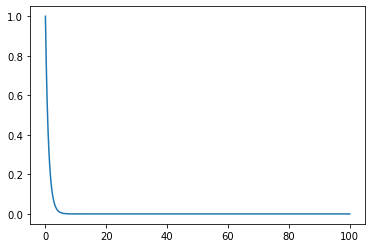

In [141]:
import math
xs = np.arange(0, 100, 0.01)
plt.plot(xs, np.exp(-xs))

## Compute ordered Wassertein Similarities between Labels from a Source uri to a Set of Target Candidates Stored in preds_align_rest

In [281]:
slabel_clnd_uris.columns

Index(['label', 'uri', 'clndLabel'], dtype='object')

In [303]:
preds_align_rest.columns

Index(['source', 'source_label', 'target', 'target_label'], dtype='object')

In [301]:
import math
# compute the Wasserstein similarity between two labels
def compute_wasserstein_similarity(slab, sclnd, clab, cclnd, embs_model):
    '''
        input: slab: source label string
               sclnd: cleaned source label string
               clab: candidate target label string
               cclnd: cleaned candidate target label string
               embs_model: pre-trained model
        output: Wasserstein similrity between the source and target labels
    '''
    wd = -1
    
    if slab in embs_model.wv.key_to_index and clab in embs_model.wv.key_to_index:
        _, wd = maponto.wd_between_labels_raw([slab], [clab], embs_model)
    elif slab in embs_model.wv.key_to_index:
        _, wd = maponto.wd_between_labels_raw([slab], [cclnd], embs_model)
    elif clab in embs_model.wv.key_to_index:
        _, wd = maponto.wd_between_labels_raw([sclnd], [clab], embs_model)
    else:
        # split the cleaned labels into lists of words and the WMD between
        # the two lists of words of the two cleaned labels
        _, wd = maponto.wd_between_labels_raw(sclnd.split(), cclnd.split(), embs_model)
        
    return math.exp(-wd)

In [364]:
%%time
map_tups = []
for suri in preds_align_rest.source.unique():
    slab = slabel_clnd_uris[slabel_clnd_uris.uri==suri].label.iloc[0]
    sclnd = slabel_clnd_uris[slabel_clnd_uris.uri==suri].clndLabel.iloc[0]
    candidates = preds_align_rest[preds_align_rest.source == suri].target
    high_sim = 0.85
    curr_map = ()
    for curi in candidates:
        clab = tlabel_clnd_uris[tlabel_clnd_uris.uri==curi].label.iloc[0]
        cclnd = tlabel_clnd_uris[tlabel_clnd_uris.uri==curi].clndLabel.iloc[0]
        ws = compute_wasserstein_similarity(slab, sclnd, clab, cclnd, embs_model)
        if high_sim < ws:
            high_sim = ws
            curr_map = (suri, slab, curi, clab)
    if len(curr_map) > 0:
        map_tups.append(curr_map)
preds_align_rest_top = pd.DataFrame(map_tups, columns=['source', 'source_label', 'target', 'target_label'])
#preds_align_rest_top

CPU times: user 2min 23s, sys: 2.78 s, total: 2min 26s
Wall time: 18.4 s


In [367]:
preds_align_all = pd.concat([preds_align, preds_align_rest]).reset_index(drop=True)

In [368]:
maponto.evaluate(preds_align_all, refs_url)

Total number of references is 1516
Total correctly predicted alignments is 1293
Total number of predicted is 6254
Precision is 0.20674768148385034
Recall is 0.8529023746701847
F1-Measure is 0.3328185328185328


# Conference All

In [4]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [4]:
import os
import os.path
conf_folder = "../data/conference/with_references"
subfolders = os.listdir(conf_folder)
subfolders[0]

'iasted-sigkdd'

## Mapping Label_Features_Embeddings(NN or Topn)

In [6]:
# how to generate mappings
make_mapping = 'nn'

all_results = []

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)
        
        #store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(lab_align, refs_url)
        eval_results['method'] = 'match_label_features'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

        # matching based on nn over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
        
        print("match_label_embeddings_OT(nn): {}".format(current_align.shape[0]))
        
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(current_align, refs_url)
        eval_results['method'] = 'match_label_embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        # combine the mappings of lab_features and OT(nn) on embeddings
        preds_align_all = pd.concat([lab_align, current_align]).reset_index(drop=True)
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'label_features+embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

        # matching based on top-n over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
        print("match_label_embeddings_OT(topn): {}".format(current_align.shape[0]))
        
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(current_align, refs_url)
        eval_results['method'] = 'match_label_embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        # combine the mappings of lab_features and OT(topn) on embeddings
        preds_align_all = pd.concat([lab_align, current_align]).reset_index(drop=True)
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'label_features+embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
len(source_graph)=1173, len(target_graph)=245
#slabel=(140, 3), #tlabel=(49, 3)
match_concepts_labels: 12


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


128it [00:06, 18.84it/s]
37it [00:00, 421.36it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 0
match_label_embeddings_OT(nn): 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 2560
../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf
len(source_graph)=539, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(49, 3)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 76.44it/s]
45it [00:00, 174.64it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (34, 45)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignm

match_label_synonyms: 0
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(topn): 680
../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
len(source_graph)=1720, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


91it [00:00, 615.47it/s]
61it [00:00, 581.42it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (88, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_align

match_label_synonyms: 3
match_label_embeddings_OT(nn): 16
match_label_embeddings_OT(topn): 1760
../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
len(source_graph)=639, len(target_graph)=245
#slabel=(59, 3), #tlabel=(49, 3)
match_concepts_labels: 9


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


50it [00:00, 769.97it/s]
40it [00:00, 1899.40it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 0
match_label_embeddings_OT(nn): 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1000
../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
len(source_graph)=1720, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(140, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2073.78it/s]
132it [00:00, 1391.25it/s]

match_label_synonyms: 4



INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (91, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Tran

match_label_embeddings_OT(nn): 14
match_label_embeddings_OT(topn): 1820
../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
len(source_graph)=412, len(target_graph)=639
#slabel=(29, 3), #tlabel=(59, 3)
match_concepts_labels: 6


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


23it [00:00, 107.08it/s]
53it [00:00, 948.51it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_align

match_label_synonyms: 1
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(topn): 440
../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
len(source_graph)=412, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 1123.01it/s]
135it [00:00, 1275.94it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 135)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 135)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_

match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(topn): 480
../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf
len(source_graph)=412, len(target_graph)=539


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl


#slabel=(29, 3), #tlabel=(38, 3)
match_concepts_labels: 5


INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


24it [00:00, 974.42it/s]
33it [00:00, 742.02it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_align

match_label_synonyms: 0
match_label_embeddings_OT(nn): 5
match_label_embeddings_OT(topn): 480
../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
len(source_graph)=539, len(target_graph)=557
#slabel=(38, 3), #tlabel=(73, 3)


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


29it [00:00, 706.03it/s]
64it [00:00, 1762.37it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 2
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(topn): 540
../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl


len(source_graph)=412, len(target_graph)=245
#slabel=(29, 3), #tlabel=(49, 3)
match_concepts_labels: 8


INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


21it [00:00, 1160.30it/s]
41it [00:00, 1940.67it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(topn): 420
../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
len(source_graph)=539, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(103, 3)
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


28it [00:00, 853.29it/s]
93it [00:00, 2392.64it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 6


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 560
../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
len(source_graph)=412, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl


#slabel=(29, 3), #tlabel=(73, 3)
match_concepts_labels: 5


INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


24it [00:00, 1207.27it/s]
68it [00:00, 1970.82it/s]


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 68)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transp

match_label_embeddings_OT(nn): 8


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 480
../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
len(source_graph)=639, len(target_graph)=539
#slabel=(59, 3), #tlabel=(38, 3)


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1761.51it/s]
30it [00:00, 827.63it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(topn): 1020
../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
len(source_graph)=539, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(140, 3)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 664.20it/s]
136it [00:00, 1145.17it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (29, 132)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_al

match_label_synonyms: 5
match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(topn): 580
../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
len(source_graph)=1720, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


96it [00:00, 2553.74it/s]
42it [00:00, 3472.31it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(topn): 1900
../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
len(source_graph)=639, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


54it [00:00, 1389.82it/s]
135it [00:00, 1173.12it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 131)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_a

match_label_synonyms: 4
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(topn): 1020
../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
len(source_graph)=557, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


66it [00:00, 1896.43it/s]
42it [00:00, 1978.16it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 10


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1300
../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
len(source_graph)=557, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(140, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


67it [00:00, 1733.47it/s]
134it [00:00, 1210.57it/s]

match_label_synonyms: 6



INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Tran

match_label_embeddings_OT(nn): 12
match_label_embeddings_OT(topn): 1240
../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
len(source_graph)=639, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1949.43it/s]
95it [00:00, 1264.89it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_co

match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(topn): 1020
../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
len(source_graph)=412, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1171.42it/s]
95it [00:00, 2112.25it/s]

match_label_synonyms: 0



INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Trans

match_label_embeddings_OT(nn): 5
match_label_embeddings_OT(topn): 420
../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
len(source_graph)=639, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


47it [00:00, 1859.55it/s]
61it [00:00, 1131.63it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 3
match_label_embeddings_OT(nn): 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 880


In [8]:
all_results_df = pd.DataFrame(all_results)[['test_case','method','numOfRefs','numOfCorrectlyPredicted','numOfPredicted','precision','recall','f1']]
all_results_df

,test_case,method,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1
0,iasted-sigkdd,match_label_features,15,11,12,0.916667,0.733333,0.814815
1,iasted-sigkdd,match_label_embeddings_OT(nn),15,1,11,0.090909,0.066667,0.076923
2,iasted-sigkdd,label_features+embeddings_OT(nn),15,12,23,0.521739,0.800000,0.631579
3,iasted-sigkdd,match_label_embeddings_OT(topn),15,4,2560,0.001563,0.266667,0.003107
4,iasted-sigkdd,label_features+embeddings_OT(topn),15,15,2572,0.005832,1.000000,0.011596
...,...,...,...,...,...,...,...,...
100,conference-ekaw,match_label_features,25,9,15,0.600000,0.360000,0.450000
101,conference-ekaw,match_label_embeddings_OT(nn),25,3,11,0.272727,0.120000,0.166667
102,conference-ekaw,label_features+embeddings_OT(nn),25,12,26,0.461538,0.480000,0.470588
103,conference-ekaw,match_label_embeddings_OT(topn),25,11,880,0.012500,0.440000,0.024309


In [9]:
all_results_df[all_results_df.method == 'match_label_features'].mean()

/tmp/ipykernel_8143/1657637063.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'match_label_features'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     7.095238
numOfPredicted              8.952381
precision                   0.817684
recall                      0.524825
f1                          0.624412
dtype: float64

In [10]:
all_results_df[all_results_df.method == 'label_features+embeddings_OT(nn)'].mean()

/tmp/ipykernel_8143/3022012122.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'label_features+embeddings_OT(nn)'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     9.000000
numOfPredicted             17.809524
precision                   0.509717
recall                      0.643409
f1                          0.553803
dtype: float64

In [11]:
all_results_df[all_results_df.method == 'label_features+embeddings_OT(topn)'].mean()

/tmp/ipykernel_8143/3834596585.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'label_features+embeddings_OT(topn)'].mean()


numOfRefs                   14.523810
numOfCorrectlyPredicted     10.952381
numOfPredicted             989.904762
precision                    0.013699
recall                       0.765786
f1                           0.026770
dtype: float64

## Mapping Target-Source Label_Features_Embeddings (NN or Topn)

In [12]:
# how to generate mappings
make_mapping = 'nn'


all_results = []

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        lab_align_inv = maponto.match_label_features(tlabel_clnd_uris, slabel_clnd_uris, target_graph, 
                                         source_graph, embs_model)
        
        
        lab_align_inv.columns = ['target','target_label','source','source_label']
        
        # Store the evaluation results in a dictionary: precision:xx, recall:xx, f1:xx
        eval_results = maponto.evaluate_noprint(lab_align_inv, refs_url)
        eval_results['method'] = 'match_label_features'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

        # matching based on nn over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        current_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
        
        
        current_align_inv.columns = ['target','target_label','source','source_label']
        
        #preds_align_rest = pd.concat([preds_align_rest, current_align]).reset_index(drop=True)
        print("match_label_embeddings_OT(nn): {}".format(current_align_inv.shape[0]))
        
        eval_results = maponto.evaluate_noprint(current_align_inv, refs_url)
        eval_results['method'] = 'match_label_embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all = pd.concat([lab_align_inv, current_align_inv]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'label_features+embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

        # matching based on topn over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        current_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
        print("match_label_embeddings_OT(topn): {}".format(current_align_inv.shape[0]))
        
        current_align_inv.columns = ['target','target_label','source','source_label']
        
        eval_results = maponto.evaluate_noprint(current_align_inv, refs_url)
        eval_results['method'] = 'match_label_embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all = pd.concat([lab_align_inv, current_align_inv]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'label_features+embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
len(source_graph)=1173, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(140, 3), #tlabel=(49, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


37it [00:00, 3322.11it/s]
128it [00:00, 1385.13it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(topn): 740
../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf
len(source_graph)=539, len(target_graph)=245
#slabel=(38, 3), #tlabel=(49, 3)
match_concepts_labels: 4


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


45it [00:00, 1417.04it/s]
34it [00:00, 671.07it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (45, 34)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(topn): 900
../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
len(source_graph)=1720, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 1900.03it/s]
91it [00:00, 2157.72it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 3
match_label_embeddings_OT(nn): 13


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1160
../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
len(source_graph)=639, len(target_graph)=245
#slabel=(59, 3), #tlabel=(49, 3)
match_concepts_labels: 9


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


40it [00:00, 1808.55it/s]
50it [00:00, 769.65it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (40, 50)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 6


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 800
../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
len(source_graph)=1720, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(140, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


132it [00:00, 1287.18it/s]
95it [00:00, 2380.00it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 4


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 91)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_l

match_label_embeddings_OT(nn): 12
match_label_embeddings_OT(topn): 2560
../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
len(source_graph)=412, len(target_graph)=639


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(59, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


53it [00:00, 1178.14it/s]
23it [00:00, 1172.70it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (52, 22)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 10


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (52, 22)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1040
../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
len(source_graph)=412, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1217.63it/s]
24it [00:00, 1075.52it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (135, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (135, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_

match_label_embeddings_OT(nn): 12
match_label_embeddings_OT(topn): 2700
../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl


len(source_graph)=412, len(target_graph)=539
#slabel=(29, 3), #tlabel=(38, 3)
match_concepts_labels: 5


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


33it [00:00, 689.48it/s]
24it [00:00, 972.97it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (33, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_align

match_label_synonyms: 0
match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(topn): 660
../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
len(source_graph)=539, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(73, 3)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


64it [00:00, 1649.18it/s]
29it [00:00, 674.84it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 27)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 2
match_label_embeddings_OT(nn): 12


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 27)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1240
../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


len(source_graph)=412, len(target_graph)=245
#slabel=(29, 3), #tlabel=(49, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


41it [00:00, 1830.40it/s]
21it [00:00, 1135.06it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(topn): 820
../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
len(source_graph)=539, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(103, 3)
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


93it [00:00, 2378.54it/s]
28it [00:00, 845.93it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (93, 28)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 0
match_label_embeddings_OT(nn): 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (93, 28)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1860
../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
len(source_graph)=412, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(73, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


68it [00:00, 1652.06it/s]
24it [00:00, 1084.91it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (68, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 8


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (68, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1360
../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
len(source_graph)=639, len(target_graph)=539
#slabel=(59, 3), #tlabel=(38, 3)
match_concepts_labels: 8


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


30it [00:00, 792.45it/s]
51it [00:00, 1754.02it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (30, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(topn): 600
../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
len(source_graph)=539, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(140, 3)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


136it [00:00, 1141.25it/s]
34it [00:00, 677.30it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (132, 29)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_al

match_label_synonyms: 5
match_label_embeddings_OT(nn): 16
match_label_embeddings_OT(topn): 2640
../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
len(source_graph)=1720, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 3280.58it/s]
96it [00:00, 2701.86it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(topn): 820
../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
len(source_graph)=639, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1219.27it/s]
54it [00:00, 1524.34it/s]

match_label_synonyms: 4



INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (131, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Tran

match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(topn): 2620
../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
len(source_graph)=557, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 1963.49it/s]
66it [00:00, 1913.80it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 65)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(topn): 820
../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
len(source_graph)=557, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(140, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


134it [00:00, 1187.39it/s]
67it [00:00, 1733.18it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_a

match_label_synonyms: 6
match_label_embeddings_OT(nn): 18
match_label_embeddings_OT(topn): 2560
../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
len(source_graph)=639, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2505.86it/s]
51it [00:00, 2088.45it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(topn): 1900
../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
len(source_graph)=412, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2271.56it/s]
21it [00:00, 1267.91it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 10
match_label_embeddings_OT(topn): 1900
../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
len(source_graph)=639, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 2151.20it/s]
47it [00:00, 1905.71it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 44)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 3
match_label_embeddings_OT(nn): 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 44)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1160


In [13]:
all_results_df = pd.DataFrame(all_results)[['test_case','method','numOfRefs','numOfCorrectlyPredicted','numOfPredicted','precision','recall','f1']]
all_results_df

,test_case,method,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1
0,iasted-sigkdd,match_label_features,15,11,12,0.916667,0.733333,0.814815
1,iasted-sigkdd,match_label_embeddings_OT(nn),15,0,8,0.000000,0.000000,0.000000
2,iasted-sigkdd,label_features+embeddings_OT(nn),15,11,20,0.550000,0.733333,0.628571
3,iasted-sigkdd,match_label_embeddings_OT(topn),15,3,740,0.004054,0.200000,0.007947
4,iasted-sigkdd,label_features+embeddings_OT(topn),15,14,752,0.018617,0.933333,0.036506
...,...,...,...,...,...,...,...,...
100,conference-ekaw,match_label_features,25,9,15,0.600000,0.360000,0.450000
101,conference-ekaw,match_label_embeddings_OT(nn),25,3,11,0.272727,0.120000,0.166667
102,conference-ekaw,label_features+embeddings_OT(nn),25,12,26,0.461538,0.480000,0.470588
103,conference-ekaw,match_label_embeddings_OT(topn),25,11,1160,0.009483,0.440000,0.018565


In [14]:
all_results_df[all_results_df.method == 'match_label_features'].mean()

/tmp/ipykernel_8143/1657637063.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'match_label_features'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     7.095238
numOfPredicted              8.952381
precision                   0.817684
recall                      0.524825
f1                          0.624412
dtype: float64

In [15]:
all_results_df[all_results_df.method == 'label_features+embeddings_OT(nn)'].mean()

/tmp/ipykernel_8143/3022012122.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'label_features+embeddings_OT(nn)'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     9.095238
numOfPredicted             19.000000
precision                   0.486132
recall                      0.650413
f1                          0.537412
dtype: float64

In [16]:
all_results_df[all_results_df.method == 'label_features+embeddings_OT(topn)'].mean()

/tmp/ipykernel_8143/3834596585.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'label_features+embeddings_OT(topn)'].mean()


numOfRefs                    14.523810
numOfCorrectlyPredicted      11.190476
numOfPredicted             1478.476190
precision                     0.009619
recall                        0.781274
f1                            0.018934
dtype: float64

## Mapping inner-joined Source-Target and Target-Source Label_Features_Embeddings (NN or Topn)

In [27]:
df1 = pd.DataFrame({'source':[1, 2, 3], 'target':[4, 5, 6], 'val':[1, 2, 3]})
df2 = pd.DataFrame({'source':[1, 20, 3], 'target':[4, 50, 6], 'val':[4, 5, 6]})
df1.merge(df2, how='outer', on=['source', 'target'])

,source,target,val_x,val_y
0,1,4,1.0,4.0
1,2,5,2.0,NaN
2,3,6,3.0,6.0
3,20,50,NaN,5.0


In [167]:
# how to generate mappings
make_mapping = 'nn'


all_results = []

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)
        
        lab_align_inv = maponto.match_label_features(tlabel_clnd_uris, slabel_clnd_uris, target_graph, 
                                         source_graph, embs_model)
        
    
        lab_align_inv.columns = ['target','target_label','source','source_label']
        
        # get joined label-based alignments
        lab_align_merged = lab_align.merge(lab_align_inv, how='inner', 
                                           left_on=['source', 'target'], \
                                           right_on=['source', 'target'])
        
        # store the evaluation results in a dictionary: precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(lab_align_merged, refs_url)
        eval_results['method'] = 'match_label_features'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

        # matching based on nn over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
        print("match_label_embeddings_OT(nn): {}".format(current_align.shape[0]))
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

        # matching based on top-n over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        #if make_mapping == 'nn':  
        current_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
        
        current_align_inv.columns = ['target','target_label','source','source_label']
        
        print("match_label_embeddings_OT(nn) inv: {}".format(current_align_inv.shape[0]))
        
        
        current_align_merged = current_align.merge(current_align_inv, how='inner', 
                                                  on=['source', 'target'])
        eval_results = maponto.evaluate_noprint(current_align_merged, refs_url)
        eval_results['method'] = 'match_label_embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all = pd.concat([lab_align_merged, current_align_merged]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'label_features+embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

        # matching based on top-n over OT couplings between embeddings of 
        # the sets of words in source and target concepts
        current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
        print("match_label_embeddings_OT(topn): {}".format(current_align.shape[0]))
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

        #if make_mapping == 'topn':
        current_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
        print("match_label_embeddings_OT(topn) inv: {}".format(current_align_inv.shape[0]))
        
        
        current_align_inv.columns = ['target','target_label','source','source_label']
        
        current_align_merged = current_align.merge(current_align_inv, how='inner', 
                                                  on=['source', 'target'])
        eval_results = maponto.evaluate_noprint(current_align_merged, refs_url)
        eval_results['method'] = 'match_label_embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all = pd.concat([lab_align_merged, current_align_merged]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'label_features+embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
len(source_graph)=1173, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(140, 3), #tlabel=(49, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


128it [00:00, 1233.53it/s]
37it [00:00, 2972.06it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl


match_label_synonyms: 0
match_concepts_labels: 12


INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


37it [00:00, 2850.49it/s]
128it [00:00, 1294.29it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_

match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 2560
match_label_embeddings_OT(topn) inv: 740
../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


len(source_graph)=539, len(target_graph)=245
#slabel=(38, 3), #tlabel=(49, 3)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 721.57it/s]
45it [00:00, 1563.47it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


45it [00:00, 1546.23it/s]
34it [00:00, 716.71it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (34, 45)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(nn) inv: 7


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (45, 34)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 680
match_label_embeddings_OT(topn) inv: 900
../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
len(source_graph)=1720, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


91it [00:00, 2119.10it/s]
61it [00:00, 1890.90it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 1847.15it/s]
91it [00:00, 2101.49it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (88, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 3
match_label_embeddings_OT(nn): 16


INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (88, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(nn) inv: 13


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1760
match_label_embeddings_OT(topn) inv: 1160
../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
len(source_graph)=639, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(49, 3)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


50it [00:00, 1476.26it/s]
40it [00:00, 1789.44it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


40it [00:00, 1728.38it/s]
50it [00:00, 1521.28it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(nn) inv: 6


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (40, 50)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1000
match_label_embeddings_OT(topn) inv: 800
../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
len(source_graph)=1720, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl


#slabel=(103, 3), #tlabel=(140, 3)
match_concepts_labels: 8


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


95it [00:00, 2106.69it/s]
132it [00:00, 1150.70it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl


match_label_synonyms: 4
match_concepts_labels: 8


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


132it [00:00, 1132.59it/s]
95it [00:00, 2085.90it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 4


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (91, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 91)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_

match_label_embeddings_OT(nn): 14
match_label_embeddings_OT(nn) inv: 12


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 91)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1820
match_label_embeddings_OT(topn) inv: 2560
../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
len(source_graph)=412, len(target_graph)=639


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(59, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


23it [00:00, 684.42it/s]
53it [00:00, 1242.12it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


53it [00:00, 1357.71it/s]
23it [00:00, 1000.64it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(nn) inv: 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 440
match_label_embeddings_OT(topn) inv: 1040
../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
len(source_graph)=412, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 985.33it/s]
135it [00:00, 1100.23it/s]

match_label_synonyms: 0



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1110.46it/s]
24it [00:00, 981.76it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 135)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_l

match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(nn) inv: 12


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (135, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 480
match_label_embeddings_OT(topn) inv: 2700
../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf
len(source_graph)=412, len(target_graph)=539


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(38, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 937.24it/s]
33it [00:00, 719.14it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


33it [00:00, 692.43it/s]
24it [00:00, 919.22it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_align

match_label_synonyms: 0
match_label_embeddings_OT(nn): 5
match_label_embeddings_OT(nn) inv: 6


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 480
match_label_embeddings_OT(topn) inv: 660
../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
len(source_graph)=539, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(73, 3)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


29it [00:00, 679.33it/s]
64it [00:00, 1688.56it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 2
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


64it [00:00, 1696.44it/s]
29it [00:00, 690.31it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 2
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(nn) inv: 12


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 540
match_label_embeddings_OT(topn) inv: 1240
../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


len(source_graph)=412, len(target_graph)=245
#slabel=(29, 3), #tlabel=(49, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1152.58it/s]
41it [00:00, 1939.68it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


41it [00:00, 1912.42it/s]
21it [00:00, 1151.95it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_co

match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...


match_label_embeddings_OT(topn): 420


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn) inv: 820
../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
len(source_graph)=539, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(103, 3)
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


28it [00:00, 863.54it/s]
93it [00:00, 2394.04it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


93it [00:00, 2440.09it/s]
28it [00:00, 856.21it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(nn) inv: 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 560
match_label_embeddings_OT(topn) inv: 1860
../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
len(source_graph)=412, len(target_graph)=557
#slabel=(29, 3), #tlabel=(73, 3)
match_concepts_labels: 5


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


24it [00:00, 1225.97it/s]
68it [00:00, 1926.03it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


68it [00:00, 1867.53it/s]
24it [00:00, 1201.73it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 68)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (68, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_co

match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (68, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...


match_label_embeddings_OT(topn): 480


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn) inv: 1360
../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
len(source_graph)=639, len(target_graph)=539


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(38, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1539.16it/s]
30it [00:00, 733.92it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


30it [00:00, 738.01it/s]
51it [00:00, 1545.13it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 1020
match_label_embeddings_OT(topn) inv: 600
../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
len(source_graph)=539, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(140, 3)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 688.15it/s]
136it [00:00, 1193.80it/s]

match_label_synonyms: 5



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


136it [00:00, 1160.89it/s]
34it [00:00, 645.35it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (29, 132)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_al

match_label_synonyms: 5
match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(nn) inv: 16


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (132, 29)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 580
match_label_embeddings_OT(topn) inv: 2640
../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
len(source_graph)=1720, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


96it [00:00, 2650.53it/s]
42it [00:00, 3468.62it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 3348.62it/s]
96it [00:00, 2627.68it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(nn) inv: 7


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 1900
match_label_embeddings_OT(topn) inv: 820
../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
len(source_graph)=639, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


54it [00:00, 1475.11it/s]
135it [00:00, 1009.45it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 4
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 885.68it/s]
54it [00:00, 1497.10it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 131)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_al

match_label_synonyms: 4
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(nn) inv: 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (131, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1020
match_label_embeddings_OT(topn) inv: 2620
../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
len(source_graph)=557, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


66it [00:00, 1847.69it/s]
42it [00:00, 1808.32it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 1721.09it/s]
66it [00:00, 1743.62it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 10
match_label_embeddings_OT(nn) inv: 9


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 65)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1300
match_label_embeddings_OT(topn) inv: 820
../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
len(source_graph)=557, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(140, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


67it [00:00, 1633.99it/s]
134it [00:00, 1169.61it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 6
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


134it [00:00, 1169.02it/s]
67it [00:00, 1743.26it/s]


match_label_synonyms: 6


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Trans

match_label_embeddings_OT(nn): 12
match_label_embeddings_OT(nn) inv: 18


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1240
match_label_embeddings_OT(topn) inv: 2560
../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
len(source_graph)=639, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1836.21it/s]
95it [00:00, 2436.40it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2291.23it/s]
51it [00:00, 1962.44it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 9


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(nn) inv: 9


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1020
match_label_embeddings_OT(topn) inv: 1900
../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
len(source_graph)=412, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1191.24it/s]
95it [00:00, 2113.62it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 1912.73it/s]
21it [00:00, 1058.39it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 5


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(nn) inv: 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 420
match_label_embeddings_OT(topn) inv: 1900
../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
len(source_graph)=639, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


47it [00:00, 1068.35it/s]
61it [00:00, 1442.63it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 1944.79it/s]
47it [00:00, 1668.92it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 3
match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(nn) inv: 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 880
match_label_embeddings_OT(topn) inv: 1160


In [168]:
all_results_df = pd.DataFrame(all_results)[['test_case','method','numOfRefs','numOfCorrectlyPredicted','numOfPredicted','precision','recall','f1']]
all_results_df

,test_case,method,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1
0,iasted-sigkdd,match_label_features,15,11,12,0.916667,0.733333,0.814815
1,iasted-sigkdd,match_label_embeddings_OT(nn),15,0,8,0.000000,0.000000,0.000000
2,iasted-sigkdd,label_features+embeddings_OT(nn),15,11,20,0.550000,0.733333,0.628571
3,iasted-sigkdd,match_label_embeddings_OT(topn),15,3,733,0.004093,0.200000,0.008021
4,iasted-sigkdd,label_features+embeddings_OT(topn),15,14,745,0.018792,0.933333,0.036842
...,...,...,...,...,...,...,...,...
100,conference-ekaw,match_label_features,25,9,15,0.600000,0.360000,0.450000
101,conference-ekaw,match_label_embeddings_OT(nn),25,3,11,0.272727,0.120000,0.166667
102,conference-ekaw,label_features+embeddings_OT(nn),25,12,26,0.461538,0.480000,0.470588
103,conference-ekaw,match_label_embeddings_OT(topn),25,11,781,0.014085,0.440000,0.027295


In [169]:
all_results_df[all_results_df.method == 'match_label_features'].mean()

/tmp/ipykernel_1729/1657637063.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'match_label_features'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     7.095238
numOfPredicted              8.952381
precision                   0.817684
recall                      0.524825
f1                          0.624412
dtype: float64

In [170]:
all_results_df[all_results_df.method == 'label_features+embeddings_OT(nn)'].mean()

/tmp/ipykernel_1729/3022012122.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'label_features+embeddings_OT(nn)'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     8.904762
numOfPredicted             17.047619
precision                   0.524662
recall                      0.637060
f1                          0.560297
dtype: float64

In [171]:
all_results_df[all_results_df.method == 'label_features+embeddings_OT(topn)'].mean()

/tmp/ipykernel_1729/3834596585.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'label_features+embeddings_OT(topn)'].mean()


numOfRefs                   14.523810
numOfCorrectlyPredicted     10.904762
numOfPredicted             736.952381
precision                    0.016237
recall                       0.762611
f1                           0.031674
dtype: float64

## Mapping combined Source-Target and Target-Source Label_Features_Embeddings (NN or Topn)

In [38]:
# how to generate mappings
make_mapping = 'nn'


all_results = []

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(lab_align, refs_url)
        eval_results['method'] = 'source2target:match_label_features'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        lab_align_inv = maponto.match_label_features(tlabel_clnd_uris, slabel_clnd_uris, target_graph, 
                                         source_graph, embs_model)
        lab_align_inv.columns = ['target','target_label','source','source_label']
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(lab_align_inv, refs_url)
        eval_results['method'] = 'target2source:match_label_features'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # get combined label-based alignments
        lab_align_merged = lab_align.merge(lab_align_inv, how='outer', on=['source', 'target'])
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(lab_align_merged, refs_url)
        eval_results['method'] = 'combined:match_label_features'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

        # matching based on nn over OT couplings between embeddings of 
        # the sets of words from source and target concepts
        current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
        print("match_label_embeddings_OT(nn): {}".format(current_align.shape[0]))
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(current_align, refs_url)
        eval_results['method'] = 'source2target:match_label_embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

        # matching based on nn over OT couplings between embeddings of 
        # the sets of words from target and source concepts 
        current_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
        current_align_inv.columns = ['target','target_label','source','source_label']
        print("match_label_embeddings_OT(nn) inv: {}".format(current_align_inv.shape[0]))
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(current_align_inv, refs_url)
        eval_results['method'] = 'target2source:match_label_embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        current_align_merged = current_align.merge(current_align_inv, how='outer', 
                                                  on=['source', 'target'])
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(current_align_merged, refs_url)
        eval_results['method'] = 'combined:match_label_embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all = pd.concat([lab_align, current_align]).reset_index(drop=True)
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'source2target:label_features+embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all_inv = pd.concat([lab_align_inv, current_align_inv]).reset_index(drop=True)
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(preds_align_all_inv, refs_url)
        eval_results['method'] = 'target2source:label_features+embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all_combined = pd.concat([lab_align_merged, current_align_merged]).reset_index(drop=True)
        # store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
        eval_results = maponto.evaluate_noprint(preds_align_all_combined, refs_url)
        eval_results['method'] = 'combined:label_features+embeddings_OT(nn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

        # matching based on top-n over OT couplings between embeddings of 
        # the sets of words from source and target concepts
        current_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
        print("match_label_embeddings_OT(topn): {}".format(current_align.shape[0]))
        eval_results = maponto.evaluate_noprint(current_align, refs_url)
        eval_results['method'] = 'source2target:match_label_embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        # extract the concepts that are not matched so far
        slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
        tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

        # matching based on topn over OT couplings between embeddings of 
        # the sets of words from target and source concepts
        current_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
        print("match_label_embeddings_OT(topn) inv: {}".format(current_align_inv.shape[0]))
        current_align_inv.columns = ['target','target_label','source','source_label']
        eval_results = maponto.evaluate_noprint(current_align_inv, refs_url)
        eval_results['method'] = 'target2source:match_label_embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        current_align_merged = current_align.merge(current_align_inv, how='outer', 
                                                  on=['source', 'target'])
        eval_results = maponto.evaluate_noprint(current_align_merged, refs_url)
        eval_results['method'] = 'combined:match_label_embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all = pd.concat([lab_align, current_align]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all, refs_url)
        eval_results['method'] = 'source2target:label_features+embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        preds_align_all_inv = pd.concat([lab_align_inv, current_align_inv]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all_inv, refs_url)
        eval_results['method'] = 'target2source:label_features+embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)
        
        
        preds_align_all_combined = pd.concat([lab_align_merged, current_align_merged]).reset_index(drop=True)
        eval_results = maponto.evaluate_noprint(preds_align_all_combined, refs_url)
        eval_results['method'] = 'combined:label_features+embeddings_OT(topn)'
        eval_results['test_case'] = subf
        all_results.append(eval_results)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
len(source_graph)=1173, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(140, 3), #tlabel=(49, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


128it [00:00, 1305.66it/s]
37it [00:00, 3045.91it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl


match_label_synonyms: 0
match_concepts_labels: 12


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


37it [00:00, 2738.38it/s]
128it [00:00, 1180.44it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_embeddings_OT(nn): 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Trans

match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 2560
match_label_embeddings_OT(topn) inv: 740
../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf
len(source_graph)=539, len(target_graph)=245
#slabel=(38, 3), #tlabel=(49, 3)
match_concepts_labels: 4


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


34it [00:00, 593.03it/s]
45it [00:00, 1490.40it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


45it [00:00, 1500.72it/s]
34it [00:00, 701.42it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (34, 45)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 7
match_label_embeddings_OT(nn) inv: 7


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (34, 45)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 680
match_label_embeddings_OT(topn) inv: 900
../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
len(source_graph)=1720, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


91it [00:00, 2047.88it/s]
61it [00:00, 1857.42it/s]

match_label_synonyms: 3
match_concepts_labels: 12



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


61it [00:00, 1059.82it/s]
91it [00:00, 1471.08it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (88, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 3


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transp

match_label_embeddings_OT(nn): 16
match_label_embeddings_OT(nn) inv: 13


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1760
match_label_embeddings_OT(topn) inv: 1160
../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
len(source_graph)=639, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(49, 3)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


50it [00:00, 1520.47it/s]
40it [00:00, 1831.35it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


40it [00:00, 1766.06it/s]
50it [00:00, 1500.74it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(nn) inv: 6


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 1000
match_label_embeddings_OT(topn) inv: 800
../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
len(source_graph)=1720, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(140, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2148.48it/s]
132it [00:00, 1321.94it/s]

match_label_synonyms: 4



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


132it [00:00, 1173.41it/s]
95it [00:00, 1460.36it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (91, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_a

match_label_synonyms: 4
match_label_embeddings_OT(nn): 14
match_label_embeddings_OT(nn) inv: 12


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (91, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_la

match_label_embeddings_OT(topn): 1820
match_label_embeddings_OT(topn) inv: 2560
../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
len(source_graph)=412, len(target_graph)=639


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(59, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


23it [00:00, 525.46it/s]
53it [00:00, 763.07it/s]

match_label_synonyms: 1
match_concepts_labels: 6



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


53it [00:00, 1200.74it/s]
23it [00:00, 1083.92it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 1
match_label_embeddings_OT(nn): 7


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (52, 22)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_embeddings_OT(nn) inv: 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 440


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn) inv: 1040
../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
len(source_graph)=412, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 1057.81it/s]
135it [00:00, 1216.21it/s]

match_label_synonyms: 0
match_concepts_labels: 5



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


135it [00:00, 1199.59it/s]
24it [00:00, 1065.03it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 135)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_embeddings_OT(nn): 7


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (135, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_l

match_label_embeddings_OT(nn) inv: 12


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (135, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 480
match_label_embeddings_OT(topn) inv: 2700
../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl


len(source_graph)=412, len(target_graph)=539
#slabel=(29, 3), #tlabel=(38, 3)
match_concepts_labels: 5


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


24it [00:00, 915.15it/s]
33it [00:00, 706.01it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


33it [00:00, 698.35it/s]
24it [00:00, 932.51it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_align

match_label_synonyms: 0
match_label_embeddings_OT(nn): 5
match_label_embeddings_OT(nn) inv: 6


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 480
match_label_embeddings_OT(topn) inv: 660
../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
len(source_graph)=539, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(73, 3)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


29it [00:00, 682.52it/s]
64it [00:00, 1704.61it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 2
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


64it [00:00, 1693.67it/s]
29it [00:00, 678.86it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 2
match_label_embeddings_OT(nn): 9


INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(nn) inv: 12


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 27)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 540
match_label_embeddings_OT(topn) inv: 1240
../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf
len(source_graph)=412, len(target_graph)=245
#slabel=(29, 3), #tlabel=(49, 3)
match_concepts_labels: 8


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


21it [00:00, 1080.22it/s]
41it [00:00, 1827.89it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


41it [00:00, 1836.27it/s]
21it [00:00, 1113.11it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 0
match_label_embeddings_OT(nn): 6


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transp

match_label_embeddings_OT(nn) inv: 8


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance 

match_label_embeddings_OT(topn): 420
match_label_embeddings_OT(topn) inv: 820
../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
len(source_graph)=539, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(103, 3)
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


28it [00:00, 758.78it/s]
93it [00:00, 2164.80it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


93it [00:00, 2349.00it/s]
28it [00:00, 832.69it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 6


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (93, 28)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_co

match_label_embeddings_OT(nn) inv: 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_embeddings_OT(topn): 560


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (93, 28)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn) inv: 1860
../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
len(source_graph)=412, len(target_graph)=557
#slabel=(29, 3), #tlabel=(73, 3)


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 1162.02it/s]
68it [00:00, 1838.66it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


68it [00:00, 1842.64it/s]
24it [00:00, 1195.80it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 68)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 8
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 68)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 480
match_label_embeddings_OT(topn) inv: 1360
../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
len(source_graph)=639, len(target_graph)=539


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(38, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1672.30it/s]
30it [00:00, 800.64it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


30it [00:00, 799.75it/s]
51it [00:00, 1637.13it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alig

match_label_synonyms: 0
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 1020
match_label_embeddings_OT(topn) inv: 600
../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
len(source_graph)=539, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(140, 3)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 658.05it/s]
136it [00:00, 1097.25it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 5
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


136it [00:00, 1109.99it/s]
34it [00:00, 656.35it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (29, 132)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_al

match_label_synonyms: 5
match_label_embeddings_OT(nn): 6
match_label_embeddings_OT(nn) inv: 16


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (132, 29)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 580
match_label_embeddings_OT(topn) inv: 2640
../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
len(source_graph)=1720, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


96it [00:00, 2632.99it/s]
42it [00:00, 1723.08it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 2104.37it/s]
96it [00:00, 2035.91it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transp

match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(nn) inv: 7


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1900
match_label_embeddings_OT(topn) inv: 820
../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
len(source_graph)=639, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(140, 3)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


54it [00:00, 1325.83it/s]
135it [00:00, 773.19it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 4
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1107.84it/s]
54it [00:00, 1432.35it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 131)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_a

match_label_synonyms: 4
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(nn) inv: 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (131, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1020
match_label_embeddings_OT(topn) inv: 2620
../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
len(source_graph)=557, len(target_graph)=245


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(49, 3)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


66it [00:00, 1877.28it/s]
42it [00:00, 1971.43it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 1902.59it/s]
66it [00:00, 1832.94it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 1
match_label_embeddings_OT(nn): 10
match_label_embeddings_OT(nn) inv: 9


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 1300
match_label_embeddings_OT(topn) inv: 820
../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
len(source_graph)=557, len(target_graph)=1173


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(140, 3)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


67it [00:00, 1712.19it/s]
134it [00:00, 1212.71it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 6
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


134it [00:00, 1140.75it/s]
67it [00:00, 1696.63it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 6


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_l

match_label_embeddings_OT(nn): 12
match_label_embeddings_OT(nn) inv: 18


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 1240
match_label_embeddings_OT(topn) inv: 2560
../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
len(source_graph)=639, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 957.64it/s]
95it [00:00, 1433.99it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl


match_label_synonyms: 0
match_concepts_labels: 8


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concept_relatedSynonym_labels: 0


95it [00:00, 2442.54it/s]
51it [00:00, 2010.20it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 9
match_label_embeddings_OT(nn) inv: 9


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 1020
match_label_embeddings_OT(topn) inv: 1900
../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
len(source_graph)=412, len(target_graph)=1720


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(103, 3)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1136.55it/s]
95it [00:00, 2115.16it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2064.55it/s]
21it [00:00, 1163.44it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 0
match_label_embeddings_OT(nn): 5
match_label_embeddings_OT(nn) inv: 10


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_lab

match_label_embeddings_OT(topn): 420
match_label_embeddings_OT(topn) inv: 1900
../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
len(source_graph)=639, len(target_graph)=557


INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(73, 3)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


47it [00:00, 1727.19it/s]
61it [00:00, 2088.51it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 2056.69it/s]
47it [00:00, 1743.30it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_ali

match_label_synonyms: 3
match_label_embeddings_OT(nn): 11


INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_to

match_label_embeddings_OT(nn) inv: 11


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 44)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 880
match_label_embeddings_OT(topn) inv: 1160


In [39]:
all_results_df = pd.DataFrame(all_results)[['test_case','method','numOfRefs','numOfCorrectlyPredicted','numOfPredicted','precision','recall','f1']]
all_results_df

,test_case,method,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1
0,iasted-sigkdd,source2target:match_label_features,15,11,12,0.916667,0.733333,0.814815
1,iasted-sigkdd,target2source:match_label_features,15,11,12,0.916667,0.733333,0.814815
2,iasted-sigkdd,combined:match_label_features,15,11,12,0.916667,0.733333,0.814815
3,iasted-sigkdd,source2target:match_label_embeddings_OT(nn),15,1,11,0.090909,0.066667,0.076923
4,iasted-sigkdd,target2source:match_label_embeddings_OT(nn),15,0,8,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
310,conference-ekaw,target2source:match_label_embeddings_OT(topn),25,11,1160,0.009483,0.440000,0.018565
311,conference-ekaw,combined:match_label_embeddings_OT(topn),25,11,1259,0.008737,0.440000,0.017134
312,conference-ekaw,source2target:label_features+embeddings_OT(topn),25,20,895,0.022346,0.800000,0.043478
313,conference-ekaw,target2source:label_features+embeddings_OT(topn),25,20,1175,0.017021,0.800000,0.033333


In [45]:
all_results_df.to_csv("../data/conference/with_references/all_results.csv")

In [41]:
all_results_df[all_results_df.method == 'combined:match_label_features'].mean()

/tmp/ipykernel_8143/1104081780.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'combined:match_label_features'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     7.095238
numOfPredicted              8.952381
precision                   0.817684
recall                      0.524825
f1                          0.624412
dtype: float64

In [43]:
all_results_df[all_results_df.method == 'combined:label_features+embeddings_OT(nn)'].mean()

/tmp/ipykernel_8143/3732067130.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'combined:label_features+embeddings_OT(nn)'].mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     9.190476
numOfPredicted             19.761905
precision                   0.471187
recall                      0.656762
f1                          0.530917
dtype: float64

In [44]:
all_results_df[all_results_df.method == 'combined:label_features+embeddings_OT(topn)'].mean()

/tmp/ipykernel_8143/3861516336.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_df[all_results_df.method == 'combined:label_features+embeddings_OT(topn)'].mean()


numOfRefs                    14.523810
numOfCorrectlyPredicted      11.238095
numOfPredicted             1731.428571
precision                     0.007512
recall                        0.784449
f1                            0.014840
dtype: float64

## Mapping Label_Syn_Was_Rest

In [134]:
all_results = []

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        concept_align = otmapper.mapping_label_syn_jac_was_rest(slabel_clnd_uris, tlabel_clnd_uris, source_graph, target_graph, embs_model)
        logging.info("TOTAL NUMBER OF MAPPINGS BETWEEN CONCPETS IS {}".format(len(concept_align)))
    
        #print the evaluation result
        eval_results = maponto.evaluate_noprint(concept_align, refs_url)
        eval_results['method'] = 'mapping_label_syn_jac_was_rest'
        eval_results['test_case'] = subf
        all_results.append(eval_results)


../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
len(source_graph)=1173, len(target_graph)=245


INFO:root:The number of level_1 predicted mapping is 12.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(140, 3), #tlabel=(49, 3)


128it [00:00, 1232.58it/s]
37it [00:00, 2960.27it/s]
INFO:root:Compute the related words for each source concept....
128it [00:12, 10.56it/s]
INFO:root:Total number of source concepts computed with relatd words is 128
INFO:root:Compute the related words for each target concept....
37it [00:02, 16.21it/s]
INFO:root:Total number of target concepts computed with related words is 37
100%|██████████| 128/128 [00:00<00:00, 5754.86it/s]
INFO:root:The number of level_3 predicted mapping is 12
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 116/116 [00:04<00:00, 24.90it/s]
INFO:root:The number of level_4 predicted mapping is 6
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In

../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf


INFO:root:The number of level_1 predicted mapping is 4.


len(source_graph)=539, len(target_graph)=245
#slabel=(38, 3), #tlabel=(49, 3)


/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...
34it [00:00, 735.16it/s]
45it [00:00, 1536.85it/s]
INFO:root:Compute the related words for each source concept....
34it [00:01, 17.63it/s]
INFO:root:Total number of source concepts computed with relatd words is 34
INFO:root:Compute the related words for each target concept....
45it [00:02, 17.61it/s]
INFO:root:Total number of target concepts computed with related words is 45
100%|██████████| 34/34 [00:00<00:00, 4470.98it/s]
INFO:root:The number of level_3 predicted mapping is 8
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all argume

../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
len(source_graph)=1720, len(target_graph)=557


INFO:root:The number of level_1 predicted mapping is 12.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(73, 3)


91it [00:00, 2173.51it/s]
61it [00:00, 1883.22it/s]
INFO:root:The number of level_2 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
88it [00:06, 14.06it/s]
INFO:root:Total number of source concepts computed with relatd words is 88
INFO:root:Compute the related words for each target concept....
58it [00:02, 22.39it/s]
INFO:root:Total number of target concepts computed with related words is 58
100%|██████████| 88/88 [00:00<00:00, 3285.67it/s]
INFO:root:The number of level_3 predicted mapping is 11
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  e

../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
len(source_graph)=639, len(target_graph)=245


INFO:root:The number of level_1 predicted mapping is 9.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(49, 3)


50it [00:00, 1526.39it/s]
40it [00:00, 1815.64it/s]
INFO:root:Compute the related words for each source concept....
50it [00:03, 16.34it/s]
INFO:root:Total number of source concepts computed with relatd words is 50
INFO:root:Compute the related words for each target concept....
40it [00:01, 25.07it/s]
INFO:root:Total number of target concepts computed with related words is 40
100%|██████████| 50/50 [00:00<00:00, 5076.99it/s]
INFO:root:The number of level_3 predicted mapping is 8
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 42/42 [00:02<00:00, 20.38it/s]
INFO:root:The number of level_4 predicted mapping is 2
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a futur

../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
len(source_graph)=1720, len(target_graph)=1173


INFO:root:The number of level_1 predicted mapping is 8.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(140, 3)


95it [00:00, 2305.03it/s]
132it [00:00, 1280.96it/s]
INFO:root:The number of level_2 predicted mapping is 4
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
91it [00:04, 20.54it/s]
INFO:root:Total number of source concepts computed with relatd words is 91
INFO:root:Compute the related words for each target concept....
128it [00:05, 23.43it/s]
INFO:root:Total number of target concepts computed with related words is 128
100%|██████████| 91/91 [00:00<00:00, 1390.55it/s]
INFO:root:The number of level_3 predicted mapping is 14
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
len(source_graph)=412, len(target_graph)=639


INFO:root:The number of level_1 predicted mapping is 6.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(59, 3)


23it [00:00, 1164.90it/s]
53it [00:00, 1616.80it/s]
INFO:root:The number of level_2 predicted mapping is 1
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
22it [00:00, 25.80it/s]
INFO:root:Total number of source concepts computed with relatd words is 22
INFO:root:Compute the related words for each target concept....
52it [00:01, 27.13it/s]
INFO:root:Total number of target concepts computed with related words is 52
100%|██████████| 22/22 [00:00<00:00, 4020.33it/s]
INFO:root:The number of level_3 predicted mapping is 7
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  en

../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
len(source_graph)=412, len(target_graph)=1173


INFO:root:The number of level_1 predicted mapping is 5.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(140, 3)


24it [00:00, 1061.36it/s]
135it [00:00, 1213.28it/s]
INFO:root:Compute the related words for each source concept....
24it [00:00, 27.13it/s]
INFO:root:Total number of source concepts computed with relatd words is 24
INFO:root:Compute the related words for each target concept....
135it [00:05, 22.70it/s]
INFO:root:Total number of target concepts computed with related words is 135
100%|██████████| 24/24 [00:00<00:00, 1732.38it/s]
INFO:root:The number of level_3 predicted mapping is 6
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 18/18 [00:03<00:00,  5.30it/s]
INFO:root:The number of level_4 predicted mapping is 4
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a fu

../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf


INFO:root:The number of level_1 predicted mapping is 5.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


len(source_graph)=412, len(target_graph)=539
#slabel=(29, 3), #tlabel=(38, 3)


24it [00:00, 779.16it/s]
33it [00:00, 700.37it/s]
INFO:root:Compute the related words for each source concept....
24it [00:00, 27.28it/s]
INFO:root:Total number of source concepts computed with relatd words is 24
INFO:root:Compute the related words for each target concept....
33it [00:01, 16.65it/s]
INFO:root:Total number of target concepts computed with related words is 33
100%|██████████| 24/24 [00:00<00:00, 6197.33it/s]
INFO:root:The number of level_3 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 21/21 [00:00<00:00, 35.10it/s]
INFO:root:The number of level_4 predicted mapping is 5
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a future 

../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
len(source_graph)=539, len(target_graph)=557


INFO:root:The number of level_1 predicted mapping is 9.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(73, 3)


29it [00:00, 680.58it/s]
64it [00:00, 1676.19it/s]
INFO:root:The number of level_2 predicted mapping is 2
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
27it [00:01, 25.17it/s]
INFO:root:Total number of source concepts computed with relatd words is 27
INFO:root:Compute the related words for each target concept....
62it [00:02, 25.52it/s]
INFO:root:Total number of target concepts computed with related words is 62
100%|██████████| 27/27 [00:00<00:00, 3725.45it/s]
INFO:root:The number of level_3 predicted mapping is 11
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  en

../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf
len(source_graph)=412, len(target_graph)=245


INFO:root:The number of level_1 predicted mapping is 8.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(49, 3)


21it [00:00, 1035.14it/s]
41it [00:00, 1754.06it/s]
INFO:root:Compute the related words for each source concept....
21it [00:00, 24.67it/s]
INFO:root:Total number of source concepts computed with relatd words is 21
INFO:root:Compute the related words for each target concept....
41it [00:02, 17.67it/s]
INFO:root:Total number of target concepts computed with related words is 41
100%|██████████| 21/21 [00:00<00:00, 5462.01it/s]
INFO:root:The number of level_3 predicted mapping is 5
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 16/16 [00:00<00:00, 24.88it/s]
INFO:root:The number of level_4 predicted mapping is 2
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a futur

../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
len(source_graph)=539, len(target_graph)=1720


INFO:root:The number of level_1 predicted mapping is 10.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(103, 3)


28it [00:00, 834.30it/s]
93it [00:00, 2396.29it/s]
INFO:root:Compute the related words for each source concept....
28it [00:01, 25.25it/s]
INFO:root:Total number of source concepts computed with relatd words is 28
INFO:root:Compute the related words for each target concept....
93it [00:04, 21.90it/s]
INFO:root:Total number of target concepts computed with related words is 93
100%|██████████| 28/28 [00:00<00:00, 2160.86it/s]
INFO:root:The number of level_3 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 25/25 [00:03<00:00,  6.59it/s]
INFO:root:The number of level_4 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a future

../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
len(source_graph)=412, len(target_graph)=557


INFO:root:The number of level_1 predicted mapping is 5.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(73, 3)


24it [00:00, 1086.06it/s]
68it [00:00, 1710.63it/s]
INFO:root:Compute the related words for each source concept....
24it [00:01, 22.36it/s]
INFO:root:Total number of source concepts computed with relatd words is 24
INFO:root:Compute the related words for each target concept....
68it [00:02, 25.33it/s]
INFO:root:Total number of target concepts computed with related words is 68
100%|██████████| 24/24 [00:00<00:00, 3221.23it/s]
INFO:root:The number of level_3 predicted mapping is 7
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 17/17 [00:01<00:00, 13.80it/s]
INFO:root:The number of level_4 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a futur

../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf


INFO:root:The number of level_1 predicted mapping is 8.


len(source_graph)=639, len(target_graph)=539
#slabel=(59, 3), #tlabel=(38, 3)


/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...
51it [00:00, 1766.17it/s]
30it [00:00, 827.80it/s]
INFO:root:Compute the related words for each source concept....
51it [00:02, 18.71it/s]
INFO:root:Total number of source concepts computed with relatd words is 51
INFO:root:Compute the related words for each target concept....
30it [00:01, 25.49it/s]
INFO:root:Total number of target concepts computed with related words is 30
100%|██████████| 51/51 [00:00<00:00, 7257.81it/s]
INFO:root:The number of level_3 predicted mapping is 7
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all argume

../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
len(source_graph)=539, len(target_graph)=1173


INFO:root:The number of level_1 predicted mapping is 4.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(38, 3), #tlabel=(140, 3)


34it [00:00, 668.45it/s]
136it [00:00, 1152.77it/s]
INFO:root:The number of level_2 predicted mapping is 5
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
29it [00:01, 26.24it/s]
INFO:root:Total number of source concepts computed with relatd words is 29
INFO:root:Compute the related words for each target concept....
132it [00:05, 22.29it/s]
INFO:root:Total number of target concepts computed with related words is 132
100%|██████████| 29/29 [00:00<00:00, 1616.97it/s]
INFO:root:The number of level_3 predicted mapping is 12
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
 

../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
len(source_graph)=1720, len(target_graph)=245


INFO:root:The number of level_1 predicted mapping is 7.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(103, 3), #tlabel=(49, 3)


96it [00:00, 2592.68it/s]
42it [00:00, 3395.94it/s]
INFO:root:The number of level_2 predicted mapping is 1
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
95it [00:04, 21.88it/s]
INFO:root:Total number of source concepts computed with relatd words is 95
INFO:root:Compute the related words for each target concept....
41it [00:01, 26.19it/s]
INFO:root:Total number of target concepts computed with related words is 41
100%|██████████| 95/95 [00:00<00:00, 4080.73it/s]
INFO:root:The number of level_3 predicted mapping is 6
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  en

../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
len(source_graph)=639, len(target_graph)=1173


INFO:root:The number of level_1 predicted mapping is 5.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(140, 3)


54it [00:00, 1486.86it/s]
135it [00:00, 1230.68it/s]
INFO:root:The number of level_2 predicted mapping is 4
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
51it [00:02, 24.08it/s]
INFO:root:Total number of source concepts computed with relatd words is 51
INFO:root:Compute the related words for each target concept....
131it [00:05, 22.58it/s]
INFO:root:Total number of target concepts computed with related words is 131
100%|██████████| 51/51 [00:00<00:00, 1461.06it/s]
INFO:root:The number of level_3 predicted mapping is 12
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
len(source_graph)=557, len(target_graph)=245


INFO:root:The number of level_1 predicted mapping is 7.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(49, 3)


66it [00:00, 1912.39it/s]
42it [00:00, 2031.19it/s]
INFO:root:The number of level_2 predicted mapping is 1
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
65it [00:03, 20.40it/s]
INFO:root:Total number of source concepts computed with relatd words is 65
INFO:root:Compute the related words for each target concept....
41it [00:01, 27.27it/s]
INFO:root:Total number of target concepts computed with related words is 41
100%|██████████| 65/65 [00:00<00:00, 5004.68it/s]
INFO:root:The number of level_3 predicted mapping is 8
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  en

../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
len(source_graph)=557, len(target_graph)=1173


INFO:root:The number of level_1 predicted mapping is 6.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(73, 3), #tlabel=(140, 3)


67it [00:00, 1753.84it/s]
134it [00:00, 1230.15it/s]
INFO:root:The number of level_2 predicted mapping is 6
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
62it [00:03, 19.14it/s]
INFO:root:Total number of source concepts computed with relatd words is 62
INFO:root:Compute the related words for each target concept....
128it [00:05, 24.77it/s]
INFO:root:Total number of target concepts computed with related words is 128
100%|██████████| 62/62 [00:00<00:00, 862.37it/s]
INFO:root:The number of level_3 predicted mapping is 18
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
 

../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
len(source_graph)=639, len(target_graph)=1720


INFO:root:The number of level_1 predicted mapping is 8.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(103, 3)


51it [00:00, 2044.55it/s]
95it [00:00, 2544.50it/s]
INFO:root:Compute the related words for each source concept....
51it [00:01, 27.00it/s]
INFO:root:Total number of source concepts computed with relatd words is 51
INFO:root:Compute the related words for each target concept....
95it [00:03, 28.00it/s]
INFO:root:Total number of target concepts computed with related words is 95
100%|██████████| 51/51 [00:00<00:00, 2129.72it/s]
INFO:root:The number of level_3 predicted mapping is 14
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 37/37 [00:05<00:00,  6.78it/s]
INFO:root:The number of level_4 predicted mapping is 5
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a futu

../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
len(source_graph)=412, len(target_graph)=1720


INFO:root:The number of level_1 predicted mapping is 8.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(29, 3), #tlabel=(103, 3)


21it [00:00, 1245.60it/s]
95it [00:00, 2206.25it/s]
INFO:root:Compute the related words for each source concept....
21it [00:00, 27.10it/s]
INFO:root:Total number of source concepts computed with relatd words is 21
INFO:root:Compute the related words for each target concept....
95it [00:03, 27.78it/s]
INFO:root:Total number of target concepts computed with related words is 95
100%|██████████| 21/21 [00:00<00:00, 2048.71it/s]
INFO:root:The number of level_3 predicted mapping is 5
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 16/16 [00:02<00:00,  6.91it/s]
INFO:root:The number of level_4 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1092: FutureWarning: In a futur

../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
len(source_graph)=639, len(target_graph)=557


INFO:root:The number of level_1 predicted mapping is 12.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1041: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


#slabel=(59, 3), #tlabel=(73, 3)


47it [00:00, 1903.46it/s]
61it [00:00, 2234.23it/s]
INFO:root:The number of level_2 predicted mapping is 3
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1050: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
44it [00:02, 18.14it/s]
INFO:root:Total number of source concepts computed with relatd words is 44
INFO:root:Compute the related words for each target concept....
58it [00:02, 25.80it/s]
INFO:root:Total number of target concepts computed with related words is 58
100%|██████████| 44/44 [00:00<00:00, 3863.94it/s]
INFO:root:The number of level_3 predicted mapping is 16
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:1078: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  e

In [183]:
all_results_otmapper_df = pd.DataFrame(all_results)[['test_case','method','numOfRefs','numOfCorrectlyPredicted','numOfPredicted','precision','recall','f1']]
all_results_otmapper_df

,test_case,method,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1
0,iasted-sigkdd,match_label_features,15,11,12,0.916667,0.733333,0.814815
1,iasted-sigkdd,match_label_embeddings_OT(nn),15,1,11,0.090909,0.066667,0.076923
2,iasted-sigkdd,label_features+embeddings_OT(nn),15,12,23,0.521739,0.800000,0.631579
3,iasted-sigkdd,match_label_embeddings_OT(topn),15,1,141,0.007092,0.066667,0.012821
4,iasted-sigkdd,label_features+embeddings_OT(topn),15,12,153,0.078431,0.800000,0.142857
...,...,...,...,...,...,...,...,...
100,conference-ekaw,match_label_features,25,9,15,0.600000,0.360000,0.450000
101,conference-ekaw,match_label_embeddings_OT(nn),25,3,11,0.272727,0.120000,0.166667
102,conference-ekaw,label_features+embeddings_OT(nn),25,12,26,0.461538,0.480000,0.470588
103,conference-ekaw,match_label_embeddings_OT(topn),25,9,73,0.123288,0.360000,0.183673


In [184]:
all_results_otmapper_df.mean()

/tmp/ipykernel_1729/1317853414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results_otmapper_df.mean()


numOfRefs                  14.523810
numOfCorrectlyPredicted     6.371429
numOfPredicted             50.800000
precision                   0.325412
recall                      0.447065
f1                          0.309334
dtype: float64

# Refine the Mapping for: iasted-sigkdd

In [5]:
conf_folder = "../data/conference/with_references"

## Extract RDF Graphs and Labels

In [6]:
source_url = conf_folder + "/iasted-sigkdd/source.rdf"
target_url = conf_folder + '/iasted-sigkdd/target.rdf'
refs_url = conf_folder + '/iasted-sigkdd/reference.rdf'

source_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url)
maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
#len(source_graph)

target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
# Concept labels
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
len(source_graph)=1173, len(target_graph)=245
#slabel=(140, 3), #tlabel=(49, 3)


In [267]:
ref_align = maponto.load_alignments(refs_url, "references")
ref_align

,source,target,relation,confidence
0,http://iasted#Place,http://sigkdd#Place,=,1.0
1,http://iasted#Review,http://sigkdd#Review,=,1.0
2,http://iasted#Student_registration_fee,http://sigkdd#Registration_Student,=,1.0
3,http://iasted#Fee,http://sigkdd#Fee,=,1.0
4,http://iasted#Registration_fee,http://sigkdd#Registration_fee,=,1.0
5,http://iasted#Sponsor,http://sigkdd#Sponzor,=,1.0
6,http://iasted#Deadline_for_notification_of_acc...,http://sigkdd#Deadline_Author_notification,=,1.0
7,http://iasted#Nonmember_registration_fee,http://sigkdd#Registration_Non-Member,=,1.0
8,http://iasted#Author,http://sigkdd#Author,=,1.0
9,http://iasted#Listener,http://sigkdd#Listener,=,1.0


## Compute Mapping Candidates by Top-N OT

In [268]:
# compute mapping candidates by different criteria
# the candidates for refinement are lab_features+embeddings_OT_topn
# stored in the DataFrame: preds_topn_align_all_combined

all_results = []
subf = "iasted-sigkdd"

lab_align = maponto.match_label_features(slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, embs_model)
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(lab_align, refs_url)
eval_results['method'] = 'source2target:match_label_features'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
lab_align_inv = maponto.match_label_features(tlabel_clnd_uris, slabel_clnd_uris, target_graph, 
                                         source_graph, embs_model)
lab_align_inv.columns = ['target','target_label','source','source_label']
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(lab_align_inv, refs_url)
eval_results['method'] = 'target2source:match_label_features'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
        
# get combined label-based alignments
lab_align_merged = lab_align.merge(lab_align_inv, how='outer', on=['source', 'target'])
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(lab_align_merged, refs_url)
eval_results['method'] = 'combined:match_label_features'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
        
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

# matching based on nn over OT couplings between embeddings of 
# the sets of words from source and target concepts
embeddings_OT_nn_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
print("match_label_embeddings_OT(nn): {}".format(embeddings_OT_nn_align.shape[0]))
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(embeddings_OT_nn_align, refs_url)
eval_results['method'] = 'source2target:match_label_embeddings_OT(nn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

# matching based on nn over OT couplings between embeddings of 
# the sets of words from target and source concepts 
embeddings_OT_nn_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_nn, None, None)
embeddings_OT_nn_align_inv.columns = ['target','target_label','source','source_label']
print("match_label_embeddings_OT(nn) inv: {}".format(embeddings_OT_nn_align_inv.shape[0]))
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(embeddings_OT_nn_align_inv, refs_url)
eval_results['method'] = 'target2source:match_label_embeddings_OT(nn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
embeddings_OT_nn_align_merged = embeddings_OT_nn_align.merge(embeddings_OT_nn_align_inv, how='outer', 
                                                  on=['source', 'target'])
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(embeddings_OT_nn_align_merged, refs_url)
eval_results['method'] = 'combined:match_label_embeddings_OT(nn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
preds_nn_align_all = pd.concat([lab_align, embeddings_OT_nn_align]).reset_index(drop=True)
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(preds_nn_align_all, refs_url)
eval_results['method'] = 'source2target:label_features+embeddings_OT(nn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
preds_nn_align_all_inv = pd.concat([lab_align_inv, embeddings_OT_nn_align_inv]).reset_index(drop=True)
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(preds_nn_align_all_inv, refs_url)
eval_results['method'] = 'target2source:label_features+embeddings_OT(nn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
preds_nn_align_all_combined = pd.concat([lab_align_merged, embeddings_OT_nn_align_merged]).reset_index(drop=True)
# store the evaluation results in a dictionary with precision:xx, recall:xx, f1:xx, etc
eval_results = maponto.evaluate_noprint(preds_nn_align_all_combined, refs_url)
eval_results['method'] = 'combined:label_features+embeddings_OT(nn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
        
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align, 'target')

# matching based on top-n over OT couplings between embeddings of 
# the sets of words from source and target concepts
embeddings_OT_topn_align = maponto.match_label_embeddings_OT(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
print("match_label_embeddings_OT(topn): {}".format(embeddings_OT_topn_align.shape[0]))
eval_results = maponto.evaluate_noprint(embeddings_OT_topn_align, refs_url)
eval_results['method'] = 'source2target:match_label_embeddings_OT(topn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, lab_align_inv, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, lab_align_inv, 'target')

# matching based on topn over OT couplings between embeddings of 
# the sets of words from target and source concepts
embeddings_OT_topn_align_inv = maponto.match_label_embeddings_OT(tlabel_clnd_uris_rest, slabel_clnd_uris_rest, 
                                                  embs_model, maponto.make_mappings_topn, 20, None)
print("match_label_embeddings_OT(topn) inv: {}".format(embeddings_OT_topn_align_inv.shape[0]))
embeddings_OT_topn_align_inv.columns = ['target','target_label','source','source_label']
eval_results = maponto.evaluate_noprint(embeddings_OT_topn_align_inv, refs_url)
eval_results['method'] = 'target2source:match_label_embeddings_OT(topn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
embeddings_OT_topn_align_merged = embeddings_OT_topn_align.merge(embeddings_OT_topn_align_inv, how='outer', 
                                                  on=['source', 'target'])
eval_results = maponto.evaluate_noprint(embeddings_OT_topn_align_merged, refs_url)
eval_results['method'] = 'combined:match_label_embeddings_OT(topn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
preds_topn_align_all = pd.concat([lab_align, embeddings_OT_topn_align]).reset_index(drop=True)
eval_results = maponto.evaluate_noprint(preds_topn_align_all, refs_url)
eval_results['method'] = 'source2target:label_features+embeddings_OT(topn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
preds_topn_align_all_inv = pd.concat([lab_align_inv, embeddings_OT_topn_align_inv]).reset_index(drop=True)
eval_results = maponto.evaluate_noprint(preds_topn_align_all_inv, refs_url)
eval_results['method'] = 'target2source:label_features+embeddings_OT(topn)'
eval_results['test_case'] = subf
all_results.append(eval_results)
        
        
preds_topn_align_all_combined = pd.concat([lab_align_merged, embeddings_OT_topn_align_merged]).reset_index(drop=True)
eval_results = maponto.evaluate_noprint(preds_topn_align_all_combined, refs_url)
eval_results['method'] = 'combined:label_features+embeddings_OT(topn)'
eval_results['test_case'] = subf
all_results.append(eval_results)

INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


128it [00:00, 1029.43it/s]
37it [00:00, 3145.56it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


37it [00:00, 3306.26it/s]
128it [00:00, 1387.94it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...


match_label_synonyms: 0


INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_nn(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, couplings): Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub,

match_label_embeddings_OT(nn): 11
match_label_embeddings_OT(nn) inv: 8


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_embeddings_OT(topn): 2560
match_label_embeddings_OT(topn) inv: 740


In [279]:
preds_topn_align_all_combined.head(10)

,source,source_label_x,target,target_label_x,target_label_y,source_label_y
0,http://iasted#Author,Author,http://sigkdd#Author,Author,Author,Author
1,http://iasted#Conference_hall,Conference_hall,http://sigkdd#Conference_hall,Conference_hall,Conference_hall,Conference_hall
2,http://iasted#Deadline,Deadline,http://sigkdd#Deadline,Deadline,Deadline,Deadline
3,http://iasted#Document,Document,http://sigkdd#Document,Document,Document,Document
4,http://iasted#Fee,Fee,http://sigkdd#Fee,Fee,Fee,Fee
5,http://iasted#Listener,Listener,http://sigkdd#Listener,Listener,Listener,Listener
6,http://iasted#Main_office,Main_office,http://sigkdd#Main_office,Main_office,Main_office,Main_office
7,http://iasted#Person,Person,http://sigkdd#Person,Person,Person,Person
8,http://iasted#Place,Place,http://sigkdd#Place,Place,Place,Place
9,http://iasted#Registration_fee,Registration_fee,http://sigkdd#Registration_fee,Registration_fee,Registration_fee,Registration_fee


In [ ]:
all_results_df = pd.DataFrame(all_results)[['test_case','method','numOfRefs','numOfCorrectlyPredicted','numOfPredicted','precision','recall','f1']]
all_results_df

,test_case,method,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1
0,iasted-sigkdd,source2target:match_label_features,15,11,12,0.916667,0.733333,0.814815
1,iasted-sigkdd,target2source:match_label_features,15,11,12,0.916667,0.733333,0.814815
2,iasted-sigkdd,combined:match_label_features,15,11,12,0.916667,0.733333,0.814815
3,iasted-sigkdd,source2target:match_label_embeddings_OT(nn),15,1,11,0.090909,0.066667,0.076923
4,iasted-sigkdd,target2source:match_label_embeddings_OT(nn),15,0,8,0.000000,0.000000,0.000000
5,iasted-sigkdd,combined:match_label_embeddings_OT(nn),15,1,11,0.090909,0.066667,0.076923
6,iasted-sigkdd,source2target:label_features+embeddings_OT(nn),15,12,23,0.521739,0.800000,0.631579
7,iasted-sigkdd,target2source:label_features+embeddings_OT(nn),15,11,20,0.550000,0.733333,0.628571
8,iasted-sigkdd,combined:label_features+embeddings_OT(nn),15,12,23,0.521739,0.800000,0.631579
9,iasted-sigkdd,source2target:match_label_embeddings_OT(topn),15,4,2560,0.001563,0.266667,0.003107


## Extract Source and Target Relation Edges

In [10]:
sedges = maponto.build_relation_graph_edges_df(source_graph)
sedges

INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....


,subject,predicate,property,object
0,http://iasted#Activity,http://iasted#is_dated_on,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#dateTime
1,http://iasted#Money,http://iasted#has_amount_of,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#int
2,http://iasted#Deadline,http://iasted#done_till,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#date
3,http://iasted#Speaker,owl:disjointWith,None,http://iasted#Non_speaker
4,http://iasted#Non_speaker,owl:disjointWith,None,http://iasted#Speaker
...,...,...,...,...
312,http://iasted#Credit_card,rdfs:subClassOf,None,http://iasted#Card
313,http://iasted#City,rdfs:subClassOf,None,http://www.w3.org/2002/07/owl#Thing
314,http://iasted#Place,rdfs:subClassOf,None,http://www.w3.org/2002/07/owl#Thing
315,http://iasted#Introduction_of_speaker,rdfs:subClassOf,None,http://iasted#Introduction


In [20]:
sedges[(sedges.subject=='http://iasted#Full_day_tour') | (sedges.object =='http://iasted#Full_day_tour')]

,subject,predicate,property,object
146,http://iasted#Fee_for_extra_trip,http://iasted#is_paid_for,owl:someValuesFrom,http://iasted#Full_day_tour
161,http://iasted#Full_day_tour,http://iasted#is_designed_for,owl:someValuesFrom,http://iasted#Delegate
162,http://iasted#Full_day_tour,http://iasted#is_held_in,owl:someValuesFrom,http://iasted#Trip_day
163,http://iasted#Full_day_tour,http://iasted#is_held_in,owl:someValuesFrom,http://iasted#Trip_city
249,http://iasted#Full_day_tour,rdfs:subClassOf,None,http://iasted#Activity_after_conference


In [11]:
tedges = maponto.build_relation_graph_edges_df(target_graph)
tedges

INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....


,subject,predicate,property,object
0,http://sigkdd#Registration_fee,http://sigkdd#Price,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#int
1,http://sigkdd#Conference,http://sigkdd#Name_of_conference,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
2,http://sigkdd#Person,http://sigkdd#Nation,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
3,http://sigkdd#Person,http://sigkdd#Name,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
4,http://sigkdd#Registration_fee,http://sigkdd#Currency,owl:DataTypeProperty,http://www.w3.org/2001/XMLSchema#string
...,...,...,...,...
78,http://sigkdd#Organizing_Committee,rdfs:subClassOf,None,http://sigkdd#Committee
79,http://sigkdd#Registration_fee,rdfs:subClassOf,None,http://sigkdd#Fee
80,http://sigkdd#Sponzor_fee,rdfs:subClassOf,None,http://sigkdd#Fee
81,http://sigkdd#Invited_Speaker,rdfs:subClassOf,None,http://sigkdd#Speaker


In [21]:
tedges[(tedges.subject == 'http://sigkdd#ACM_SIGKDD') | (tedges.object == 'http://sigkdd#ACM_SIGKDD')]

,subject,predicate,property,object
12,http://sigkdd#ACM_SIGKDD,http://sigkdd#design,rdfs:domain,http://sigkdd#Deadline
13,http://sigkdd#ACM_SIGKDD,http://sigkdd#hold,rdfs:domain,http://sigkdd#Conference
14,http://sigkdd#ACM_SIGKDD,http://sigkdd#search,rdfs:domain,http://sigkdd#Sponzor
20,http://sigkdd#ACM_SIGKDD,http://sigkdd#design,rdfs:domain,http://sigkdd#Deadline
21,http://sigkdd#ACM_SIGKDD,http://sigkdd#hold,rdfs:domain,http://sigkdd#Conference
22,http://sigkdd#ACM_SIGKDD,http://sigkdd#search,rdfs:domain,http://sigkdd#Sponzor
29,http://sigkdd#Conference,http://sigkdd#holded_by,rdfs:domain,http://sigkdd#ACM_SIGKDD
31,http://sigkdd#Deadline,http://sigkdd#designed_by,rdfs:domain,http://sigkdd#ACM_SIGKDD
33,http://sigkdd#Sponzor,http://sigkdd#searched_by,rdfs:domain,http://sigkdd#ACM_SIGKDD
35,http://sigkdd#ACM_SIGKDD,http://sigkdd#design,owl:someValuesFrom,http://sigkdd#Deadline


In [40]:
sedges[(sedges.predicate == 'rdfs:comments')]

,subject,predicate,property,object


In [14]:
preds_topn_align_all_combined[preds_topn_align_all_combined.source == 'http://iasted#Full_day_tour']

,source,source_label_x,target,target_label_x,target_label_y,source_label_y
892,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#ACM_SIGKDD,ACM_SIGKDD,NaN,NaN
893,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,NaN,NaN
894,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Program_Committee,Program_Committee,NaN,NaN
895,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Program_Committee_member,Program_Committee_member,NaN,NaN
896,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Exhibitor,Exhibitor,NaN,NaN
897,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Program_Chair,Program_Chair,NaN,NaN
898,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Author_of_paper_student,Author_of_paper_student,NaN,NaN
899,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#General_Chair,General_Chair,NaN,NaN
900,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Bronze_Supporter,Bronze_Supporter,NaN,NaN
901,http://iasted#Full_day_tour,Full_day_tour,http://sigkdd#Registration_SIGMOD_Member,Registration_SIGMOD_Member,NaN,NaN


In [16]:
suri = 'http://iasted#Full_day_tour'
turi = 'http://sigkdd#ACM_SIGKDD'

In [218]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [215]:
maponto.clean_extract_label_from_uri('http://www.w3.org/2001/XMLSchema#string')

'string'

In [216]:
maponto.clean_extract_label_from_uri(str(3))

'3'

In [219]:
#suri_triples = get_context_triples('http://iasted#Author', sedges)
suri_triples = maponto.get_context_triples(suri, sedges)
suri_triples

[('full day tour', 'designed', 'delegate'),
 ('full day tour', 'held', 'trip day'),
 ('full day tour', 'held', 'trip city'),
 ('full day tour', 'child', 'activity conference')]

In [220]:
#turi_triples = get_context_triples('http://sigkdd#Author', tedges)
turi_triples = maponto.get_context_triples(turi, tedges)
turi_triples

[('acm sigkdd', 'domain', 'design', 'deadline'),
 ('acm sigkdd', 'domain', 'hold', 'conference'),
 ('acm sigkdd', 'domain', 'search', 'sponzor'),
 ('acm sigkdd', 'design', 'deadline'),
 ('acm sigkdd', 'hold', 'conference'),
 ('acm sigkdd', 'search', 'sponzor'),
 ('acm sigkdd', 'child', 'thing'),
 ('acm sigkdd', 'range', 'holded', 'conference'),
 ('acm sigkdd', 'range', 'designed', 'deadline'),
 ('acm sigkdd', 'range', 'searched', 'sponzor')]

In [222]:
len(maponto.convert_label_embedding_tuples(turi_triples, embs_model)[8])

4

In [235]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [223]:
suri_embedding_tuples = maponto.convert_label_embedding_tuples(suri_triples, embs_model)
turi_embedding_tuples = maponto.convert_label_embedding_tuples(turi_triples, embs_model)

In [238]:
maponto.compute_wd_matrix_embedding_tuples_raw(suri_embedding_tuples, turi_embedding_tuples)

array([[0.3870616 , 0.43052955, 0.4141409 , 0.38483899, 0.44248018,
        0.41992507, 0.43297238, 0.39521495, 0.32750947, 0.38846368],
       [0.63234221, 0.51837188, 0.63926489, 0.63415293, 0.48685618,
        0.64979327, 0.6206904 , 0.53087747, 0.58512955, 0.60063689],
       [0.5945074 , 0.47703191, 0.59318595, 0.60087842, 0.44923055,
        0.60410261, 0.58851519, 0.49111414, 0.55561659, 0.5607276 ],
       [0.4063427 , 0.42524942, 0.41248568, 0.42186603, 0.45681767,
        0.42427358, 0.26572049, 0.41432401, 0.41879472, 0.41715683]])

In [240]:
maponto.compute_wd_matrix_label_tuples_raw(suri_triples, turi_triples, embs_model)

array([[0.3870616 , 0.43052955, 0.4141409 , 0.38483899, 0.44248018,
        0.41992507, 0.43297238, 0.39521495, 0.32750947, 0.38846368],
       [0.63234221, 0.51837188, 0.63926489, 0.63415293, 0.48685618,
        0.64979327, 0.6206904 , 0.53087747, 0.58512955, 0.60063689],
       [0.5945074 , 0.47703191, 0.59318595, 0.60087842, 0.44923055,
        0.60410261, 0.58851519, 0.49111414, 0.55561659, 0.5607276 ],
       [0.4063427 , 0.42524942, 0.41248568, 0.42186603, 0.45681767,
        0.42427358, 0.26572049, 0.41432401, 0.41879472, 0.41715683]])

In [190]:
wd_costs_arr.shape

(4, 10)

In [191]:
wd_costs_arr_norm = wd_costs_arr/wd_costs_arr.max()

In [192]:
wd_costs_arr_norm.min(), wd_costs_arr_norm.max()

(0.40893080927948816, 1.0)

In [193]:
a = np.ones((wd_costs_arr.shape[0],)) / wd_costs_arr.shape[0]
b = np.ones((wd_costs_arr.shape[1],)) / wd_costs_arr.shape[1]

wd = ot.emd2(a, b, wd_costs)
wd

0.44668072008838255

In [249]:
np.exp(-wd)

0.6589175735139909

In [251]:
scandidate_uris = preds_topn_align_all_combined.source.unique()
tcandidate_uris = preds_topn_align_all_combined.target.unique()
len(scandidate_uris), len(tcandidate_uris)

(140, 49)

## Compute String, Context, Label_Embeddings, Label_Embedding_WD Similarities and Their Products

In [252]:
import jellyfish

In [286]:
scores_string = [] # string similiary by levenshtein_distance
scores_context = [] # concept context triple embedding similarity 
scores_label_embeddings = [] # string label embedding similarity
scores_label_embeddings_wd = [] # string label embedding WD similarity

suri2emb_tuples = defaultdict(list)
turi2emb_tuples = defaultdict(list)

sedges = maponto.build_relation_graph_edges_df(source_graph)
tedges = maponto.build_relation_graph_edges_df(target_graph)

scount = 0
tcount = 0

for i, row in tqdm(preds_topn_align_all_combined.iterrows()):
    #if i > 10:
    #    break
    source_uri = row[0]
    target_uri = row[2]
    suri_embedding_tuples = suri2emb_tuples.get(source_uri)
    # the uri hasn't been associated with triple embeddings yet.
    if suri_embedding_tuples == None:
        scount = scount + 1
        suri_triples = maponto.get_context_triples(source_uri, sedges)
        suri_embedding_tuples = maponto.convert_label_embedding_tuples(suri_triples, 
                                                                       embs_model)
        suri2emb_tuples[source_uri] = suri_embedding_tuples
    
    turi_embedding_tuples = turi2emb_tuples.get(target_uri)
    # the uri hasn't been associated with triple embeddings yet.
    if turi_embedding_tuples == None:
        tcount = tcount + 1
        turi_triples = maponto.get_context_triples(target_uri, tedges)
        turi_embedding_tuples = maponto.convert_label_embedding_tuples(turi_triples, 
                                                                       embs_model)
        turi2emb_tuples[target_uri] = turi_embedding_tuples
    
    # compute the context similarity
    wd_costs = maponto.compute_wd_matrix_embedding_tuples_raw(suri_embedding_tuples, 
                                                               turi_embedding_tuples)
    a = np.ones((wd_costs.shape[0],)) / wd_costs.shape[0]
    b = np.ones((wd_costs.shape[1],)) / wd_costs.shape[1]
    wd = ot.emd2(a, b, wd_costs)
    scores_context.append(np.exp(-wd))
    
    # compute the string similarity
    slabel = maponto.clean_extract_label_from_uri(source_uri).strip()
    tlabel = maponto.clean_extract_label_from_uri(target_uri).strip()
    st_dist = jellyfish.levenshtein_distance(slabel, tlabel)
    scores_string.append(np.exp(-st_dist))
    
    # compute the string averagey embedding similarity
    slabel_emb = maponto.average_embeddings(slabel, 300, embs_model)
    tlabel_emb = maponto.average_embeddings(tlabel, 300, embs_model)
    st_emb_dist = sp.spatial.distance.euclidean(slabel_emb, tlabel_emb)
    scores_label_embeddings.append(np.exp(-st_emb_dist))
    
    # compute the WD between two labels in individual word embeddings
    _, st_wd = maponto.wd_between_labels_raw(slabel.split(" "), tlabel.split(" "), embs_model)
    scores_label_embeddings_wd.append(np.exp(-st_wd))
    #print(slabel, tlabel, st_wd)

len(scores_string), len(suri2emb_tuples), len(turi2emb_tuples), scount, tcount

INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_

(2579, 140, 49, 140, 49)

In [288]:
string_context_similarity = np.array(scores_string) * np.array(scores_context)

In [289]:
label_emb_context_similarity = np.array(scores_label_embeddings) * np.array(scores_context)

In [290]:
label_emb_wd_context_similarity = np.array(scores_label_embeddings_wd) * np.array(scores_context)

In [291]:
label_emb_wd_context_all_similarity = np.array(scores_label_embeddings) * np.array(scores_label_embeddings_wd) * np.array(scores_context)

In [299]:
preds_topn_align_all_combined['string_similarity'] = scores_string

In [300]:
preds_topn_align_all_combined['context_similarity'] = scores_context

In [301]:
preds_topn_align_all_combined['label_embeddings_similarity'] = scores_label_embeddings

In [302]:
preds_topn_align_all_combined['label_embeddings_wd_similarity'] = scores_label_embeddings_wd

In [303]:
preds_topn_align_all_combined['string_context_similarity'] = string_context_similarity

In [304]:
preds_topn_align_all_combined['label_emb_context_similarity'] = label_emb_context_similarity

In [305]:
preds_topn_align_all_combined['label_emb_wd_context_similarity'] = label_emb_wd_context_similarity

In [306]:
preds_topn_align_all_combined['label_emb_wd_context_all_similarity'] = label_emb_wd_context_all_similarity

In [307]:
preds_topn_align_all_combined.to_csv("../data/conference/with_references/preds_topn_align_all_combined_simiarities.csv")

In [344]:
criteria = ['string_similarity',
       'context_similarity', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity']
criteria

['string_similarity',
 'context_similarity',
 'label_embeddings_similarity',
 'label_embeddings_wd_similarity',
 'string_context_similarity',
 'label_emb_context_similarity',
 'label_emb_wd_context_similarity',
 'label_emb_wd_context_all_similarity']

In [353]:
preds_topn_align_all_combined.head(2)

,source,source_label_x,target,target_label_x,target_label_y,source_label_y,label_embeddings_similarity,label_embeddings_wd_similarity,string_context_similarity,label_emb_context_similarity,label_emb_wd_context_similarity,label_emb_wd_context_all_similarity,string_similarity,context_similarity
0,http://iasted#Author,Author,http://sigkdd#Author,Author,Author,Author,1.0,1.0,0.878139,0.878139,0.878139,0.878139,1.0,0.878139
1,http://iasted#Conference_hall,Conference_hall,http://sigkdd#Conference_hall,Conference_hall,Conference_hall,Conference_hall,1.0,1.0,0.915209,0.915209,0.915209,0.915209,1.0,0.915209


In [354]:
for i, row in preds_topn_align_all_combined.iterrows():
    if i > 3:
        break
    print(i, row['source'], row['label_emb_context_similarity'])

0 http://iasted#Author 0.878139010234839
1 http://iasted#Conference_hall 0.9152088076902242
2 http://iasted#Deadline 0.8660195068815183
3 http://iasted#Document 0.8496052213041556


In [373]:
np.arange(0.5, 1, 0.01)

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [383]:
preds_ordered.columns

Index(['source', 'source_label_x', 'target', 'target_label_x',
       'target_label_y', 'source_label_y', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity', 'string_similarity',
       'context_similarity'],
      dtype='object')

## Compute Parameters for Best Matchings

In [438]:
all_aligns = pd.DataFrame(columns = ['source', 'source_label_x', 'target', 'target_label_x',
       'target_label_y', 'source_label_y', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity', 'string_similarity',
       'context_similarity', 'test_case', 'similarity', 'matching_pairing'])

align_cases = []
thresholds = np.arange(0.5, 1, 0.01)
matching_pairing = ['one-to-one', 'one-to-many', 'many-to-many']
#matching_pairing = ['many-to-many']
for col in criteria:
    print(col)
    preds_ordered = preds_topn_align_all_combined.sort_values([col], 
                                                    ascending=False)
    for pairing in matching_pairing:
        print(pairing)
        for thre in tqdm(thresholds):
            idx = []
            sources = []
            targets = []
            for i, row in preds_ordered.iterrows():
                source = row['source']
                target = row['target']
                sim = row[col]
                if pairing == 'one-to-one':
                    # idx.append(i)
                    if (source not in sources) & (target not in targets):
                        sources.append(source)
                        targets.append(target)
                        idx.append(i)
                    if sim <= thre:
                        break
                elif pairing == 'one-to-many':
                    if (source not in sources):
                        sources.append(source)
                        idx.append(i)
                    if sim <= thre:
                        break
                elif pairing == 'many-to-many':
                    idx.append(i)
                    if sim <= thre:
                        break;

            preds_ordered_selected = preds_ordered.loc[idx]
            preds_ordered_selected['test_case'] = subf
            preds_ordered_selected['similarity'] = col
            preds_ordered_selected['matching_pairing'] = pairing
            all_aligns = pd.concat([all_aligns, preds_ordered_selected]).reset_index(drop=True)
            
            align = maponto.evaluate_noprint(preds_ordered_selected, refs_url)
            align['test_case']= subf
            align['similarity'] = col
            align['similarity_threshold'] = thre
            align['similarity_cutoff'] = sim
            align['matching_pairing'] = pairing
            align_cases.append(align)  

string_similarity
one-to-one


100%|██████████| 50/50 [00:00<00:00, 51.59it/s]


one-to-many


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


many-to-many


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


context_similarity
one-to-one


100%|██████████| 50/50 [00:08<00:00,  5.58it/s]


one-to-many


100%|██████████| 50/50 [00:09<00:00,  5.47it/s]


many-to-many


100%|██████████| 50/50 [00:10<00:00,  4.63it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 50/50 [00:06<00:00,  7.31it/s]


one-to-many


100%|██████████| 50/50 [00:07<00:00,  6.94it/s]


many-to-many


100%|██████████| 50/50 [00:07<00:00,  6.45it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 50/50 [00:09<00:00,  5.25it/s]


one-to-many


100%|██████████| 50/50 [00:09<00:00,  5.42it/s]


many-to-many


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


string_context_similarity
one-to-one


100%|██████████| 50/50 [00:05<00:00,  9.72it/s]


one-to-many


100%|██████████| 50/50 [00:07<00:00,  7.00it/s]


many-to-many


100%|██████████| 50/50 [00:05<00:00,  9.03it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 50/50 [00:09<00:00,  5.53it/s]


one-to-many


100%|██████████| 50/50 [00:06<00:00,  7.64it/s]


many-to-many


100%|██████████| 50/50 [00:07<00:00,  7.01it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 50/50 [00:07<00:00,  6.26it/s]


one-to-many


100%|██████████| 50/50 [00:07<00:00,  6.47it/s]


many-to-many


100%|██████████| 50/50 [00:09<00:00,  5.41it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 50/50 [00:07<00:00,  6.48it/s]


one-to-many


100%|██████████| 50/50 [00:09<00:00,  5.37it/s]


many-to-many


100%|██████████| 50/50 [00:08<00:00,  5.69it/s]


In [440]:
pd.set_option('display.max_rows', 20)
all_evaluations = pd.DataFrame(align_cases).sort_values('f1', ascending=False)
all_evaluations

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
0,15,12,13,0.923077,0.8,0.857143,iasted-sigkdd,string_similarity,0.50,0.367879,one-to-one
601,15,12,13,0.923077,0.8,0.857143,iasted-sigkdd,string_context_similarity,0.51,0.274400,one-to-one
140,15,12,13,0.923077,0.8,0.857143,iasted-sigkdd,string_similarity,0.90,0.367879,many-to-many
141,15,12,13,0.923077,0.8,0.857143,iasted-sigkdd,string_similarity,0.91,0.367879,many-to-many
142,15,12,13,0.923077,0.8,0.857143,iasted-sigkdd,string_similarity,0.92,0.367879,many-to-many
...,...,...,...,...,...,...,...,...,...,...,...
254,15,15,2559,0.005862,1.0,0.011655,iasted-sigkdd,context_similarity,0.54,0.538149,many-to-many
253,15,15,2563,0.005853,1.0,0.011637,iasted-sigkdd,context_similarity,0.53,0.523954,many-to-many
252,15,15,2567,0.005843,1.0,0.011619,iasted-sigkdd,context_similarity,0.52,0.519191,many-to-many
251,15,15,2572,0.005832,1.0,0.011596,iasted-sigkdd,context_similarity,0.51,0.509427,many-to-many


In [441]:
all_evaluations.numOfPredicted.sum()

225902

In [442]:
all_aligns

,source,source_label_x,target,target_label_x,target_label_y,source_label_y,label_embeddings_similarity,label_embeddings_wd_similarity,string_context_similarity,label_emb_context_similarity,label_emb_wd_context_similarity,label_emb_wd_context_all_similarity,string_similarity,context_similarity,test_case,similarity,matching_pairing
0,http://iasted#Author,Author,http://sigkdd#Author,Author,Author,Author,1.0,1.0,0.878139,0.878139,0.878139,0.878139,1.0,0.878139,iasted-sigkdd,string_similarity,one-to-one
1,http://iasted#Person,Person,http://sigkdd#Person,Person,Person,Person,1.0,1.0,0.721031,0.721031,0.721031,0.721031,1.0,0.721031,iasted-sigkdd,string_similarity,one-to-one
2,http://iasted#Conference_hall,Conference_hall,http://sigkdd#Conference_hall,Conference_hall,Conference_hall,Conference_hall,1.0,1.0,0.915209,0.915209,0.915209,0.915209,1.0,0.915209,iasted-sigkdd,string_similarity,one-to-one
3,http://iasted#Review,Review,http://sigkdd#Review,Review,Review,Review,1.0,1.0,0.856596,0.856596,0.856596,0.856596,1.0,0.856596,iasted-sigkdd,string_similarity,one-to-one
4,http://iasted#Registration_fee,Registration_fee,http://sigkdd#Registration_fee,Registration_fee,Registration_fee,Registration_fee,1.0,1.0,0.867203,0.867203,0.867203,0.867203,1.0,0.867203,iasted-sigkdd,string_similarity,one-to-one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225897,http://iasted#Conference_hall,Conference_hall,http://sigkdd#Conference_hall,Conference_hall,Conference_hall,Conference_hall,1.0,1.0,0.915209,0.915209,0.915209,0.915209,1.0,0.915209,iasted-sigkdd,label_emb_wd_context_all_similarity,many-to-many
225898,http://iasted#Main_office,Main_office,http://sigkdd#Main_office,Main_office,Main_office,Main_office,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,iasted-sigkdd,label_emb_wd_context_all_similarity,many-to-many
225899,http://iasted#Conference_hall,Conference_hall,http://sigkdd#Conference_hall,Conference_hall,Conference_hall,Conference_hall,1.0,1.0,0.915209,0.915209,0.915209,0.915209,1.0,0.915209,iasted-sigkdd,label_emb_wd_context_all_similarity,many-to-many
225900,http://iasted#Main_office,Main_office,http://sigkdd#Main_office,Main_office,Main_office,Main_office,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,iasted-sigkdd,label_emb_wd_context_all_similarity,many-to-many


In [397]:
all_aligns[all_aligns.similarity == 'context_similarity']

,source,source_label_x,target,target_label_x,target_label_y,source_label_y,label_embeddings_similarity,label_embeddings_wd_similarity,string_context_similarity,label_emb_context_similarity,label_emb_wd_context_similarity,label_emb_wd_context_all_similarity,string_similarity,context_similarity,test_case,similarity,matching_pairing
2600,http://iasted#Registation_deadline,Registation_deadline,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Registation_deadline,0.785527,0.846885,7.436693e-10,0.770416,0.830594,0.652454,7.582560e-10,0.980763,iasted-sigkdd,context_similarity,one-to-one
2601,http://iasted#Card,Card,http://sigkdd#Bronze_Supporter,Bronze_Supporter,NaN,NaN,0.470984,0.516248,2.120664e-07,0.326509,0.357888,0.168560,3.059023e-07,0.693249,iasted-sigkdd,context_similarity,one-to-one
2602,http://iasted#One_day_presenter,One_day_presenter,http://sigkdd#Bronze_Supporter,Bronze_Supporter,NaN,NaN,0.595109,0.563336,5.128197e-06,0.496701,0.470182,0.279809,6.144212e-06,0.834639,iasted-sigkdd,context_similarity,one-to-one
2603,http://iasted#Author_information_form,Author_information_form,http://sigkdd#Best_Applications_Paper_Award,Best_Applications_Paper_Award,NaN,NaN,0.719194,0.680416,7.186650e-11,0.503670,0.476513,0.342705,1.026188e-10,0.700325,iasted-sigkdd,context_similarity,one-to-one
2604,http://iasted#Sponsor_company_house,Sponsor_company_house,http://sigkdd#Platinum_Supporter,Platinum_Supporter,Platinum_Supporter,Sponsor_company_house,0.712243,0.785679,1.223647e-08,0.572249,0.631251,0.449604,1.522998e-08,0.803446,iasted-sigkdd,context_similarity,one-to-one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86901,http://iasted#Card,Card,http://sigkdd#Bronze_Supporter,Bronze_Supporter,NaN,NaN,0.470984,0.516248,2.120664e-07,0.326509,0.357888,0.168560,3.059023e-07,0.693249,iasted-sigkdd,context_similarity,many-to-many
86902,http://iasted#Technic_activity,Technic_activity,http://sigkdd#Program_Committee,Program_Committee,Program_Committee,Technic_activity,0.704537,0.796195,6.939941e-07,0.588006,0.664505,0.468168,8.315287e-07,0.834600,iasted-sigkdd,context_similarity,many-to-many
86903,http://iasted#Registation_deadline,Registation_deadline,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Registation_deadline,0.785527,0.846885,7.436693e-10,0.770416,0.830594,0.652454,7.582560e-10,0.980763,iasted-sigkdd,context_similarity,many-to-many
86904,http://iasted#Card,Card,http://sigkdd#Bronze_Supporter,Bronze_Supporter,NaN,NaN,0.470984,0.516248,2.120664e-07,0.326509,0.357888,0.168560,3.059023e-07,0.693249,iasted-sigkdd,context_similarity,many-to-many


## Save the Evaluation and Alignment Results

In [443]:
#all_evaluations.to_csv("../data/conference/with_references/all_evaluations_iasted-sigkdd.csv")
#all_aligns.to_csv("../data/conference/with_references/all_aligns_iasted-sigkdd.csv")

In [430]:
col = 'context_similarity'
preds_ordered = preds_topn_align_all_combined.sort_values([col], 
                                                ascending=False)
idx = []
for i, row in preds_ordered.iterrows():
    sim = row[col]
    idx.append(i)
    if sim <= 0.98:
        break
preds_ordered.loc[idx]

,source,source_label_x,target,target_label_x,target_label_y,source_label_y,label_embeddings_similarity,label_embeddings_wd_similarity,string_context_similarity,label_emb_context_similarity,label_emb_wd_context_similarity,label_emb_wd_context_all_similarity,string_similarity,context_similarity
6,http://iasted#Main_office,Main_office,http://sigkdd#Main_office,Main_office,Main_office,Main_office,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000
2151,http://iasted#Submissions_deadline,Submissions_deadline,http://sigkdd#Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_Abstract_Submission,Submissions_deadline,0.846244,0.916162,3.740224e-11,0.838418,0.907690,0.768127,3.775135e-11,0.990753
710,http://iasted#Deadline_for_notification_of_acc...,Deadline_for_notification_of_acceptance,http://sigkdd#Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_for_notification_of_acceptance,0.831504,0.910859,2.037894e-09,0.822120,0.900580,0.748836,2.061154e-09,0.988715
1671,http://iasted#Registation_deadline,Registation_deadline,http://sigkdd#Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_Abstract_Submission,Registation_deadline,0.813775,0.892988,2.750261e-10,0.802337,0.880437,0.716477,2.789468e-10,0.985945
2150,http://iasted#Submissions_deadline,Submissions_deadline,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Submissions_deadline,0.808777,0.871267,2.747899e-10,0.796725,0.858283,0.694160,2.789468e-10,0.985098
709,http://iasted#Deadline_for_notification_of_acc...,Deadline_for_notification_of_acceptance,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_for_notification_of_acceptance,0.786697,0.857264,7.438469e-10,0.771747,0.840974,0.661592,7.582560e-10,0.980997
1669,http://iasted#Registation_deadline,Registation_deadline,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Registation_deadline,0.785527,0.846885,7.436693e-10,0.770416,0.830594,0.652454,7.582560e-10,0.980763
311,http://iasted#Camera_ready_manuscript_deadline,Camera_ready_manuscript_deadline,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Camera_ready_manuscript_deadline,0.771711,0.781916,4.995991e-12,0.754628,0.764607,0.590056,5.109089e-12,0.977863


In [444]:
maponto.evaluate_noprint(preds_ordered.loc[idx], refs_url)

{'numOfRefs': 15,
 'numOfCorrectlyPredicted': 2,
 'numOfPredicted': 2,
 'precision': 1.0,
 'recall': 0.13333333333333333,
 'f1': 0.23529411764705882}

In [412]:
preds_ordered

,source,source_label_x,target,target_label_x,target_label_y,source_label_y,label_embeddings_similarity,label_embeddings_wd_similarity,string_context_similarity,label_emb_context_similarity,label_emb_wd_context_similarity,label_emb_wd_context_all_similarity,string_similarity,context_similarity
6,http://iasted#Main_office,Main_office,http://sigkdd#Main_office,Main_office,Main_office,Main_office,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000
2151,http://iasted#Submissions_deadline,Submissions_deadline,http://sigkdd#Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_Abstract_Submission,Submissions_deadline,0.846244,0.916162,3.740224e-11,0.838418,0.907690,0.768127,3.775135e-11,0.990753
710,http://iasted#Deadline_for_notification_of_acc...,Deadline_for_notification_of_acceptance,http://sigkdd#Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_for_notification_of_acceptance,0.831504,0.910859,2.037894e-09,0.822120,0.900580,0.748836,2.061154e-09,0.988715
1671,http://iasted#Registation_deadline,Registation_deadline,http://sigkdd#Deadline_Abstract_Submission,Deadline_Abstract_Submission,Deadline_Abstract_Submission,Registation_deadline,0.813775,0.892988,2.750261e-10,0.802337,0.880437,0.716477,2.789468e-10,0.985945
2150,http://iasted#Submissions_deadline,Submissions_deadline,http://sigkdd#Deadline_Paper_Submission,Deadline_Paper_Submission,Deadline_Paper_Submission,Submissions_deadline,0.808777,0.871267,2.747899e-10,0.796725,0.858283,0.694160,2.789468e-10,0.985098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,http://iasted#Tax,Tax,http://sigkdd#Award,Award,Award,Tax,0.287258,0.210990,9.007521e-03,0.141272,0.103763,0.029807,1.831564e-02,0.491794
2429,http://iasted#Value_added_tax,Value_added_tax,http://sigkdd#Award,Award,Award,Value_added_tax,0.486158,0.414780,2.990122e-06,0.236592,0.201856,0.098134,6.144212e-06,0.486657
2286,http://iasted#Tip,Tip,http://sigkdd#Sponzor_fee,Sponzor_fee,Sponzor_fee,Tip,0.358784,0.258909,8.054107e-06,0.173017,0.124854,0.044796,1.670170e-05,0.482233
2434,http://iasted#Van,Van,http://sigkdd#Sponzor_fee,Sponzor_fee,Sponzor_fee,Van,0.330034,0.216647,2.082202e-05,0.151365,0.099362,0.032793,4.539993e-05,0.458636


# Refine All Conference Cases

In [499]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [900]:
import time
preds_candidates_list = []
all_results_list = []
all_evaluations_list = []
## for each conference case
case_index = 0
count = 0
conf_folder = "../data/conference/with_references"

criteria = ['string_similarity',
       'context_similarity', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity']

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        case_index = case_index + 1
        
        # extract RDF graphs forom rdf files
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        
        #time.sleep(0.5)
        print("{}. len(source_graph)={}, len(target_graph)={}".format(case_index, len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("{} #slabel={}, #tlabel={}".format(case_index, slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        # extract relation edges
        sedges = maponto.build_relation_graph_edges_df(source_graph)
        tedges = maponto.build_relation_graph_edges_df(target_graph)
        print("{}. #sedges={}, #tedges={}".format(case_index, sedges.shape, tedges.shape))
        
        preds_topn_candidates, all_results = maponto.compute_topn_candidates(subf, 
                                        slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, refs_url, embs_model)
        
        similarities = maponto.compute_candidate_similarities(preds_topn_candidates, sedges, tedges, embs_model)
        
        preds_topn_candidates['string_similarity'] = \
            similarities['string_similarity']
        preds_topn_candidates['context_similarity'] = \
            similarities['context_similarity']
        preds_topn_candidates['label_embeddings_similarity'] = \
            similarities['label_embeddings_similarity']
        preds_topn_candidates['label_embeddings_wd_similarity'] = \
            similarities['label_embeddings_wd_similarity']
        preds_topn_candidates['string_context_similarity'] = \
            similarities['string_context_similarity']
        preds_topn_candidates['label_emb_context_similarity'] = \
            similarities['label_emb_context_similarity']
        preds_topn_candidates['label_emb_wd_context_similarity'] = \
            similarities['label_emb_wd_context_similarity']
        preds_topn_candidates['label_emb_wd_context_all_similarity'] = \
            similarities['label_emb_wd_context_all_similarity']
            
        
        all_evaluations = maponto.refine_candidate_matchings(preds_topn_candidates, criteria, 
                                            subf, refs_url)
        
        preds_candidates_list.append(preds_topn_candidates)
        all_results_list.append(all_results)
        all_evaluations_list.append(all_evaluations)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
1. len(source_graph)=1173, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....


1 #slabel=(140, 3), #tlabel=(49, 3)


INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology

1. #sedges=(317, 4), #tedges=(83, 4)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


128it [00:00, 1287.50it/s]
37it [00:00, 2908.51it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


37it [00:00, 1390.41it/s]
128it [00:00, 910.16it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
2579it [00:11, 229.51it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 56.28it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 65.36it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 65.28it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.24it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


one-to-many


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.04it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 67.51it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.75it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.60it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.66it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.43it/s]


../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


2. len(source_graph)=539, len(target_graph)=245
2 #slabel=(38, 3), #tlabel=(49, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

2. #sedges=(257, 4), #tedges=(83, 4)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 720.00it/s]
45it [00:00, 1542.75it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


45it [00:00, 1462.11it/s]
34it [00:00, 716.13it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (34, 45)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (45, 34)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
949it [00:06, 150.73it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.61it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.86it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.75it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.69it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.57it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.80it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.96it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.68it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.45it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:00<00:00, 113.63it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 113.84it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 106.30it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.51it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.56it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.40it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.90it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.00it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:04<00:00, 24.29it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 23.94it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 22.67it/s]


../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


3. len(source_graph)=1720, len(target_graph)=557
3 #slabel=(103, 3), #tlabel=(73, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

3. #sedges=(966, 4), #tedges=(252, 4)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


91it [00:00, 1974.63it/s]
61it [00:00, 1725.59it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 1653.64it/s]
91it [00:00, 1901.42it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (88, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...


match_label_synonyms: 3


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1871it [00:26, 70.79it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.39it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 64.13it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.68it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 60.99it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 63.71it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.00it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.15it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.59it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.07it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.67it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.88it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  7.87it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.18it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.88it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.07it/s]


../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
4. len(source_graph)=639, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


4 #slabel=(59, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

4. #sedges=(160, 4), #tedges=(83, 4)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


50it [00:00, 1541.80it/s]
40it [00:00, 1744.90it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


40it [00:00, 1791.04it/s]
50it [00:00, 1460.09it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (40, 50)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1092it [00:05, 184.97it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 81.57it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.51it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 80.42it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.23it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.37it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.61it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.42it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.21it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.85it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.67it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.68it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.15it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 78.11it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.12it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.26it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.27it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.44it/s]


../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
5. len(source_graph)=1720, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


5 #slabel=(103, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

5. #sedges=(966, 4), #tedges=(317, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2377.54it/s]
132it [00:00, 1367.97it/s]

match_label_synonyms: 4



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


132it [00:00, 1342.38it/s]
95it [00:00, 2413.18it/s]


match_label_synonyms: 4


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (91, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_la

string_similarity
one-to-one


100%|██████████| 100/100 [00:02<00:00, 48.03it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.76it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 61.31it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.11it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.12it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.82it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.16it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 52.45it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.44it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.61it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.25it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  9.01it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.21it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  9.01it/s]


../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


6. len(source_graph)=412, len(target_graph)=639
6 #slabel=(29, 3), #tlabel=(59, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

6. #sedges=(155, 4), #tedges=(160, 4)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


23it [00:00, 1090.92it/s]
53it [00:00, 1504.17it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


53it [00:00, 1442.16it/s]
23it [00:00, 1085.63it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (52, 22)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1064it [00:09, 112.90it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.96it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 86.10it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.70it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.22it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.48it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.40it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.80it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.86it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.91it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.02it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.48it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 82.17it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 84.84it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.98it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 14.69it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.81it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.78it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.64it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.03it/s]


../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
7. len(source_graph)=412, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


7 #slabel=(29, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

7. #sedges=(155, 4), #tedges=(317, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 965.82it/s]
135it [00:00, 1092.20it/s]

match_label_synonyms: 0



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1113.70it/s]
24it [00:00, 986.43it/s]


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 135)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_la

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.48it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.83it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.04it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


one-to-many


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.41it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.44it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.27it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


one-to-many


100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.55it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.28it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 79.51it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.28it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.16it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  7.03it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.02it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.17it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


8. len(source_graph)=412, len(target_graph)=539
8 #slabel=(29, 3), #tlabel=(38, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

8. #sedges=(155, 4), #tedges=(257, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 932.25it/s]
33it [00:00, 410.35it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


33it [00:00, 705.12it/s]
24it [00:00, 951.89it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (33, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
688it [00:08, 85.61it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.50it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.16it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.88it/s] 


context_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.79it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.26it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.57it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.13it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.97it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.03it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 95.25it/s] 


one-to-many


100%|██████████| 100/100 [00:01<00:00, 92.53it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 91.44it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.44it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.77it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.99it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.28it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.71it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:03<00:00, 27.93it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 28.71it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 26.36it/s]


../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
9. len(source_graph)=539, len(target_graph)=557


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


9 #slabel=(38, 3), #tlabel=(73, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

9. #sedges=(257, 4), #tedges=(252, 4)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


29it [00:00, 679.60it/s]
64it [00:00, 1702.09it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 2
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


64it [00:00, 1696.21it/s]
29it [00:00, 691.28it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 2


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 27)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1287it [00:11, 108.00it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 65.10it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.12it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.88it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.33it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.69it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.32it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.73it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.46it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.44it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.82it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 70.56it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.57it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.06it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.85it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.62it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.98it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.23it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.64it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf
10. len(source_graph)=412, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


10 #slabel=(29, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

10. #sedges=(155, 4), #tedges=(83, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1080.93it/s]
41it [00:00, 1768.00it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


41it [00:00, 1770.37it/s]
21it [00:00, 1053.22it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.93it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 95.13it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 95.40it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.91it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.36it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 14.76it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 14.24it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 90.33it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 89.83it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 81.67it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.88it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.35it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.31it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 16.93it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.12it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.09it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:03<00:00, 25.83it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 27.02it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 27.13it/s]


../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
11. len(source_graph)=539, len(target_graph)=1720


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


11 #slabel=(38, 3), #tlabel=(103, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

11. #sedges=(257, 4), #tedges=(966, 4)
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


28it [00:00, 836.57it/s]
93it [00:00, 2442.69it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


93it [00:00, 2399.71it/s]
28it [00:00, 846.89it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (93, 28)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1870it [00:37, 49.69it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 53.73it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 52.05it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 61.54it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.70it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.65it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.94it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.24it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.00it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 66.19it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 48.41it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.80it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.95it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.23it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.80it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.80it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.28it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.35it/s]


../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


12. len(source_graph)=412, len(target_graph)=557
12 #slabel=(29, 3), #tlabel=(73, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

12. #sedges=(155, 4), #tedges=(252, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 1200.29it/s]
68it [00:00, 1878.33it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


68it [00:00, 863.37it/s]
24it [00:00, 1155.44it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 68)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (68, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1375it [00:12, 106.78it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 93.03it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 94.72it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.82it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.27it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.80it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.37it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.31it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.18it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.83it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.13it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.28it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.22it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.86it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.34it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.68it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.85it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.84it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.22it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.33it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 16.84it/s]


../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
13. len(source_graph)=639, len(target_graph)=539


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


13 #slabel=(59, 3), #tlabel=(38, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

13. #sedges=(160, 4), #tedges=(257, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1623.58it/s]
30it [00:00, 794.87it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


30it [00:00, 772.39it/s]
51it [00:00, 1612.17it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (30, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1063it [00:11, 94.60it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 78.13it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.29it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.72it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.48it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.36it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.32it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.79it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.47it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.92it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.15it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.79it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.39it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.42it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 65.39it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.31it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.60it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.82it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.10it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.41it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.92it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.60it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.10it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.18it/s]


../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
14. len(source_graph)=539, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


14 #slabel=(38, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

14. #sedges=(257, 4), #tedges=(317, 4)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 661.08it/s]
136it [00:00, 1151.21it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 5
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


136it [00:00, 949.62it/s] 
34it [00:00, 362.05it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (29, 132)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport.

match_label_synonyms: 5


2649it [00:22, 119.13it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 71.43it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 72.13it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 81.10it/s] 


context_similarity
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.11it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.52it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.52it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 80.27it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 80.70it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.23it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.33it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.25it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.53it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
15. len(source_graph)=1720, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


15 #slabel=(103, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

15. #sedges=(966, 4), #tedges=(83, 4)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


96it [00:00, 2629.78it/s]
42it [00:00, 3523.50it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 3400.33it/s]
96it [00:00, 2719.71it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1916it [00:18, 103.06it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.95it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.65it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 72.98it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.13it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.94it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.73it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.66it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.68it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.38it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 77.77it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 77.82it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.74it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.81it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.12it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.51it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.58it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.14it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
16. len(source_graph)=639, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


16 #slabel=(59, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

16. #sedges=(160, 4), #tedges=(317, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


54it [00:00, 855.06it/s]
135it [00:00, 1096.58it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 4
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1219.25it/s]
54it [00:00, 1530.70it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 4


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 131)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (131, 51

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.52it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 60.84it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.35it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.18it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 70.15it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.81it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 68.53it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.58it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.71it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.62it/s]


../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
17. len(source_graph)=557, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


17 #slabel=(73, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

17. #sedges=(252, 4), #tedges=(83, 4)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


66it [00:00, 1859.20it/s]
42it [00:00, 2016.45it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 1984.93it/s]
66it [00:00, 1974.52it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 65)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1370it [00:07, 186.88it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.19it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 94.15it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 94.04it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.54it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.29it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.55it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.89it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 82.00it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 90.66it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 85.37it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.28it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.75it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.44it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.50it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.32it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
18. len(source_graph)=557, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


18 #slabel=(73, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

18. #sedges=(252, 4), #tedges=(317, 4)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


67it [00:00, 1682.87it/s]
134it [00:00, 1197.68it/s]

match_label_synonyms: 6



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


134it [00:00, 1180.83it/s]
67it [00:00, 1683.66it/s]

match_label_synonyms: 6



INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_l

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 72.71it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 74.86it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 73.06it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.57it/s]


one-to-many


100%|██████████| 100/100 [00:22<00:00,  4.54it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.63it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 74.11it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.83it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.87it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.06it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.17it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.71it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
19. len(source_graph)=639, len(target_graph)=1720


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


19 #slabel=(59, 3), #tlabel=(103, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

19. #sedges=(160, 4), #tedges=(966, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1907.85it/s]
95it [00:00, 2384.47it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 1358.63it/s]
51it [00:00, 1238.65it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance 

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.78it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 66.21it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.04it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.61it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.66it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.57it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.25it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.81it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 73.22it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 72.18it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.30it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.29it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.13it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.49it/s]


../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
20. len(source_graph)=412, len(target_graph)=1720


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


20 #slabel=(29, 3), #tlabel=(103, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

20. #sedges=(155, 4), #tedges=(966, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1139.26it/s]
95it [00:00, 2108.67it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2089.13it/s]
21it [00:00, 1172.40it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1908it [00:34, 55.51it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.68it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 78.06it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.39it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.31it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.49it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  7.03it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.79it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.04it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.91it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 76.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.26it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 75.46it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.20it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.59it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.63it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.70it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.53it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.71it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
21. len(source_graph)=639, len(target_graph)=557


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....


21 #slabel=(59, 3), #tlabel=(73, 3)


INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology

21. #sedges=(160, 4), #tedges=(252, 4)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


47it [00:00, 1651.81it/s]
61it [00:00, 2078.89it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 2064.56it/s]
47it [00:00, 1771.04it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 3


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 44)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1274it [00:09, 137.36it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 63.36it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 62.61it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.36it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.51it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.57it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.81it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.91it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.75it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.14it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  9.03it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 63.21it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.67it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.09it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.93it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.05it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.09it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.90it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.21it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.65it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.03it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.88it/s]


In [901]:
len(all_evaluations_list)

21

In [902]:
all_evaluations_list[4]

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
2263,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.63,0.622721,one-to-many
2161,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.61,0.606220,one-to-one
2162,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.62,0.606220,one-to-one
2163,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.63,0.622721,one-to-one
2261,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.61,0.606220,one-to-many
...,...,...,...,...,...,...,...,...,...,...,...
497,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.97,0.951107,one-to-many
498,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.98,0.951107,one-to-many
499,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.99,0.951107,one-to-many
597,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.97,0.951107,many-to-many


In [903]:
all_evaluations_all = pd.concat(all_evaluations_list)

In [904]:
all_evaluations_all.shape

(50400, 11)

In [905]:
#all_evaluations_all.to_csv("../data/conference/with_references/all_evaluations_all.csv")

In [906]:
all_evaluations_all.columns

Index(['numOfRefs', 'numOfCorrectlyPredicted', 'numOfPredicted', 'precision',
       'recall', 'f1', 'test_case', 'similarity', 'similarity_threshold',
       'similarity_cutoff', 'matching_pairing'],
      dtype='object')

In [907]:
all_evaluations_all_means = all_evaluations_all.groupby(['similarity', 'similarity_threshold', 'matching_pairing']).mean().sort_values('f1', ascending=False)

In [908]:
#all_evaluations_all_means.to_csv("../data/conference/with_references/all_evaluations_all_means.csv")

In [911]:
all_evaluations_all_means

numOfRefs  \
similarity                          similarity_threshold matching_pairing              
string_context_similarity           0.62                 many-to-many       14.52381   
                                                         one-to-many        14.52381   
                                                         one-to-one         14.52381   
                                    0.63                 many-to-many       14.52381   
                                                         one-to-many        14.52381   
...                                                                              ...   
label_emb_wd_context_similarity     0.01                 many-to-many       14.52381   
                                    0.00                 many-to-many       14.52381   
label_emb_wd_context_all_similarity 0.00                 many-to-many       14.52381   
label_emb_context_similarity        0.06                 many-to-many       14.52381   
label_embeddings_similarity         0.00                 many-to-many       14.52381   

                                                                           numOfCorrectlyPredicted  \
similarity                          similarity_threshold matching_pairing                            
string_context_similarity           0.62                 many-to-many                     6.809524   
                                                         one-to-many                      6.809524   
                                                         one-to-one                       6.809524   
                                    0.63                 many-to-many                     6.809524   
                                                         one-to-many                      6.809524   
...                                                                                            ...   
label_emb_wd_context_similarity     0.01                 many-to-many                    11.238095   
                                    0.00                 many-to-many                    11.238095   
label_emb_wd_context_all_similarity 0.00                 many-to-many                    11.238095   
label_emb_context_similarity        0.06                 many-to-many                    11.238095   
label_embeddings_similarity         0.00                 many-to-many                    11.238095   

                                                                           numOfPredicted  \
similarity                          similarity_threshold matching_pairing                   
string_context_similarity           0.62                 many-to-many            8.047619   
                                                         one-to-many             8.047619   
                                                         one-to-one              8.047619   
                                    0.63                 many-to-many            8.047619   
                                                         one-to-many             8.047619   
...                                                                                   ...   
label_emb_wd_context_similarity     0.01                 many-to-many         1731.428571   
                                    0.00                 many-to-many         1731.428571   
label_emb_wd_context_all_similarity 0.00                 many-to-many         1731.428571   
label_emb_context_similarity        0.06                 many-to-many         1731.428571   
label_embeddings_similarity         0.00                 many-to-many         1731.428571   

                                                                           precision  \
similarity                          similarity_threshold matching_pairing              
string_context_similarity           0.62                 many-to-many       0.849485   
                                                         one-to-many        0.849485   
                                         

In [909]:
preds_candidates_list[20].head()

,source,source_label_x,target,target_label_x,target_label_y,source_label_y,string_similarity,context_similarity,label_embeddings_similarity,label_embeddings_wd_similarity,string_context_similarity,label_emb_context_similarity,label_emb_wd_context_similarity,label_emb_wd_context_all_similarity
0,http://conference#Abstract,Abstract,http://ekaw#Abstract,Abstract,Abstract,Abstract,1.0,0.938063,1.0,1.0,0.938063,0.938063,0.938063,0.938063
1,http://conference#Conference,Conference,http://ekaw#Conference,Conference,Conference,Conference,1.0,0.795362,1.0,1.0,0.795362,0.795362,0.795362,0.795362
2,http://conference#Conference_participant,Conference_participant,http://ekaw#Conference_Participant,Conference_Participant,Conference_Participant,Conference_participant,1.0,0.888514,1.0,1.0,0.888514,0.888514,0.888514,0.888514
3,http://conference#Conference_proceedings,Conference_proceedings,http://ekaw#Conference_Proceedings,Conference_Proceedings,Conference_Proceedings,Conference_proceedings,1.0,0.653297,1.0,1.0,0.653297,0.653297,0.653297,0.653297
4,http://conference#Invited_speaker,Invited_speaker,http://ekaw#Invited_Speaker,Invited_Speaker,Invited_Speaker,Invited_speaker,1.0,0.967539,1.0,1.0,0.967539,0.967539,0.967539,0.967539


In [910]:
all_results_list[20][2]

{'numOfRefs': 25,
 'numOfCorrectlyPredicted': 9,
 'numOfPredicted': 15,
 'precision': 0.6,
 'recall': 0.36,
 'f1': 0.44999999999999996,
 'method': 'combined:match_label_features',
 'test_case': 'conference-ekaw'}

In [494]:
all_evaluations.columns

Index(['numOfRefs', 'numOfCorrectlyPredicted', 'numOfPredicted', 'precision',
       'recall', 'f1', 'test_case', 'similarity', 'similarity_threshold',
       'similarity_cutoff', 'matching_pairing'],
      dtype='object')

In [ ]:
criteria = ['string_similarity',
       'context_similarity', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity']

In [495]:
preds_topn_candidates.columns

Index(['source', 'source_label_x', 'target', 'target_label_x',
       'target_label_y', 'source_label_y', 'string_similarity',
       'context_similarity', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity'],
      dtype='object')

# Discover Property Matchings for: confof-edas

In [914]:
conf_folder = "../data/conference/with_references"

## Extract RDF Graphs and Labels

In [922]:
source_url = conf_folder + "/confof-edas/source.rdf"
target_url = conf_folder + '/confof-edas/target.rdf'
refs_url = conf_folder + '/confof-edas/reference.rdf'

subf = 'confof-edas'

source_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url)
maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
#len(source_graph)

target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
print("len(source_graph)={}, len(target_graph)={}".format(len(source_graph), len(target_graph)))
        
# Concept labels
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
print("#slabel={}, #tlabel={}".format(slabel_clnd_uris.shape, tlabel_clnd_uris.shape))

../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
len(source_graph)=539, len(target_graph)=1720
#slabel=(38, 3), #tlabel=(103, 3)


## Match Object Property

In [918]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [873]:
sobject_domain_range_uris = mapneighbor.extract_objectProperty_domain_range_uris(source_graph)
tobject_domain_range_uris = mapneighbor.extract_objectProperty_domain_range_uris(target_graph)

In [874]:
tobject_domain_range_uris

,label,uri
0,Person attendeeAt ConferenceEvent,http://edas#attendeeAt
1,Programme belongsToEvent ConferenceEvent,http://edas#belongsToEvent
2,Call forEvent AcademicEvent,http://edas#forEvent
3,ConferenceEvent hasAttendee Person,http://edas#hasAttendee
4,AcademicEvent hasCall Call,http://edas#hasCall
...,...,...
43,PaperPresentation relatedToPaper AcceptedPaper,http://edas#relatedToPaper
44,Document relatesTo AcademicEvent,http://edas#relatesTo
45,Document relatesTo Conference,http://edas#relatesTo
46,Document relatesTo Person,http://edas#relatesTo


In [923]:
object_aligns = maponto.compute_property_all_matchings(sobject_domain_range_uris, tobject_domain_range_uris, subf, embs_model)

In [924]:
pd.set_option('display.max_rows', 20)

In [920]:
object_aligns.sort_values(['stDRLabNSEmbSim'], ascending=False)[object_aligns.stDRLabNSEmbSim > 0.00][['source', 'target', 'stDRLabNSEmbSim']].drop_duplicates()

/tmp/ipykernel_28425/951844459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  object_aligns.sort_values(['stDRLabNSEmbSim'], ascending=False)[object_aligns.stDRLabNSEmbSim > 0.00][['source', 'target', 'stDRLabNSEmbSim']].drop_duplicates()


,source,target,stDRLabNSEmbSim
341,http://confOf#hasCountry,http://edas#hasCountry,0.990114
193,http://confOf#hasAdministrativeEvent,http://edas#belongsToEvent,0.980699
145,http://confOf#follows,http://edas#belongsToEvent,0.978312
188,http://confOf#follows,http://edas#relatesTo,0.976521
389,http://confOf#hasCountry,http://edas#hasCountry,0.976461
...,...,...,...
104,http://confOf#expertOn,http://edas#hasMenu,0.677842
267,http://confOf#hasCity,http://edas#isMenuOf,0.675106
248,http://confOf#hasCity,http://edas#hasMenu,0.675106
296,http://confOf#hasCity,http://edas#hasMenu,0.672272


In [925]:
object_aligns

,source,target,test_case,sLabel,tLabel,stLabSim,stLabEmbSim,stLabEmbWDSim,sLabelNS,tLabelNS,...,sDRLabel,tDRLabel,stDRLabSim,stDRLabEmbSim,stDRLabEmbWDSim,sDRLabelNS,tDRLabelNS,stDRLabNSSim,stDRLabNSEmbSim,stDRLabNSEmbWDSim
449,http://confOf#hasTopic,http://edas#hasTopic,confof-edas,has topic,has topic,1.000000,1.000000,1.000000,topic,topic,...,working event has topic topic,conference has topic topic,1.234098e-04,0.984898,0.873111,working event topic topic,conference topic topic,1.234098e-04,0.974574,0.880376
341,http://confOf#hasCountry,http://edas#hasCountry,confof-edas,has country,has country,1.000000,1.000000,1.000000,country,country,...,organization has country country,conference has country country,1.670170e-05,0.994427,0.977894,organization country country,conference country country,1.670170e-05,0.990114,0.970635
450,http://confOf#hasTopic,http://edas#hasTopic,confof-edas,has topic,has topic,1.000000,1.000000,1.000000,topic,topic,...,working event has topic topic,paper has topic topic,6.144212e-06,0.966887,0.826340,working event topic topic,paper topic topic,6.144212e-06,0.944439,0.820758
389,http://confOf#hasCountry,http://edas#hasCountry,confof-edas,has country,has country,1.000000,1.000000,1.000000,country,country,...,person has country country,conference has country country,3.354626e-04,0.986690,0.947815,person country country,conference country country,3.354626e-04,0.976461,0.931032
89,http://confOf#employedBy,http://edas#providedBy,confof-edas,employed by,provided by,0.002479,0.968561,0.938111,employed,provided,...,person employed by organization,sponsorship provided by organization,2.260329e-06,0.975793,0.914578,person employed organization,sponsorship provided organization,2.260329e-06,0.957370,0.887758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,http://confOf#employedBy,http://edas#hasCall,confof-edas,employed by,has call,0.000017,0.376204,0.198931,employed,call,...,person employed by organization,academic event has call call,6.914400e-13,0.767798,0.403586,person employed organization,academic event call call,1.388794e-11,0.876497,0.727278
676,http://confOf#writtenBy,http://edas#hasCall,confof-edas,written by,has call,0.000045,0.375001,0.202770,written,call,...,contribution written by author,academic event has call call,1.879529e-12,0.753550,0.395856,contribution written author,academic event call call,3.775135e-11,0.852154,0.698833
58,http://confOf#employedBy,http://edas#hasRating,confof-edas,employed by,has rating,0.000017,0.372405,0.194867,employed,rating,...,person employed by organization,active paper has rating review rating,2.543666e-13,0.769656,0.405772,person employed organization,active paper rating review rating,5.109089e-12,0.886498,0.723897
680,http://confOf#writtenBy,http://edas#hasMenu,confof-edas,written by,has menu,0.000335,0.341504,0.164586,written,menu,...,contribution written by author,meal event has menu meal menu,1.879529e-12,0.653586,0.320518,contribution written author,meal event menu meal menu,1.388794e-11,0.703923,0.542345


In [731]:
refs_aligns = maponto.load_alignments(refs_url, 'references')
refs_aligns

,source,target,relation,confidence
0,http://confOf#Trip,http://edas#Excursion,=,1.0
1,http://confOf#Social_event,http://edas#SocialEvent,=,1.0
2,http://confOf#reviewes,http://edas#isReviewing,=,1.0
3,http://confOf#Organization,http://edas#Organization,=,1.0
4,http://confOf#writtenBy,http://edas#isWrittenBy,=,1.0
5,http://confOf#Working_event,http://edas#AcademicEvent,=,1.0
6,http://confOf#Reception,http://edas#Reception,=,1.0
7,http://confOf#hasSurname,http://edas#hasLastName,=,1.0
8,http://confOf#Workshop,http://edas#Workshop,=,1.0
9,http://confOf#Author,http://edas#Author,=,1.0


In [878]:
maponto.evaluate(object_aligns, refs_url)

Total number of references is 19
Total correctly predicted alignments is 6
Total number of predicted is 720
Precision is 0.008333333333333333
Recall is 0.3157894736842105
F1-Measure is 0.016238159675236806


## Compute Parameters for Best Object Property Matchings

In [879]:
object_aligns.columns

Index(['source', 'target', 'sLabel', 'tLabel', 'stLabSim', 'stLabEmbSim',
       'stLabEmbWDSim', 'sLabelNS', 'tLabelNS', 'stLabNSSim', 'stLabNSEmbSim',
       'stLabNSEmbWDSim', 'sDRLabel', 'tDRLabel', 'stDRLabSim',
       'stDRLabEmbSim', 'stDRLabEmbWDSim', 'sDRLabelNS', 'tDRLabelNS',
       'stDRLabNSSim', 'stDRLabNSEmbSim', 'stDRLabNSEmbWDSim'],
      dtype='object')

In [880]:
criteria = ['stLabSim', 'stLabEmbSim',
       'stLabEmbWDSim', 'stLabNSSim', 'stLabNSEmbSim',
       'stLabNSEmbWDSim', 'stDRLabSim',
       'stDRLabEmbSim', 'stDRLabEmbWDSim',
       'stDRLabNSSim', 'stDRLabNSEmbSim', 'stDRLabNSEmbWDSim']

In [813]:
pd.set_option('display.max_rows', 20)

In [898]:
all_evaluations_object = maponto.refine_candidate_property_matchings(object_aligns, criteria, subf, refs_url)

stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.60it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 74.71it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 62.26it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.84it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.59it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.93it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.48it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 70.32it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 75.53it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.87it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.72it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.82it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.88it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 83.96it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 84.50it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 59.23it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.91it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.34it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.37it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.91it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.41it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.56it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 76.56it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 79.07it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.90it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.98it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.58it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.86it/s]


In [899]:
all_evaluations_object

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
3390,19,1,3,0.333333,0.052632,0.090909,confof-edas,stDRLabNSEmbWDSim,0.90,0.899061,one-to-one
1067,19,1,4,0.250000,0.052632,0.086957,confof-edas,stLabNSSim,0.67,0.367879,one-to-many
1051,19,1,4,0.250000,0.052632,0.086957,confof-edas,stLabNSSim,0.51,0.367879,one-to-many
1044,19,1,4,0.250000,0.052632,0.086957,confof-edas,stLabNSSim,0.44,0.367879,one-to-many
1045,19,1,4,0.250000,0.052632,0.086957,confof-edas,stLabNSSim,0.45,0.367879,one-to-many
...,...,...,...,...,...,...,...,...,...,...,...
1915,19,0,1,0.000000,0.000000,0.000000,confof-edas,stDRLabSim,0.15,0.000335,one-to-many
1914,19,0,1,0.000000,0.000000,0.000000,confof-edas,stDRLabSim,0.14,0.000335,one-to-many
1913,19,0,1,0.000000,0.000000,0.000000,confof-edas,stDRLabSim,0.13,0.000335,one-to-many
1912,19,0,1,0.000000,0.000000,0.000000,confof-edas,stDRLabSim,0.12,0.000335,one-to-many


## Match Datatype Property

In [883]:
sdatatype_domain_uris = mapneighbor.extract_datatypeProperty_domain_uris(source_graph)
tdatatype_domain_uris = mapneighbor.extract_datatypeProperty_domain_uris(target_graph)

In [720]:
sdatatype_domain_uris

,label,uri
0,Contribution abstract,http://confOf#abstract
1,Contribution contactEmail,http://confOf#contactEmail
2,Social_event defaultChoice,http://confOf#defaultChoice
3,Working_event defaultChoice,http://confOf#defaultChoice
4,Participant earlyRegistration,http://confOf#earlyRegistration
...,...,...
27,Working_event maxChoice,http://confOf#maxChoice
28,Social_event minChoice,http://confOf#minChoice
29,Working_event minChoice,http://confOf#minChoice
30,Contribution remark,http://confOf#remark


In [721]:
tdatatype_domain_uris

,label,uri
0,Conference endDate,http://edas#endDate
1,Person hasBiography,http://edas#hasBiography
2,ContactInformation hasCity,http://edas#hasCity
3,Sponsorship hasCostAmount,http://edas#hasCostAmount
4,Sponsorship hasCostCurrency,http://edas#hasCostCurrency
...,...,...
16,Call hasSubmissionInstructions,http://edas#hasSubmissionInstructions
17,Conference manuscriptDueOn,http://edas#manuscriptDueOn
18,Conference paperDueOn,http://edas#paperDueOn
19,Conference registrationDueOn,http://edas#registrationDueOn


In [926]:
datatype_aligns = maponto.compute_property_all_matchings(sdatatype_domain_uris, tdatatype_domain_uris, subf, embs_model)

In [927]:
datatype_aligns.head()

,source,target,test_case,sLabel,tLabel,stLabSim,stLabEmbSim,stLabEmbWDSim,sLabelNS,tLabelNS,...,sDRLabel,tDRLabel,stDRLabSim,stDRLabEmbSim,stDRLabEmbWDSim,sDRLabelNS,tDRLabelNS,stDRLabNSSim,stDRLabNSEmbSim,stDRLabNSEmbWDSim
242,http://confOf#hasPhone,http://edas#hasPhone,confof-edas,has phone,has phone,1.0,1.0,1.0,phone,phone,...,person has phone,contact information has phone,1.125352e-07,0.967432,0.840281,person phone,contact information phone,1.125352e-07,0.947781,0.868958
131,http://confOf#hasEmail,http://edas#hasEmail,confof-edas,has email,has email,1.0,1.0,1.0,email,email,...,person has email,contact information has email,1.125352e-07,0.971263,0.845464,person email,contact information email,1.125352e-07,0.956536,0.879711
176,http://confOf#hasFirstName,http://edas#hasFirstName,confof-edas,has first name,has first name,1.0,1.0,1.0,first name,first name,...,person has first name,person has first name,1.000000e+00,1.000000,1.000000,person first name,person first name,1.000000e+00,1.000000,1.000000
308,http://confOf#hasStreet,http://edas#hasStreet,confof-edas,has street,has street,1.0,1.0,1.0,street,street,...,person has street,contact information has street,1.125352e-07,0.965777,0.840644,person street,contact information street,1.125352e-07,0.943483,0.869709
132,http://confOf#hasEmail,http://edas#hasEmail,confof-edas,has email,has email,1.0,1.0,1.0,email,email,...,person has email,person has email,1.000000e+00,1.000000,1.000000,person email,person email,1.000000e+00,1.000000,1.000000


In [889]:
criteria = ['stLabSim', 'stLabEmbSim',
       'stLabEmbWDSim', 'stLabNSSim', 'stLabNSEmbSim',
       'stLabNSEmbWDSim', 'stDRLabSim',
       'stDRLabEmbSim', 'stDRLabEmbWDSim',
       'stDRLabNSSim', 'stDRLabNSEmbSim', 'stDRLabNSEmbWDSim']

subf = "confof-edas"

In [890]:
datatype_aligns.columns

Index(['source', 'target', 'sLabel', 'tLabel', 'stLabSim', 'stLabEmbSim',
       'stLabEmbWDSim', 'sLabelNS', 'tLabelNS', 'stLabNSSim', 'stLabNSEmbSim',
       'stLabNSEmbWDSim', 'sDRLabel', 'tDRLabel', 'stDRLabSim',
       'stDRLabEmbSim', 'stDRLabEmbWDSim', 'sDRLabelNS', 'tDRLabelNS',
       'stDRLabNSSim', 'stDRLabNSEmbSim', 'stDRLabNSEmbWDSim'],
      dtype='object')

In [844]:
datatype_aligns.sort_values(['stDRLabSim'], ascending=False)[['source', 'target', 'stDRLabSim']]

,source,target,stDRLabSim
176,http://confOf#hasFirstName,http://edas#hasFirstName,1.000000e+00
132,http://confOf#hasEmail,http://edas#hasEmail,1.000000e+00
177,http://confOf#hasFirstName,http://edas#hasLastName,4.978707e-02
153,http://confOf#hasFax,http://edas#hasEmail,1.831564e-02
345,http://confOf#hasSurname,http://edas#hasLastName,1.831564e-02
...,...,...,...
58,http://confOf#defaultChoice,http://edas#hasSubmissionInstructions,6.914400e-13
415,http://confOf#hasVAT,http://edas#hasSubmissionInstructions,6.914400e-13
117,http://confOf#ends_on,http://edas#hasPostalCode,2.543666e-13
79,http://confOf#defaultChoice,http://edas#hasSubmissionInstructions,2.543666e-13


In [893]:
all_evaluations_datatype = maponto.refine_candidate_property_matchings(datatype_aligns, criteria, subf, refs_url)

stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.49it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 76.00it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.93it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.24it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.82it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 16.76it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 72.03it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 71.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 75.17it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.02it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.04it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.32it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.02it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.90it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.58it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 84.12it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 83.51it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.77it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.95it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.37it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 16.77it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.35it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.95it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 83.39it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.35it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.95it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.99it/s]


In [894]:
all_evaluations_datatype

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
2701,19,2,3,0.666667,0.105263,0.181818,confof-edas,stDRLabNSSim,0.01,0.006738,one-to-one
2704,19,2,3,0.666667,0.105263,0.181818,confof-edas,stDRLabNSSim,0.04,0.018316,one-to-one
1801,19,2,3,0.666667,0.105263,0.181818,confof-edas,stDRLabSim,0.01,0.006738,one-to-one
2804,19,2,3,0.666667,0.105263,0.181818,confof-edas,stDRLabNSSim,0.04,0.018316,one-to-many
2803,19,2,3,0.666667,0.105263,0.181818,confof-edas,stDRLabNSSim,0.03,0.018316,one-to-many
...,...,...,...,...,...,...,...,...,...,...,...
3206,19,2,460,0.004348,0.105263,0.008351,confof-edas,stDRLabNSEmbSim,0.06,0.627427,many-to-many
3207,19,2,460,0.004348,0.105263,0.008351,confof-edas,stDRLabNSEmbSim,0.07,0.627427,many-to-many
3208,19,2,460,0.004348,0.105263,0.008351,confof-edas,stDRLabNSEmbSim,0.08,0.627427,many-to-many
3209,19,2,460,0.004348,0.105263,0.008351,confof-edas,stDRLabNSEmbSim,0.09,0.627427,many-to-many


In [895]:
maponto.evaluate(datatype_aligns, refs_url)

Total number of references is 19
Total correctly predicted alignments is 2
Total number of predicted is 672
Precision is 0.002976190476190476
Recall is 0.10526315789473684
F1-Measure is 0.005788712011577424


## Merging Object and Datatype Matchings

In [912]:
property_aligns = pd.concat([object_aligns, datatype_aligns])

In [916]:
maponto.evaluate(property_aligns, refs_url)

Total number of references is 19
Total correctly predicted alignments is 8
Total number of predicted is 1392
Precision is 0.005747126436781609
Recall is 0.42105263157894735
F1-Measure is 0.011339475549255847


# Refine All Conference Object Properties

In [499]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [929]:
import time
object_aligns_list = []
all_object_evaluations_list = []
## for each conference case
case_index = 0
count = 0
conf_folder = "../data/conference/with_references"

criteria = ['stLabSim', 'stLabEmbSim',
       'stLabEmbWDSim', 'stLabNSSim', 'stLabNSEmbSim',
       'stLabNSEmbWDSim', 'stDRLabSim',
       'stDRLabEmbSim', 'stDRLabEmbWDSim',
       'stDRLabNSSim', 'stDRLabNSEmbSim', 'stDRLabNSEmbWDSim']

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        case_index = case_index + 1
        
        # extract RDF graphs forom rdf files
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        
        #time.sleep(0.5)
        print("{}. len(source_graph)={}, len(target_graph)={}".format(case_index, len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("{} #slabel={}, #tlabel={}".format(case_index, slabel_clnd_uris.shape, tlabel_clnd_uris.shape))

        # extract object properties
        sobject_domain_range_uris = mapneighbor.extract_objectProperty_domain_range_uris(source_graph)
        tobject_domain_range_uris = mapneighbor.extract_objectProperty_domain_range_uris(target_graph)
        print("{}. #sobject={}, #tobject={}".format(case_index, sobject_domain_range_uris.shape, 
                                                    tobject_domain_range_uris.shape))
        
        object_aligns = maponto.compute_property_all_matchings(sobject_domain_range_uris, 
                                                               tobject_domain_range_uris, subf, 
                                                               embs_model)
        
        
        all_object_evaluations = maponto.refine_candidate_property_matchings(object_aligns, 
                                                                             criteria, subf, refs_url)
        
        object_aligns_list.append(object_aligns)
        all_object_evaluations_list.append(all_object_evaluations)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
1. len(source_graph)=1173, len(target_graph)=245
1 #slabel=(140, 3), #tlabel=(49, 3)
1. #sobject=(70, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 79.23it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.57it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.22it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.09it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.83it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.28it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.80it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 20.38it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.27it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 78.41it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 78.86it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 77.39it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.33it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.61it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.44it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.59it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.70it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.72it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 82.75it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.47it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.74it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.49it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.93it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.79it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.41it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.67it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.74it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.00it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.97it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 80.78it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.77it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.46it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.44it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.69it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.85it/s]


../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf
2. len(source_graph)=539, len(target_graph)=245
2 #slabel=(38, 3), #tlabel=(49, 3)
2. #sobject=(15, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 111.16it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 112.79it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 115.80it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 45.59it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 43.99it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 42.08it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 56.64it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 48.82it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 47.22it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 122.16it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 104.34it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 121.32it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 40.30it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 39.06it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 39.78it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 40.39it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 43.54it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 40.30it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 128.33it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 130.73it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 127.47it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 37.62it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 36.67it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 35.33it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 51.54it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 52.33it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.11it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 116.02it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 116.91it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 114.60it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 32.54it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 34.18it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 30.36it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 42.53it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 43.59it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 42.27it/s]


../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
3. len(source_graph)=1720, len(target_graph)=557
3 #slabel=(103, 3), #tlabel=(73, 3)
3. #sobject=(48, 2), #tobject=(33, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 65.87it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 65.33it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 61.06it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.07it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.23it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.95it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.45it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 60.69it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.82it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 62.26it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  7.11it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.19it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.82it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.97it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.29it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.12it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 66.69it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 64.98it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.37it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.47it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.52it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.71it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.14it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 55.47it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 59.23it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.34it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.08it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.30it/s]


../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
4. len(source_graph)=639, len(target_graph)=245
4 #slabel=(59, 3), #tlabel=(49, 3)
4. #sobject=(54, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.96it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 72.69it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.71it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 16.94it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.95it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 16.62it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 36.52it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 36.53it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 33.71it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 79.24it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.44it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.33it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.92it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.83it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.51it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.97it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.46it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 75.96it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 27.34it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 27.86it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 24.01it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.74it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.17it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 77.37it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.98it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.41it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.62it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
5. len(source_graph)=1720, len(target_graph)=1173
5 #slabel=(103, 3), #tlabel=(140, 3)
5. #sobject=(48, 2), #tobject=(70, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 56.68it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 57.04it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.60it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:26<00:00,  3.80it/s]


one-to-many


100%|██████████| 100/100 [00:26<00:00,  3.84it/s]


many-to-many


100%|██████████| 100/100 [00:32<00:00,  3.09it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.83it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.05it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 48.75it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 51.32it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 44.58it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


one-to-many


100%|██████████| 100/100 [00:26<00:00,  3.84it/s]


many-to-many


100%|██████████| 100/100 [00:32<00:00,  3.12it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.04it/s]


many-to-many


100%|██████████| 100/100 [00:30<00:00,  3.30it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 52.94it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 50.92it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 47.36it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:32<00:00,  3.11it/s]


one-to-many


100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


many-to-many


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


many-to-many


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 49.33it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 46.37it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 43.58it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


one-to-many


100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


many-to-many


100%|██████████| 100/100 [00:38<00:00,  2.59it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:25<00:00,  3.90it/s]


one-to-many


100%|██████████| 100/100 [00:25<00:00,  4.00it/s]


many-to-many


100%|██████████| 100/100 [00:30<00:00,  3.26it/s]


../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
6. len(source_graph)=412, len(target_graph)=639
6 #slabel=(29, 3), #tlabel=(59, 3)
6. #sobject=(51, 2), #tobject=(54, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 54.22it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 56.94it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 55.13it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.57it/s]


many-to-many


100%|██████████| 100/100 [00:26<00:00,  3.85it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 59.46it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 56.31it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.39it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:23<00:00,  4.28it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


many-to-many


100%|██████████| 100/100 [00:34<00:00,  2.94it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


one-to-many


100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


many-to-many


100%|██████████| 100/100 [00:30<00:00,  3.25it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 63.55it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.20it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 50.17it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:24<00:00,  4.07it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.15it/s]


many-to-many


100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.78it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.75it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.63it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 57.92it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.15it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 56.19it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:27<00:00,  3.67it/s]


one-to-many


100%|██████████| 100/100 [00:27<00:00,  3.70it/s]


many-to-many


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.53it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


many-to-many


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
7. len(source_graph)=412, len(target_graph)=1173
7 #slabel=(29, 3), #tlabel=(140, 3)
7. #sobject=(51, 2), #tobject=(70, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 69.89it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.63it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 55.77it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:25<00:00,  3.87it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.04it/s]


many-to-many


100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  7.02it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.98it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 64.71it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 64.44it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 56.81it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


one-to-many


100%|██████████| 100/100 [00:27<00:00,  3.59it/s]


many-to-many


100%|██████████| 100/100 [00:38<00:00,  2.62it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


one-to-many


100%|██████████| 100/100 [00:25<00:00,  3.96it/s]


many-to-many


100%|██████████| 100/100 [00:33<00:00,  2.96it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.78it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.00it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 58.26it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:30<00:00,  3.24it/s]


one-to-many


100%|██████████| 100/100 [00:30<00:00,  3.24it/s]


many-to-many


100%|██████████| 100/100 [00:47<00:00,  2.09it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


many-to-many


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 62.50it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 61.95it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.10it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:33<00:00,  3.00it/s]


one-to-many


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


many-to-many


100%|██████████| 100/100 [00:46<00:00,  2.13it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


one-to-many


100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


many-to-many


100%|██████████| 100/100 [00:36<00:00,  2.72it/s]


../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf
8. len(source_graph)=412, len(target_graph)=539
8 #slabel=(29, 3), #tlabel=(38, 3)
8. #sobject=(51, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 91.02it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 92.61it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 89.68it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.56it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 14.09it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.85it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 20.77it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.09it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.93it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 87.14it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 86.66it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 88.91it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.35it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.96it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.63it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 88.13it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 86.99it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 85.43it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.92it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.20it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.90it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.15it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 92.45it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 85.03it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.81it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.14it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.88it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.71it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.65it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.78it/s]


../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
9. len(source_graph)=539, len(target_graph)=557
9 #slabel=(38, 3), #tlabel=(73, 3)
9. #sobject=(15, 2), #tobject=(33, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 87.39it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.75it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 77.74it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 21.45it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.28it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.62it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 30.54it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 29.73it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 28.29it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.59it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 82.82it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.95it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 20.40it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 20.48it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.57it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 20.76it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.06it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.85it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 87.56it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.32it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 62.66it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.16it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.44it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.45it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 26.00it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 26.34it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 24.67it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 88.58it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 87.53it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 79.23it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.24it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.93it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 21.09it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.20it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.50it/s]


../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf
10. len(source_graph)=412, len(target_graph)=245
10 #slabel=(29, 3), #tlabel=(49, 3)
10. #sobject=(51, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 95.13it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.63it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 81.55it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.80it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.05it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.17it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.33it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 94.97it/s] 


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.97it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 91.73it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.96it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.82it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.93it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.42it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 88.80it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.25it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 95.00it/s] 


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.73it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.92it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 20.22it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 20.18it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.43it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 98.84it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 95.25it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 92.13it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.53it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.87it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.11it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.68it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 14.42it/s]


../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
11. len(source_graph)=539, len(target_graph)=1720
11 #slabel=(38, 3), #tlabel=(103, 3)
11. #sobject=(15, 2), #tobject=(48, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.63it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.63it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 66.41it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 14.06it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.53it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.56it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.32it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 20.82it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 64.25it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.28it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 61.36it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.95it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.17it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.79it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.92it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.80it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.10it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.52it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.12it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.25it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.93it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.14it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.90it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 73.81it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 69.00it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.71it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.83it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.18it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.11it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.96it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.91it/s]


../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
12. len(source_graph)=412, len(target_graph)=557
12 #slabel=(29, 3), #tlabel=(73, 3)
12. #sobject=(51, 2), #tobject=(33, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 82.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.44it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.93it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.37it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.89it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.94it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  9.05it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 77.79it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 77.54it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.27it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.63it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.15it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 79.60it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.14it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 79.26it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.45it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.18it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.12it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 77.28it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.78it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.88it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.91it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.36it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.81it/s]


../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
13. len(source_graph)=639, len(target_graph)=539
13 #slabel=(59, 3), #tlabel=(38, 3)
13. #sobject=(54, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 90.12it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 91.48it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 90.32it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.81it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.07it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.80it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 29.28it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 28.85it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 28.92it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 87.98it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 86.93it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.20it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.67it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.18it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.72it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.90it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.34it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.46it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 87.21it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.51it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.42it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.29it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.99it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 25.59it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 25.23it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 22.37it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.94it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 90.77it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.53it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.02it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.40it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.51it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.84it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.88it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
14. len(source_graph)=539, len(target_graph)=1173
14 #slabel=(38, 3), #tlabel=(140, 3)
14. #sobject=(15, 2), #tobject=(70, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 99.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 99.73it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 97.47it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.43it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.65it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.18it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.70it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.66it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.22it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.43it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 91.69it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 83.30it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.89it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.40it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.49it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.27it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.12it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 78.86it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.84it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.50it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.72it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.47it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.38it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 14.28it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 98.05it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 68.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 95.49it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.40it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.32it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:09<00:00, 11.10it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.95it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.10it/s]


../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
15. len(source_graph)=1720, len(target_graph)=245
15 #slabel=(103, 3), #tlabel=(49, 3)
15. #sobject=(48, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 87.55it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.72it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.19it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 27.31it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 27.19it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 23.66it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.72it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 82.79it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 88.13it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.77it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.97it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.43it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 14.14it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 88.93it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 87.53it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 92.85it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.80it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.14it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 20.85it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.24it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.94it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 87.58it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 91.63it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.95it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.46it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.55it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
16. len(source_graph)=639, len(target_graph)=1173
16 #slabel=(59, 3), #tlabel=(140, 3)
16. #sobject=(54, 2), #tobject=(70, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 44.51it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 42.46it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 40.95it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:25<00:00,  3.96it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


many-to-many


100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.69it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.55it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.39it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 53.02it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 54.15it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.77it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:28<00:00,  3.51it/s]


one-to-many


100%|██████████| 100/100 [00:28<00:00,  3.49it/s]


many-to-many


100%|██████████| 100/100 [00:38<00:00,  2.62it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


one-to-many


100%|██████████| 100/100 [00:26<00:00,  3.79it/s]


many-to-many


100%|██████████| 100/100 [00:34<00:00,  2.87it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 53.89it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 50.85it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 45.21it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


one-to-many


100%|██████████| 100/100 [00:33<00:00,  3.01it/s]


many-to-many


100%|██████████| 100/100 [00:47<00:00,  2.11it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  7.01it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.12it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.02it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.02it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 53.92it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.15it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:35<00:00,  2.86it/s]


one-to-many


100%|██████████| 100/100 [00:34<00:00,  2.89it/s]


many-to-many


100%|██████████| 100/100 [00:49<00:00,  2.04it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


one-to-many


100%|██████████| 100/100 [00:28<00:00,  3.51it/s]


many-to-many


100%|██████████| 100/100 [00:38<00:00,  2.63it/s]


../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
17. len(source_graph)=557, len(target_graph)=245
17 #slabel=(73, 3), #tlabel=(49, 3)
17. #sobject=(33, 2), #tobject=(15, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.46it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 110.36it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 109.50it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.39it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.94it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.31it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 32.54it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 30.86it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 31.27it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 103.27it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 105.83it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 101.38it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 20.70it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.50it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.89it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.18it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 23.11it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.35it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 101.89it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 107.81it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 107.75it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.66it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.38it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.78it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 29.54it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 29.62it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 27.95it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 108.30it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 109.74it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 94.49it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.62it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.55it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 24.27it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 23.93it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 20.59it/s]


../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
18. len(source_graph)=557, len(target_graph)=1173
18 #slabel=(73, 3), #tlabel=(140, 3)
18. #sobject=(33, 2), #tobject=(70, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 72.33it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 76.27it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 67.28it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:16<00:00,  5.91it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.64it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.78it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.79it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 64.68it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.82it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 64.65it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.62it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.63it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.81it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.80it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 71.81it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 71.77it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 65.70it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


many-to-many


100%|██████████| 100/100 [00:26<00:00,  3.79it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.68it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.67it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 71.70it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.77it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.90it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.43it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.35it/s]


many-to-many


100%|██████████| 100/100 [00:26<00:00,  3.84it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.41it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.71it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
19. len(source_graph)=639, len(target_graph)=1720
19 #slabel=(59, 3), #tlabel=(103, 3)
19. #sobject=(54, 2), #tobject=(48, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 62.79it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.51it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 55.46it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.71it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.52it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.72it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.59it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 58.64it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.35it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 55.88it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


one-to-many


100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


many-to-many


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.05it/s]


many-to-many


100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.98it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 37.76it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.74it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


many-to-many


100%|██████████| 100/100 [00:29<00:00,  3.36it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.23it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  9.02it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.43it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 56.67it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.97it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 54.39it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


one-to-many


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


many-to-many


100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


many-to-many


100%|██████████| 100/100 [00:28<00:00,  3.50it/s]


../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
20. len(source_graph)=412, len(target_graph)=1720
20 #slabel=(29, 3), #tlabel=(103, 3)
20. #sobject=(51, 2), #tobject=(48, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.50it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 51.30it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 57.04it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


many-to-many


100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.18it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.85it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 42.42it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 56.88it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.91it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


many-to-many


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


many-to-many


100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.86it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.72it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.39it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


many-to-many


100%|██████████| 100/100 [00:31<00:00,  3.19it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.56it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.87it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.94it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.27it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:23<00:00,  4.20it/s]


one-to-many


100%|██████████| 100/100 [00:25<00:00,  3.99it/s]


many-to-many


100%|██████████| 100/100 [00:32<00:00,  3.09it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:20<00:00,  5.00it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


many-to-many


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
21. len(source_graph)=639, len(target_graph)=557
21 #slabel=(59, 3), #tlabel=(73, 3)
21. #sobject=(54, 2), #tobject=(33, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 50.25it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 32.84it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 56.14it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:12<00:00,  7.96it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.16it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.74it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 52.87it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 46.16it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 52.62it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.62it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.04it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.80it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  5.91it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 59.11it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 58.79it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 60.83it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.13it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.15it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.26it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.94it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 48.04it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 48.86it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.86it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.26it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.60it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.48it/s]


In [930]:
len(all_object_evaluations_list)

21

In [931]:
all_object_evaluations_list[4]

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
0,19,0,30,0.0,0.0,0,edas-iasted,stLabSim,0.00,5.602796e-09,one-to-one
2363,19,0,1140,0.0,0.0,0,edas-iasted,stDRLabEmbSim,0.63,6.599599e-01,many-to-many
2393,19,0,35,0.0,0.0,0,edas-iasted,stDRLabEmbSim,0.93,9.299024e-01,many-to-many
2394,19,0,22,0.0,0.0,0,edas-iasted,stDRLabEmbSim,0.94,9.397423e-01,many-to-many
2395,19,0,14,0.0,0.0,0,edas-iasted,stDRLabEmbSim,0.95,9.499043e-01,many-to-many
...,...,...,...,...,...,...,...,...,...,...,...
1203,19,0,30,0.0,0.0,0,edas-iasted,stLabNSEmbSim,0.03,1.511756e-01,one-to-one
1204,19,0,30,0.0,0.0,0,edas-iasted,stLabNSEmbSim,0.04,1.511756e-01,one-to-one
1205,19,0,30,0.0,0.0,0,edas-iasted,stLabNSEmbSim,0.05,1.511756e-01,one-to-one
1206,19,0,30,0.0,0.0,0,edas-iasted,stLabNSEmbSim,0.06,1.511756e-01,one-to-one


In [932]:
all_object_aligns = pd.concat(object_aligns_list)
all_object_aligns.shape

(33768, 23)

In [933]:
#all_object_aligns.to_csv("../data/conference/with_references/all_object_aligns.csv")

In [935]:
all_object_evaluations_all = pd.concat(all_object_evaluations_list)

In [936]:
all_object_evaluations_all.shape

(75600, 11)

In [937]:
#all_object_evaluations_all.to_csv("../data/conference/with_references/all_object_evaluations_all.csv")

In [938]:
all_object_evaluations_all.columns

Index(['numOfRefs', 'numOfCorrectlyPredicted', 'numOfPredicted', 'precision',
       'recall', 'f1', 'test_case', 'similarity', 'similarity_threshold',
       'similarity_cutoff', 'matching_pairing'],
      dtype='object')

In [942]:
all_object_evaluations_all_means = all_object_evaluations_all.groupby(['similarity', 'similarity_threshold', 'matching_pairing']).mean().sort_values('precision', ascending=False)

In [943]:
#all_object_evaluations_all_means.to_csv("../data/conference/with_references/all_object_evaluations_all_means.csv")

In [944]:
all_object_evaluations_all_means

numOfRefs  \
similarity    similarity_threshold matching_pairing              
stDRLabEmbSim 0.99                 one-to-one         14.52381   
              0.98                 one-to-one         14.52381   
              0.97                 one-to-one         14.52381   
              0.99                 one-to-many        14.52381   
                                   many-to-many       14.52381   
...                                                        ...   
stLabEmbWDSim 0.84                 one-to-one         14.52381   
                                   one-to-many        14.52381   
                                   many-to-many       14.52381   
              0.83                 one-to-one         14.52381   
              0.86                 many-to-many       14.52381   

                                                     numOfCorrectlyPredicted  \
similarity    similarity_threshold matching_pairing                            
stDRLabEmbSim 0.99                 one-to-one                       0.142857   
              0.98                 one-to-one                       0.142857   
              0.97                 one-to-one                       0.190476   
              0.99                 one-to-many                      0.142857   
                                   many-to-many                     0.142857   
...                                                                      ...   
stLabEmbWDSim 0.84                 one-to-one                       0.000000   
                                   one-to-many                      0.000000   
                                   many-to-many                     0.000000   
              0.83                 one-to-one                       0.000000   
              0.86                 many-to-many                     0.000000   

                                                     numOfPredicted  \
similarity    similarity_threshold matching_pairing                   
stDRLabEmbSim 0.99                 one-to-one              1.000000   
              0.98                 one-to-one              1.095238   
              0.97                 one-to-one              1.428571   
              0.99                 one-to-many             1.047619   
                                   many-to-many            1.047619   
...                                                             ...   
stLabEmbWDSim 0.84                 one-to-one              3.666667   
                                   one-to-many             5.380952   
                                   many-to-many           12.857143   
              0.83                 one-to-one              3.857143   
              0.86                 many-to-many           11.047619   

                                                     precision    recall  \
similarity    similarity_threshold matching_pairing                        
stDRLabEmbSim 0.99                 one-to-one         0.142857  0.011960   
              0.98                 one-to-one         0.142857  0.011960   
              0.97                 one-to-one         0.126984  0.015135   
              0.99                 one-to-many        0.119048  0.011960   
                                   many-to-many       0.119048  0.011960   
...                                                        ...       ...   
stLabEmbWDSim 0.84                 one-to-one         0.000000  0.000000   
                                   one-to-many        0.000000  0.000000   
                                   many-to-many       0.000000  0.000000   
              0.83                 one-to-one         0.000000  0.000000   
              0.86                 many-to-many       0.000000  0.000000   

                                                           f1  \
similarity    similarity_threshold matching_pairing             
stDRLabEmbSim 0.99                 one-to-one        0.022065   
              0.98                 one-to-one

# Refine All Conference Datatype Properties

In [4]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [950]:
import time
datatype_aligns_list = []
all_datatype_evaluations_list = []
## for each conference case
case_index = 0
count = 0
conf_folder = "../data/conference/with_references"

criteria = ['stLabSim', 'stLabEmbSim',
       'stLabEmbWDSim', 'stLabNSSim', 'stLabNSEmbSim',
       'stLabNSEmbWDSim', 'stDRLabSim',
       'stDRLabEmbSim', 'stDRLabEmbWDSim',
       'stDRLabNSSim', 'stDRLabNSEmbSim', 'stDRLabNSEmbWDSim']

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        case_index = case_index + 1
        
        # extract RDF graphs forom rdf files
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        
        #time.sleep(0.5)
        print("{}. len(source_graph)={}, len(target_graph)={}".format(case_index, len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("{} #slabel={}, #tlabel={}".format(case_index, slabel_clnd_uris.shape, tlabel_clnd_uris.shape))

        # extract datatype properties
        sdatatype_domain_uris = mapneighbor.extract_datatypeProperty_domain_uris(source_graph)
        tdatatype_domain_uris = mapneighbor.extract_datatypeProperty_domain_uris(target_graph)
        print("{}. #sdatatype={}, #tdatatype={}".format(case_index, sdatatype_domain_uris.shape, 
                                                    tdatatype_domain_uris.shape))
        
        if (len(sdatatype_domain_uris) != 0) & (len(tdatatype_domain_uris) != 0):
            datatype_aligns = maponto.compute_property_all_matchings(sdatatype_domain_uris, 
                                                               tdatatype_domain_uris, subf, 
                                                               embs_model)
        
        
            all_datatype_evaluations = maponto.refine_candidate_property_matchings(datatype_aligns, 
                                                                             criteria, subf, refs_url)
        
            datatype_aligns_list.append(datatype_aligns)
            all_datatype_evaluations_list.append(all_datatype_evaluations)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
1. len(source_graph)=1173, len(target_graph)=245
1 #slabel=(140, 3), #tlabel=(49, 3)
1. #sdatatype=(3, 2), #tdatatype=(11, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 104.36it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 105.06it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 103.17it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 88.14it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 76.24it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 83.16it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.04it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 82.53it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.59it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 97.52it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 109.59it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 110.56it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.14it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.64it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.68it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.92it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 56.09it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.30it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 105.14it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 101.62it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 102.81it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 83.14it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.52it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 81.89it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 93.89it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 93.44it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 94.27it/s] 


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 81.88it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.42it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 104.25it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 76.19it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.28it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 73.47it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 78.31it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.84it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.62it/s]


../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf
2. len(source_graph)=539, len(target_graph)=245
2 #slabel=(38, 3), #tlabel=(49, 3)
2. #sdatatype=(32, 2), #tdatatype=(11, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 106.33it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 102.21it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 112.40it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 29.73it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 31.98it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 28.18it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 45.00it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 40.25it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 38.35it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.36it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 115.36it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 116.30it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 29.91it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 30.41it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 28.90it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 34.02it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 31.96it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 29.76it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 110.71it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 109.39it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 102.93it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 25.04it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 25.63it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 25.76it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.40it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 41.03it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 36.18it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 102.23it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 119.00it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 118.89it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 24.74it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 24.23it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 24.20it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 33.41it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 32.49it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 30.68it/s]


../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf
3. len(source_graph)=1720, len(target_graph)=557
3 #slabel=(103, 3), #tlabel=(73, 3)
3. #sdatatype=(21, 2), #tdatatype=(0, 2)
../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
4. len(source_graph)=639, len(target_graph)=245
4 #slabel=(59, 3), #tlabel=(49, 3)
4. #sdatatype=(20, 2), #tdatatype=(11, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 104.25it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 101.33it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 101.36it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 43.37it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 46.43it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 43.42it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.97it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.49it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 64.51it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.35it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.94it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.29it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 35.51it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 33.76it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 34.81it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.37it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 42.75it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 38.83it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.54it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 89.30it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 95.85it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 40.41it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 41.16it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 34.95it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 65.34it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.03it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 68.72it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 101.02it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 102.05it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 101.00it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 35.23it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 33.10it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 32.26it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.83it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 39.46it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 36.31it/s]


../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
5. len(source_graph)=1720, len(target_graph)=1173
5 #slabel=(103, 3), #tlabel=(140, 3)
5. #sdatatype=(21, 2), #tdatatype=(3, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 94.53it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 97.77it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.28it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.46it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 60.44it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 65.71it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.38it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 47.00it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 69.92it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.12it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.76it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.87it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 58.42it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.79it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 54.01it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.30it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 68.96it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.47it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 96.05it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 97.31it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 96.36it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 60.98it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 60.54it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 58.85it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 70.60it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 50.56it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.20it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.82it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 92.18it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 92.93it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 60.62it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 60.35it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 59.79it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 65.31it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 64.62it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 64.61it/s]


../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf
6. len(source_graph)=412, len(target_graph)=639
6 #slabel=(29, 3), #tlabel=(59, 3)
6. #sdatatype=(11, 2), #tdatatype=(20, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 93.89it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 84.94it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.97it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 51.67it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 47.51it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 48.93it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 80.59it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.74it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 79.98it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 78.37it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 84.40it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.16it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 40.10it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 39.19it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 45.60it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 44.84it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 42.95it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 98.46it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 98.02it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 96.65it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 40.46it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 41.44it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 39.70it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 71.56it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 68.81it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 68.01it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 99.38it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 95.48it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 102.56it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 34.77it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 34.05it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 31.94it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.20it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 40.69it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 38.85it/s]


../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
7. len(source_graph)=412, len(target_graph)=1173
7 #slabel=(29, 3), #tlabel=(140, 3)
7. #sdatatype=(11, 2), #tdatatype=(3, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 148.69it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 160.94it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 156.82it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 124.02it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 122.21it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 120.26it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 133.01it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 126.65it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 115.99it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 131.51it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 140.32it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 126.21it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 96.13it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 118.09it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 103.28it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 108.15it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 103.37it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 101.79it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 127.77it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 137.56it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 146.85it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 103.67it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 107.93it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 107.60it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 115.61it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 105.06it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 119.74it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 150.76it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 140.98it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 133.08it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 91.84it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 91.54it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.33it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.98it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 104.02it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 99.03it/s]


../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf
8. len(source_graph)=412, len(target_graph)=539
8 #slabel=(29, 3), #tlabel=(38, 3)
8. #sdatatype=(11, 2), #tdatatype=(32, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 81.79it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 94.79it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 98.11it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 30.46it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 30.08it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 23.61it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 38.13it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 40.36it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 36.11it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 91.53it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 91.85it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 92.41it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 29.74it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 31.29it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 25.27it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 29.91it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 31.38it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 31.21it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 94.16it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.61it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 95.91it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 23.09it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 23.05it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 20.18it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 31.36it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 31.32it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 30.49it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.19it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 91.56it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.73it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.50it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.53it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.26it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 28.96it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 28.59it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 26.44it/s]


../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
9. len(source_graph)=539, len(target_graph)=557
9 #slabel=(38, 3), #tlabel=(73, 3)
9. #sdatatype=(32, 2), #tdatatype=(0, 2)
../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf
10. len(source_graph)=412, len(target_graph)=245
10 #slabel=(29, 3), #tlabel=(49, 3)
10. #sdatatype=(11, 2), #tdatatype=(11, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 94.93it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 101.63it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 96.43it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.02it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 61.58it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 62.12it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.49it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 71.24it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 64.78it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.27it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 104.29it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 84.39it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 59.35it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 56.82it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 60.79it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 67.26it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.74it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 65.75it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 111.01it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 110.24it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 106.01it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 51.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 52.51it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 52.63it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 59.58it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 68.16it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 66.88it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 95.43it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 112.11it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 110.84it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 50.88it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 50.77it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.31it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.46it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.66it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 60.19it/s]


../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
11. len(source_graph)=539, len(target_graph)=1720
11 #slabel=(38, 3), #tlabel=(103, 3)
11. #sdatatype=(32, 2), #tdatatype=(21, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.50it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 76.20it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 72.32it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.70it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.26it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.83it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.27it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.93it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.67it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 65.70it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 73.27it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.97it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 16.84it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.76it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 14.23it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.75it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.26it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.07it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 69.57it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.46it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.73it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.40it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.13it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.93it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.12it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 16.29it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 82.49it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 75.76it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.82it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.74it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.60it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.17it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.77it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 14.84it/s]


../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf
12. len(source_graph)=412, len(target_graph)=557
12 #slabel=(29, 3), #tlabel=(73, 3)
12. #sdatatype=(11, 2), #tdatatype=(0, 2)
../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
13. len(source_graph)=639, len(target_graph)=539
13 #slabel=(59, 3), #tlabel=(38, 3)
13. #sdatatype=(20, 2), #tdatatype=(32, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.82it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 83.80it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 76.37it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 21.25it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 23.64it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.88it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 51.06it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 50.65it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 46.64it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.81it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 89.62it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 84.20it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.16it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.97it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 19.56it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 20.99it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.93it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.75it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 91.89it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 91.57it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.39it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.13it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 41.65it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 36.25it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 34.86it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.49it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 87.29it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 89.61it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.54it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.70it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.14it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.65it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.56it/s]


../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
14. len(source_graph)=539, len(target_graph)=1173
14 #slabel=(38, 3), #tlabel=(140, 3)
14. #sdatatype=(32, 2), #tdatatype=(3, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 130.40it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 134.41it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 115.28it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.00it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 70.52it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 57.83it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.31it/s] 


one-to-many


100%|██████████| 100/100 [00:01<00:00, 75.16it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.28it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 113.95it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 117.75it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 123.96it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 70.60it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 65.79it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 71.32it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 76.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 71.78it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 67.55it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 127.27it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 123.01it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 120.98it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 56.77it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 54.26it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 54.52it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 72.85it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.01it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 69.28it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 104.98it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 106.48it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 113.41it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 53.59it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 60.96it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.20it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 72.52it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.88it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 66.31it/s]


../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
15. len(source_graph)=1720, len(target_graph)=245
15 #slabel=(103, 3), #tlabel=(49, 3)
15. #sdatatype=(21, 2), #tdatatype=(11, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 96.22it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.35it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.20it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 37.67it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 38.86it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 40.62it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.22it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 55.17it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.35it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 103.81it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 102.76it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 103.63it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.75it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 39.52it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 38.01it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 38.69it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 38.92it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 37.87it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 94.47it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 101.37it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 98.59it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 34.38it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 34.17it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 34.24it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 49.09it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 49.07it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 47.47it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 102.80it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 101.98it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 102.37it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 35.12it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 35.00it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 32.44it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 41.18it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 40.76it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 37.48it/s]


../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
16. len(source_graph)=639, len(target_graph)=1173
16 #slabel=(59, 3), #tlabel=(140, 3)
16. #sdatatype=(20, 2), #tdatatype=(3, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 102.42it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 110.82it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 109.78it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 82.37it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.95it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.04it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.75it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 97.22it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.17it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 100.06it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 106.66it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 110.73it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 70.62it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 73.80it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 73.13it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 69.20it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 72.21it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 69.68it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 100.21it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 103.30it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.84it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 63.74it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 70.06it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 66.48it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 97.15it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 97.83it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 90.73it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 103.13it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 108.82it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 109.63it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.58it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.66it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.29it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 69.56it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 68.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.39it/s]


../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
17. len(source_graph)=557, len(target_graph)=245
17 #slabel=(73, 3), #tlabel=(49, 3)
17. #sdatatype=(0, 2), #tdatatype=(11, 2)
../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
18. len(source_graph)=557, len(target_graph)=1173
18 #slabel=(73, 3), #tlabel=(140, 3)
18. #sdatatype=(0, 2), #tdatatype=(3, 2)
../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
19. len(source_graph)=639, len(target_graph)=1720
19 #slabel=(59, 3), #tlabel=(103, 3)
19. #sdatatype=(20, 2), #tdatatype=(21, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 83.67it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.68it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.63it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 28.55it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 29.41it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 27.80it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.35it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 57.61it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 52.15it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.34it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 81.58it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 79.84it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.82it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 24.06it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.01it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 26.40it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 26.68it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 20.76it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.21it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.63it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 59.93it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 24.02it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.89it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 22.75it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 49.31it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 49.74it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 47.72it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.38it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 86.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.45it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.54it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.31it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 16.96it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:04<00:00, 21.89it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 21.57it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.44it/s]


../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
20. len(source_graph)=412, len(target_graph)=1720
20 #slabel=(29, 3), #tlabel=(103, 3)
20. #sdatatype=(11, 2), #tdatatype=(21, 2)
stLabSim
one-to-one


100%|██████████| 100/100 [00:01<00:00, 87.05it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.94it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 99.78it/s]


stLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 37.91it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 34.21it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 33.47it/s]


stLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 49.97it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 49.58it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 33.52it/s]


stLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 101.43it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 94.72it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 92.93it/s]


stLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 39.45it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 39.67it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 39.58it/s]


stLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 43.43it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 41.59it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 40.97it/s]


stDRLabSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 108.90it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 107.08it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 107.48it/s]


stDRLabEmbSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 34.48it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 34.04it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 33.00it/s]


stDRLabEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 46.54it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 46.60it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 44.26it/s]


stDRLabNSSim
one-to-one


100%|██████████| 100/100 [00:00<00:00, 105.43it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 103.34it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 102.95it/s]


stDRLabNSEmbSim
one-to-one


100%|██████████| 100/100 [00:03<00:00, 32.10it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 34.55it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 32.68it/s]


stDRLabNSEmbWDSim
one-to-one


100%|██████████| 100/100 [00:02<00:00, 40.63it/s]


one-to-many


100%|██████████| 100/100 [00:02<00:00, 41.98it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 39.56it/s]


../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
21. len(source_graph)=639, len(target_graph)=557
21 #slabel=(59, 3), #tlabel=(73, 3)
21. #sdatatype=(20, 2), #tdatatype=(0, 2)


In [951]:
len(all_datatype_evaluations_list)

15

In [952]:
all_datatype_evaluations_list[4]

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
3599,15,1,2,0.5,0.066667,0.117647,cmt-conference,stDRLabNSEmbWDSim,0.99,0.922218,many-to-many
3299,15,1,2,0.5,0.066667,0.117647,cmt-conference,stDRLabNSEmbSim,0.99,0.979714,many-to-many
2736,15,1,2,0.5,0.066667,0.117647,cmt-conference,stDRLabNSSim,0.36,0.135335,one-to-one
2737,15,1,2,0.5,0.066667,0.117647,cmt-conference,stDRLabNSSim,0.37,0.135335,one-to-one
2738,15,1,2,0.5,0.066667,0.117647,cmt-conference,stDRLabNSSim,0.38,0.135335,one-to-one
...,...,...,...,...,...,...,...,...,...,...,...
2279,15,0,7,0.0,0.000000,0.000000,cmt-conference,stDRLabEmbSim,0.79,0.784503,one-to-many
2278,15,0,7,0.0,0.000000,0.000000,cmt-conference,stDRLabEmbSim,0.78,0.779159,one-to-many
2277,15,0,7,0.0,0.000000,0.000000,cmt-conference,stDRLabEmbSim,0.77,0.768849,one-to-many
2276,15,0,7,0.0,0.000000,0.000000,cmt-conference,stDRLabEmbSim,0.76,0.759788,one-to-many


In [953]:
all_datatype_aligns = pd.concat(datatype_aligns_list)
all_datatype_aligns.shape

(3744, 23)

In [954]:
#all_datatype_aligns.to_csv("../data/conference/with_references/all_datatype_aligns.csv")

In [955]:
all_datatype_evaluations_all = pd.concat(all_datatype_evaluations_list)

In [956]:
all_datatype_evaluations_all.shape

(54000, 11)

In [957]:
#all_datatype_evaluations_all.to_csv("../data/conference/with_references/all_datatype_evaluations_all.csv")

In [958]:
all_datatype_evaluations_all.columns

Index(['numOfRefs', 'numOfCorrectlyPredicted', 'numOfPredicted', 'precision',
       'recall', 'f1', 'test_case', 'similarity', 'similarity_threshold',
       'similarity_cutoff', 'matching_pairing'],
      dtype='object')

In [959]:
all_datatype_evaluations_all_means = all_datatype_evaluations_all.groupby(['similarity', 'similarity_threshold', 'matching_pairing']).mean().sort_values('precision', ascending=False)

In [960]:
#all_datatype_evaluations_all_means.to_csv("../data/conference/with_references/all_datatype_evaluations_all_means.csv")

In [961]:
all_datatype_evaluations_all_means

numOfRefs  \
similarity   similarity_threshold matching_pairing              
stDRLabNSSim 0.55                 one-to-one        13.666667   
             0.92                 one-to-one        13.666667   
             0.77                 one-to-one        13.666667   
             0.51                 one-to-one        13.666667   
             0.65                 one-to-one        13.666667   
...                                                       ...   
stLabEmbSim  0.13                 many-to-many      13.666667   
             0.12                 many-to-many      13.666667   
             0.11                 many-to-many      13.666667   
             0.10                 many-to-many      13.666667   
             0.09                 many-to-many      13.666667   

                                                    numOfCorrectlyPredicted  \
similarity   similarity_threshold matching_pairing                            
stDRLabNSSim 0.55                 one-to-one                       0.666667   
             0.92                 one-to-one                       0.666667   
             0.77                 one-to-one                       0.666667   
             0.51                 one-to-one                       0.666667   
             0.65                 one-to-one                       0.666667   
...                                                                     ...   
stLabEmbSim  0.13                 many-to-many                     0.933333   
             0.12                 many-to-many                     0.933333   
             0.11                 many-to-many                     0.933333   
             0.10                 many-to-many                     0.933333   
             0.09                 many-to-many                     0.933333   

                                                    numOfPredicted  precision  \
similarity   similarity_threshold matching_pairing                              
stDRLabNSSim 0.55                 one-to-one              1.600000   0.366667   
             0.92                 one-to-one              1.600000   0.366667   
             0.77                 one-to-one              1.600000   0.366667   
             0.51                 one-to-one              1.600000   0.366667   
             0.65                 one-to-one              1.600000   0.366667   
...                                                            ...        ...   
stLabEmbSim  0.13                 many-to-many          178.000000   0.003573   
             0.12                 many-to-many          178.200000   0.003573   
             0.11                 many-to-many          178.533333   0.003573   
             0.10                 many-to-many          178.666667   0.003573   
             0.09                 many-to-many          178.666667   0.003573   

                                                      recall        f1  \
similarity   similarity_threshold matching_pairing                       
stDRLabNSSim 0.55                 one-to-one        0.048376  0.084508   
             0.92                 one-to-one        0.048376  0.084508   
             0.77                 one-to-one        0.048376  0.084508   
             0.51                 one-to-one        0.048376  0.084508   
             0.65                 one-to-one        0.048376  0.084508   
...                                                      ...       ...   
stLabEmbSim  0.13                 many-to-many      0.058750  0.006707   
             0.12                 many-to-many      0.058750  0.006707   
             0.11                 many-to-many      0.058750  0.006707   
             0.10                 many-to-many      0.058750  0.006707   
             0.09                 many-to-many      0.058750  0.006707   

                                                    similarity_cutoff  
similarity   similarity_threshold matching_pairing                     
stDRLabNSSim 0.55

# All Conference Cases Using Best Parameters

In [962]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [900]:
import time
preds_candidates_list = []
all_results_list = []
all_evaluations_list = []
## for each conference case
case_index = 0
count = 0
conf_folder = "../data/conference/with_references"

criteria = ['string_similarity',
       'context_similarity', 'label_embeddings_similarity',
       'label_embeddings_wd_similarity', 'string_context_similarity',
       'label_emb_context_similarity', 'label_emb_wd_context_similarity',
       'label_emb_wd_context_all_similarity']

for subf in subfolders:
    source_url = conf_folder + "/" + subf + "/source.rdf"
    target_url = conf_folder + '/' + subf + '/target.rdf'
    refs_url = conf_folder + '/' + subf + '/reference.rdf'
    if os.path.exists(source_url) and os.path.exists(target_url) and os.path.exists(refs_url):
        case_index = case_index + 1
        
        # extract RDF graphs forom rdf files
        source_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(source_url)
        maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
        #len(source_graph)

        target_graph = Graph()
        stack_urls = []
        visited_urls = []
        stack_urls.append(target_url)
        maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
        
        #time.sleep(0.5)
        print("{}. len(source_graph)={}, len(target_graph)={}".format(case_index, len(source_graph), len(target_graph)))
        
        # Concept labels
        slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
        tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))
        print("{} #slabel={}, #tlabel={}".format(case_index, slabel_clnd_uris.shape, tlabel_clnd_uris.shape))
        
        # extract relation edges
        sedges = maponto.build_relation_graph_edges_df(source_graph)
        tedges = maponto.build_relation_graph_edges_df(target_graph)
        print("{}. #sedges={}, #tedges={}".format(case_index, sedges.shape, tedges.shape))
        
        preds_topn_candidates, all_results = maponto.compute_topn_candidates(subf, 
                                        slabel_clnd_uris, tlabel_clnd_uris, source_graph, 
                                         target_graph, refs_url, embs_model)
        
        similarities = maponto.compute_candidate_similarities(preds_topn_candidates, sedges, tedges, embs_model)
        
        preds_topn_candidates['string_similarity'] = \
            similarities['string_similarity']
        preds_topn_candidates['context_similarity'] = \
            similarities['context_similarity']
        preds_topn_candidates['label_embeddings_similarity'] = \
            similarities['label_embeddings_similarity']
        preds_topn_candidates['label_embeddings_wd_similarity'] = \
            similarities['label_embeddings_wd_similarity']
        preds_topn_candidates['string_context_similarity'] = \
            similarities['string_context_similarity']
        preds_topn_candidates['label_emb_context_similarity'] = \
            similarities['label_emb_context_similarity']
        preds_topn_candidates['label_emb_wd_context_similarity'] = \
            similarities['label_emb_wd_context_similarity']
        preds_topn_candidates['label_emb_wd_context_all_similarity'] = \
            similarities['label_emb_wd_context_all_similarity']
            
        
        all_evaluations = maponto.refine_candidate_matchings(preds_topn_candidates, criteria, 
                                            subf, refs_url)
        
        preds_candidates_list.append(preds_topn_candidates)
        all_results_list.append(all_results)
        all_evaluations_list.append(all_evaluations)

../data/conference/with_references/iasted-sigkdd/source.rdf
../data/conference/with_references/iasted-sigkdd/target.rdf
1. len(source_graph)=1173, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....


1 #slabel=(140, 3), #tlabel=(49, 3)


INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology

1. #sedges=(317, 4), #tedges=(83, 4)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


128it [00:00, 1287.50it/s]
37it [00:00, 2908.51it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


37it [00:00, 1390.41it/s]
128it [00:00, 910.16it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (128, 37)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (37, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
2579it [00:11, 229.51it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 56.28it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 65.36it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 65.28it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.24it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


one-to-many


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.04it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 67.51it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.75it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.60it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.66it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.43it/s]


../data/conference/with_references/confof-sigkdd/source.rdf
../data/conference/with_references/confof-sigkdd/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


2. len(source_graph)=539, len(target_graph)=245
2 #slabel=(38, 3), #tlabel=(49, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

2. #sedges=(257, 4), #tedges=(83, 4)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 720.00it/s]
45it [00:00, 1542.75it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


45it [00:00, 1462.11it/s]
34it [00:00, 716.13it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (34, 45)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (45, 34)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
949it [00:06, 150.73it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 96.61it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 86.86it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.75it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.69it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.57it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.80it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.96it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 12.68it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.45it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:00<00:00, 113.63it/s]


one-to-many


100%|██████████| 100/100 [00:00<00:00, 113.84it/s]


many-to-many


100%|██████████| 100/100 [00:00<00:00, 106.30it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.51it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.56it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.40it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.90it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.00it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:04<00:00, 24.29it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 23.94it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 22.67it/s]


../data/conference/with_references/edas-ekaw/source.rdf
../data/conference/with_references/edas-ekaw/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


3. len(source_graph)=1720, len(target_graph)=557
3 #slabel=(103, 3), #tlabel=(73, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

3. #sedges=(966, 4), #tedges=(252, 4)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


91it [00:00, 1974.63it/s]
61it [00:00, 1725.59it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 1653.64it/s]
91it [00:00, 1901.42it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (88, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...


match_label_synonyms: 3


INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 88)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1871it [00:26, 70.79it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.39it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 64.13it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.68it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 60.99it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 63.71it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 49.00it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.15it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.59it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.07it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.67it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.88it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  7.87it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.18it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.88it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.07it/s]


../data/conference/with_references/conference-sigkdd/source.rdf
../data/conference/with_references/conference-sigkdd/target.rdf
4. len(source_graph)=639, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


4 #slabel=(59, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

4. #sedges=(160, 4), #tedges=(83, 4)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


50it [00:00, 1541.80it/s]
40it [00:00, 1744.90it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


40it [00:00, 1791.04it/s]
50it [00:00, 1460.09it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (50, 40)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (40, 50)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1092it [00:05, 184.97it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 81.57it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.51it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 80.42it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.23it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.37it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.61it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.42it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.21it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.85it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.67it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.68it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.15it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 78.11it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.12it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.26it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.27it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.44it/s]


../data/conference/with_references/edas-iasted/source.rdf
../data/conference/with_references/edas-iasted/target.rdf
5. len(source_graph)=1720, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


5 #slabel=(103, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

5. #sedges=(966, 4), #tedges=(317, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2377.54it/s]
132it [00:00, 1367.97it/s]

match_label_synonyms: 4



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


132it [00:00, 1342.38it/s]
95it [00:00, 2413.18it/s]


match_label_synonyms: 4


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (91, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_la

string_similarity
one-to-one


100%|██████████| 100/100 [00:02<00:00, 48.03it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 59.76it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 61.31it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


one-to-many


100%|██████████| 100/100 [00:24<00:00,  4.11it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.12it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.82it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 55.16it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 52.45it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 53.44it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.61it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.25it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  9.01it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.21it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  9.01it/s]


../data/conference/with_references/cmt-conference/source.rdf
../data/conference/with_references/cmt-conference/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


6. len(source_graph)=412, len(target_graph)=639
6 #slabel=(29, 3), #tlabel=(59, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

6. #sedges=(155, 4), #tedges=(160, 4)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


23it [00:00, 1090.92it/s]
53it [00:00, 1504.17it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


53it [00:00, 1442.16it/s]
23it [00:00, 1085.63it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (22, 52)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (52, 22)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1064it [00:09, 112.90it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.96it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 86.10it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 82.70it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.22it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.48it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.40it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.80it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.86it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.91it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.02it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.48it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 82.17it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 84.84it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.98it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 14.69it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.81it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.78it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.64it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.03it/s]


../data/conference/with_references/cmt-iasted/source.rdf
../data/conference/with_references/cmt-iasted/target.rdf
7. len(source_graph)=412, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


7 #slabel=(29, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

7. #sedges=(155, 4), #tedges=(317, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 965.82it/s]
135it [00:00, 1092.20it/s]

match_label_synonyms: 0



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1113.70it/s]
24it [00:00, 986.43it/s]


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 135)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_la

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 85.48it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.83it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.04it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


one-to-many


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.41it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.44it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.27it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


one-to-many


100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.55it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 79.28it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 79.51it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.28it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.16it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  7.03it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.02it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.17it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


../data/conference/with_references/cmt-confof/source.rdf
../data/conference/with_references/cmt-confof/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


8. len(source_graph)=412, len(target_graph)=539
8 #slabel=(29, 3), #tlabel=(38, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

8. #sedges=(155, 4), #tedges=(257, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 932.25it/s]
33it [00:00, 410.35it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


33it [00:00, 705.12it/s]
24it [00:00, 951.89it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 33)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (33, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
688it [00:08, 85.61it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 86.50it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.16it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.88it/s] 


context_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.79it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.26it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.57it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.13it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 16.97it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.03it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 95.25it/s] 


one-to-many


100%|██████████| 100/100 [00:01<00:00, 92.53it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 91.44it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:04<00:00, 22.44it/s]


one-to-many


100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


many-to-many


100%|██████████| 100/100 [00:04<00:00, 21.77it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.99it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.28it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 18.71it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:03<00:00, 27.93it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 28.71it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 26.36it/s]


../data/conference/with_references/confof-ekaw/source.rdf
../data/conference/with_references/confof-ekaw/target.rdf
9. len(source_graph)=539, len(target_graph)=557


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


9 #slabel=(38, 3), #tlabel=(73, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

9. #sedges=(257, 4), #tedges=(252, 4)
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


29it [00:00, 679.60it/s]
64it [00:00, 1702.09it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 2
match_concepts_labels: 9
match_concept_relatedSynonym_labels: 0


64it [00:00, 1696.21it/s]
29it [00:00, 691.28it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (27, 62)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 2


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 27)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1287it [00:11, 108.00it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 65.10it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.12it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.88it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.33it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.69it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.32it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.73it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.46it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.44it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.82it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 66.29it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 70.56it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.57it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.06it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.85it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.62it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.98it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.23it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.64it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


../data/conference/with_references/cmt-sigkdd/source.rdf
../data/conference/with_references/cmt-sigkdd/target.rdf
10. len(source_graph)=412, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


10 #slabel=(29, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

10. #sedges=(155, 4), #tedges=(83, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1080.93it/s]
41it [00:00, 1768.00it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


41it [00:00, 1770.37it/s]
21it [00:00, 1053.22it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 21)


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 92.93it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 95.13it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 95.40it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.91it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.36it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 14.76it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 14.24it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 90.33it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 89.83it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 81.67it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.88it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 18.35it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.31it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 16.93it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.12it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 17.09it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:03<00:00, 25.83it/s]


one-to-many


100%|██████████| 100/100 [00:03<00:00, 27.02it/s]


many-to-many


100%|██████████| 100/100 [00:03<00:00, 27.13it/s]


../data/conference/with_references/confof-edas/source.rdf
../data/conference/with_references/confof-edas/target.rdf
11. len(source_graph)=539, len(target_graph)=1720


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


11 #slabel=(38, 3), #tlabel=(103, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

11. #sedges=(257, 4), #tedges=(966, 4)
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


28it [00:00, 836.57it/s]
93it [00:00, 2442.69it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 10
match_concept_relatedSynonym_labels: 0


93it [00:00, 2399.71it/s]
28it [00:00, 846.89it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (28, 93)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (93, 28)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1870it [00:37, 49.69it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 53.73it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 52.05it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 61.54it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.70it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.65it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.94it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.24it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.00it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 66.19it/s]


many-to-many


100%|██████████| 100/100 [00:02<00:00, 48.41it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.80it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.95it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.23it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.80it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.80it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.28it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.35it/s]


../data/conference/with_references/cmt-ekaw/source.rdf
../data/conference/with_references/cmt-ekaw/target.rdf


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....


12. len(source_graph)=412, len(target_graph)=557
12 #slabel=(29, 3), #tlabel=(73, 3)


INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO

12. #sedges=(155, 4), #tedges=(252, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


24it [00:00, 1200.29it/s]
68it [00:00, 1878.33it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


68it [00:00, 863.37it/s]
24it [00:00, 1155.44it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (24, 68)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (68, 24)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1375it [00:12, 106.78it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 93.03it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 94.72it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 93.82it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.27it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.80it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.37it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.31it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.18it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.83it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 89.13it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 88.28it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.22it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.86it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.34it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.68it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.85it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.84it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 17.22it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 17.33it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 16.84it/s]


../data/conference/with_references/conference-confof/source.rdf
../data/conference/with_references/conference-confof/target.rdf
13. len(source_graph)=639, len(target_graph)=539


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


13 #slabel=(59, 3), #tlabel=(38, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

13. #sedges=(160, 4), #tedges=(257, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1623.58it/s]
30it [00:00, 794.87it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


30it [00:00, 772.39it/s]
51it [00:00, 1612.17it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 30)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (30, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1063it [00:11, 94.60it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 78.13it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 85.29it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.72it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.48it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.36it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.32it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.79it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.47it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.92it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.15it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.79it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.39it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 84.42it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 65.39it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 87.31it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 14.60it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.82it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 15.10it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.41it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.92it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:05<00:00, 18.60it/s]


one-to-many


100%|██████████| 100/100 [00:05<00:00, 19.10it/s]


many-to-many


100%|██████████| 100/100 [00:05<00:00, 19.18it/s]


../data/conference/with_references/confof-iasted/source.rdf
../data/conference/with_references/confof-iasted/target.rdf
14. len(source_graph)=539, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


14 #slabel=(38, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

14. #sedges=(257, 4), #tedges=(317, 4)
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


34it [00:00, 661.08it/s]
136it [00:00, 1151.21it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://confOf#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 5
match_concepts_labels: 4
match_concept_relatedSynonym_labels: 0


136it [00:00, 949.62it/s] 
34it [00:00, 362.05it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (29, 132)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport.

match_label_synonyms: 5


2649it [00:22, 119.13it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 71.43it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 72.13it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 81.10it/s] 


context_similarity
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.11it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.52it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.52it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 80.27it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 80.70it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.23it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.33it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.25it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.53it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


../data/conference/with_references/edas-sigkdd/source.rdf
../data/conference/with_references/edas-sigkdd/target.rdf
15. len(source_graph)=1720, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


15 #slabel=(103, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

15. #sedges=(966, 4), #tedges=(83, 4)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


96it [00:00, 2629.78it/s]
42it [00:00, 3523.50it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 3400.33it/s]
96it [00:00, 2719.71it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1916it [00:18, 103.06it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.95it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.65it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 72.98it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.13it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.94it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.73it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.66it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.68it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 74.38it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 77.77it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 77.82it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.74it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.81it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.12it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.51it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.58it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.14it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


../data/conference/with_references/conference-iasted/source.rdf
../data/conference/with_references/conference-iasted/target.rdf
16. len(source_graph)=639, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


16 #slabel=(59, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

16. #sedges=(160, 4), #tedges=(317, 4)
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


54it [00:00, 855.06it/s]
135it [00:00, 1096.58it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 4
match_concepts_labels: 5
match_concept_relatedSynonym_labels: 0


135it [00:00, 1219.25it/s]
54it [00:00, 1530.70it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...


match_label_synonyms: 4


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 131)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (131, 51

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 61.52it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 60.84it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 70.35it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


one-to-many


100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


many-to-many


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.18it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


one-to-many


100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


many-to-many


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 70.15it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 67.81it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 68.53it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


one-to-many


100%|██████████| 100/100 [00:15<00:00,  6.58it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.71it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.62it/s]


../data/conference/with_references/ekaw-sigkdd/source.rdf
../data/conference/with_references/ekaw-sigkdd/target.rdf
17. len(source_graph)=557, len(target_graph)=245


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


17 #slabel=(73, 3), #tlabel=(49, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

17. #sedges=(252, 4), #tedges=(83, 4)
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


66it [00:00, 1859.20it/s]
42it [00:00, 2016.45it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://sigkdd#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 1
match_concepts_labels: 7
match_concept_relatedSynonym_labels: 0


42it [00:00, 1984.93it/s]
66it [00:00, 1974.52it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (65, 41)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 1


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (41, 65)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1370it [00:07, 186.88it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 80.19it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 94.15it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 94.04it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.54it/s]


one-to-many


100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.29it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.55it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.89it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 82.00it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 90.66it/s] 


many-to-many


100%|██████████| 100/100 [00:01<00:00, 85.37it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.28it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.75it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.44it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.50it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 11.32it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


many-to-many


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


../data/conference/with_references/ekaw-iasted/source.rdf
../data/conference/with_references/ekaw-iasted/target.rdf
18. len(source_graph)=557, len(target_graph)=1173


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


18 #slabel=(73, 3), #tlabel=(140, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

18. #sedges=(252, 4), #tedges=(317, 4)
match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


67it [00:00, 1682.87it/s]
134it [00:00, 1197.68it/s]

match_label_synonyms: 6



INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://iasted#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_concepts_labels: 6
match_concept_relatedSynonym_labels: 0


134it [00:00, 1180.83it/s]
67it [00:00, 1683.66it/s]

match_label_synonyms: 6



INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (62, 128)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_l

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 72.71it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 74.86it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 73.06it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:21<00:00,  4.57it/s]


one-to-many


100%|██████████| 100/100 [00:22<00:00,  4.54it/s]


many-to-many


100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


one-to-many


100%|██████████| 100/100 [00:17<00:00,  5.63it/s]


many-to-many


100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


one-to-many


100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


many-to-many


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 74.11it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 74.83it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.87it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.06it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.17it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.71it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


../data/conference/with_references/conference-edas/source.rdf
../data/conference/with_references/conference-edas/target.rdf
19. len(source_graph)=639, len(target_graph)=1720


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


19 #slabel=(59, 3), #tlabel=(103, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

19. #sedges=(160, 4), #tedges=(966, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


51it [00:00, 1907.85it/s]
95it [00:00, 2384.47it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 1358.63it/s]
51it [00:00, 1238.65it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...


match_label_synonyms: 0


INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (51, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 51)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance 

string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.78it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 66.21it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.04it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:17<00:00,  5.61it/s]


one-to-many


100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


many-to-many


100%|██████████| 100/100 [00:17<00:00,  5.66it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


many-to-many


100%|██████████| 100/100 [00:15<00:00,  6.57it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.25it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 68.81it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 73.22it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 72.18it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:12<00:00,  8.30it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


many-to-many


100%|██████████| 100/100 [00:12<00:00,  8.29it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.13it/s]


many-to-many


100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


one-to-many


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.49it/s]


../data/conference/with_references/cmt-edas/source.rdf
../data/conference/with_references/cmt-edas/target.rdf
20. len(source_graph)=412, len(target_graph)=1720


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....


20 #slabel=(29, 3), #tlabel=(103, 3)


INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No

20. #sedges=(155, 4), #tedges=(966, 4)
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


21it [00:00, 1139.26it/s]
95it [00:00, 2108.67it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://edas#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://cmt#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 0
match_concepts_labels: 8
match_concept_relatedSynonym_labels: 0


95it [00:00, 2089.13it/s]
21it [00:00, 1172.40it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (21, 95)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 0


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (95, 21)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1908it [00:34, 55.51it/s] 


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 75.68it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 78.06it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 78.39it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


one-to-many


100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


many-to-many


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:13<00:00,  7.31it/s]


one-to-many


100%|██████████| 100/100 [00:13<00:00,  7.49it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  7.03it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:14<00:00,  6.79it/s]


one-to-many


100%|██████████| 100/100 [00:14<00:00,  7.04it/s]


many-to-many


100%|██████████| 100/100 [00:14<00:00,  6.91it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 76.27it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 69.26it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 75.46it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.20it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.59it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.63it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.70it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.53it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


one-to-many


100%|██████████| 100/100 [00:07<00:00, 12.71it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


../data/conference/with_references/conference-ekaw/source.rdf
../data/conference/with_references/conference-ekaw/target.rdf
21. len(source_graph)=639, len(target_graph)=557


INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....


21 #slabel=(59, 3), #tlabel=(73, 3)


INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:build_relation_graph_edges_df(rdfGraph): Building a DataFrame containing the edges of a relation graph from the given RDF triple graph...
INFO:root:build_comments_edges()....
INFO:root:build_datatype_property_edges()....
INFO:root:build_disjoint_edges()....
INFO:root:build_equivalentClass_edges()....
INFO:root:build_relations_allValuesFrom_edges()....
INFO:root:build_relations_asDomains_edges()....
INFO:root:build_relations_maxCardinality_edges()....
INFO:root:build_relations_minCardinality_edges()....
INFO:root:build_relations_someValuesFrom_edges()....
INFO:root:build_subClassOf_edges()....
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology

21. #sedges=(160, 4), #tedges=(252, 4)
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


47it [00:00, 1651.81it/s]
61it [00:00, 2078.89it/s]
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://ekaw#: Unknown namespace prefix : oboInOwl
INFO:root:retrieve_hasRelatedSynonyms(graph): No oboInOwl:hasRelatedSynonym in this ontology http://conference#: Unknown namespace prefix : oboInOwl
INFO:root:match_label_synonyms(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, input_alignment): Retrieving Synsets by WordNet...


match_label_synonyms: 3
match_concepts_labels: 12
match_concept_relatedSynonym_labels: 0


61it [00:00, 2064.56it/s]
47it [00:00, 1771.04it/s]
INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (44, 58)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...


match_label_synonyms: 3


INFO:root:match_label_embeddings_OT(slabel_clnd_uris_sub, tlabel_clnd_uris_sub, embs_model,                         make_mappings_func, top_n, input_alignment): Matching Label Embeddings by Optimal Transport...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model): Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:costs_embeddings(src_label_list, tgt_label_list, embs_model):The shape of the cost matrix is (58, 44)
INFO:root:ot_couplings(lmv, lnv, costs): Computing Optimal Transport Plan...
INFO:root:ot_couplings(lmv, lnv, costs): Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:make_mappings_topn(): Making Top_n Mappings from the Optimal Transport Plan...
1274it [00:09, 137.36it/s]


string_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 63.36it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.98it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 62.61it/s]


context_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.36it/s]


one-to-many


100%|██████████| 100/100 [00:11<00:00,  8.51it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  8.57it/s]


label_embeddings_similarity
one-to-one


100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.81it/s]


many-to-many


100%|██████████| 100/100 [00:10<00:00,  9.91it/s]


label_embeddings_wd_similarity
one-to-one


100%|██████████| 100/100 [00:11<00:00,  8.75it/s]


one-to-many


100%|██████████| 100/100 [00:10<00:00,  9.14it/s]


many-to-many


100%|██████████| 100/100 [00:11<00:00,  9.03it/s]


string_context_similarity
one-to-one


100%|██████████| 100/100 [00:01<00:00, 63.21it/s]


one-to-many


100%|██████████| 100/100 [00:01<00:00, 62.67it/s]


many-to-many


100%|██████████| 100/100 [00:01<00:00, 63.09it/s]


label_emb_context_similarity
one-to-one


100%|██████████| 100/100 [00:08<00:00, 11.93it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 12.05it/s]


many-to-many


100%|██████████| 100/100 [00:08<00:00, 12.09it/s]


label_emb_wd_context_similarity
one-to-one


100%|██████████| 100/100 [00:09<00:00, 10.90it/s]


one-to-many


100%|██████████| 100/100 [00:08<00:00, 11.21it/s]


many-to-many


100%|██████████| 100/100 [00:09<00:00, 10.65it/s]


label_emb_wd_context_all_similarity
one-to-one


100%|██████████| 100/100 [00:06<00:00, 15.03it/s]


one-to-many


100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


many-to-many


100%|██████████| 100/100 [00:07<00:00, 13.88it/s]


In [901]:
len(all_evaluations_list)

21

In [902]:
all_evaluations_list[4]

,numOfRefs,numOfCorrectlyPredicted,numOfPredicted,precision,recall,f1,test_case,similarity,similarity_threshold,similarity_cutoff,matching_pairing
2263,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.63,0.622721,one-to-many
2161,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.61,0.606220,one-to-one
2162,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.62,0.606220,one-to-one
2163,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.63,0.622721,one-to-one
2261,19,9,11,0.818182,0.473684,0.6,edas-iasted,label_emb_wd_context_all_similarity,0.61,0.606220,one-to-many
...,...,...,...,...,...,...,...,...,...,...,...
497,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.97,0.951107,one-to-many
498,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.98,0.951107,one-to-many
499,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.99,0.951107,one-to-many
597,19,0,1,0.000000,0.000000,0.0,edas-iasted,context_similarity,0.97,0.951107,many-to-many


# A Single Conference Case: cmt-conference

In [9]:
source_url = "../data/conference/conference-v1/cmt-conference/source.rdf"
target_url = "../data/conference/conference-v1/cmt-conference/target.rdf"
output_url = '../data/results/cmt_conference_alignments.rdf'
refs_url = "../data/conference/conference-v1/cmt-conference/reference.rdf"
mapper.align(source_url, target_url, output_url)
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

INFO:root:Python ensemble mapper info: map ../data/conference/conference-v1/cmt-conference/source.rdf to ../data/conference/conference-v1/cmt-conference/target.rdf


../data/conference/conference-v1/cmt-conference/source.rdf


INFO:root:Read source with 412 triples.


../data/conference/conference-v1/cmt-conference/target.rdf


INFO:root:Read target with 639 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 6.
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:743: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 1
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:752: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
22it [00:01, 17.00it/s]
INFO:root:Total number of source concepts computed with relatd words is 22
INFO:root:Compute the related words for each target concept....
52it [00:03, 14.72it/s]
INFO:root:To

INFO:root:The number of level_2 predicted mapping is 1
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:231: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_align], 0)
INFO:root:Compute the related words for each source concept....
48it [00:02, 22.21it/s]
INFO:root:Total number of source concepts computed with relatd words is 48
INFO:root:Compute the related words for each target concept....
45it [00:01, 25.92it/s]
INFO:root:Total number of target concepts computed with related words is 45
100%|██████████| 48/48 [00:00<00:00, 2301.11it/s]
INFO:root:The number of level_3 predicted mapping is 6
/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py:259: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ensemble_align = pd.concat([ensemble_align, current_alig

Total number of None is 39
Total number of references is 15
Total correctly predicted alignments is 10
Total number of predicted is 39
Precision is 0.2564102564102564
Recall is 0.6666666666666666
F1-Measure is 0.37037037037037035


In [11]:
source_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url)
maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
#len(source_graph)
target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
len(source_graph), len(target_graph)

../data/conference/conference-v1/cmt-conference/source.rdf
../data/conference/conference-v1/cmt-conference/target.rdf


(412, 639)

In [12]:
refs_df = maponto.load_alignments(refs_url, "reference_matching")
refs_df

Total number of reference_matching is 15


,source,target,relation,confidence
0,http://cmt#Conference,http://conference#Conference_volume,=,1.0
1,http://cmt#Preference,http://conference#Review_preference,=,1.0
2,http://cmt#Author,http://conference#Regular_author,=,1.0
3,http://cmt#Person,http://conference#Person,=,1.0
4,http://cmt#email,http://conference#has_an_email,=,1.0
5,http://cmt#Co-author,http://conference#Contribution_co-author,=,1.0
6,http://cmt#PaperAbstract,http://conference#Abstract,=,1.0
7,http://cmt#Document,http://conference#Conference_document,=,1.0
8,http://cmt#Review,http://conference#Review,=,1.0
9,http://cmt#Conference,http://conference#Conference,=,1.0


In [41]:
preds_df = maponto.load_alignments(output_url, "predicted_matching")
preds_df

Total number of predicted_matching is 39


,source,target,relation,confidence
0,http://cmt#Conference,http://conference#Conference,=,1.0
1,http://cmt#Paper,http://conference#Paper,=,1.0
2,http://cmt#Person,http://conference#Person,=,1.0
3,http://cmt#ProgramCommittee,http://conference#Program_committee,=,1.0
4,http://cmt#Review,http://conference#Review,=,1.0
5,http://cmt#Reviewer,http://conference#Reviewer,=,1.0
6,http://cmt#Chairman,http://conference#Chair,=,1.0
7,http://cmt#Author,http://conference#Regular_author,=,1.0
8,http://cmt#Co-author,http://conference#Contribution_co-author,=,1.0
9,http://cmt#ConferenceChair,http://conference#Co-chair,=,1.0


In [42]:
relation_graph = maponto.build_relation_graph(source_graph)
relation_graph

INFO:root:Building a relation graph from the given RDF triple graph...


,subject,predicate,object
0,http://cmt#Paper,http://cmt#readByReviewer,http://cmt#Reviewer
1,http://cmt#Paper,http://cmt#readByMeta-Reviewer,http://cmt#Meta-Reviewer
2,http://cmt#Paper,http://cmt#hasDecision,http://cmt#Decision
3,http://cmt#ExternalReviewer,http://cmt#assignedByReviewer,http://cmt#Reviewer
4,http://cmt#Paper,http://cmt#hasDecision,http://cmt#Decision
5,http://cmt#Co-author,rdfs:subClassOf,http://cmt#Author
6,http://cmt#Acceptance,rdfs:subClassOf,http://cmt#Decision
7,http://cmt#Reviewer,rdfs:subClassOf,http://cmt#User
8,http://cmt#User,rdfs:subClassOf,http://cmt#Person
9,http://cmt#ConferenceChair,rdfs:subClassOf,http://cmt#ConferenceMember


# For a URI in an RDF graph, extract all related classes and properties

In [43]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [324]:
maponto.query_superClasses("http://cmt#Review", source_graph)

(['rdfs:subClassOf'], ['http://cmt#Document'], ['child'])

In [325]:
maponto.query_subClasses("http://cmt#User", source_graph)

(['superClassOf', 'superClassOf', 'superClassOf'],
 ['http://cmt#Author', 'http://cmt#Reviewer', 'http://cmt#Administrator'],
 ['parent', 'parent', 'parent'])

In [326]:
maponto.query_relations_someValuesFrom("http://conference#Review_expertise", target_graph)

(['http://conference#has_a_submitted_contribution',
  'http://conference#belongs_to_reviewers'],
 ['http://conference#Submitted_contribution', 'http://conference#Reviewer'],
 ['someValuesFrom', 'someValuesFrom'])

In [327]:
maponto.query_relations_allValuesFrom("http://conference#Review", target_graph)

(['http://conference#has_authors'],
 ['http://conference#Reviewer'],
 ['allValuesFrom'])

In [328]:
maponto.query_relations_minCardinality("http://cmt#Paper", source_graph)

(['http://cmt#readByReviewer', 'http://cmt#hasDecision'],
 [1, 0],
 ['owl:minCardinality', 'owl:minCardinality'])

In [329]:
maponto.query_relations_maxCardinality("http://cmt#Paper", source_graph)

(['http://cmt#readByMeta-Reviewer', 'http://cmt#hasDecision'],
 [1, 1],
 ['owl:maxCardinality', 'owl:maxCardinality'])

In [330]:
maponto.query_relations_asDomains("http://cmt#Paper", source_graph)

(['http://cmt#readByReviewer',
  'http://cmt#readByMeta-Reviewer',
  'http://cmt#hasDecision',
  'http://cmt#hasDecision',
  'http://cmt#acceptedBy',
  'http://cmt#readByMeta-Reviewer',
  'http://cmt#hasDecision',
  'http://cmt#assignedTo',
  'http://cmt#rejectedBy',
  'http://cmt#hasSubjectArea',
  'http://cmt#readByReviewer',
  'http://cmt#hasCo-author',
  'http://cmt#hasAuthor',
  'http://cmt#hasBid'],
 ['http://cmt#Reviewer',
  'http://cmt#Meta-Reviewer',
  'http://cmt#Decision',
  'http://cmt#Decision',
  'http://cmt#Administrator',
  'http://cmt#Meta-Reviewer',
  'http://cmt#Decision',
  'http://cmt#Reviewer',
  'http://cmt#Administrator',
  'http://cmt#SubjectArea',
  'http://cmt#Reviewer',
  'http://cmt#Co-author',
  'http://cmt#Author',
  'http://cmt#Bid'],
 ['domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain'])

In [331]:
maponto.query_datatype_properties("http://conference#Person", target_graph)

(['http://conference#has_the_last_name',
  'http://conference#has_the_first_name',
  'http://conference#has_an_email'],
 ['http://www.w3.org/2001/XMLSchema#string',
  'http://www.w3.org/2001/XMLSchema#string',
  'http://www.w3.org/2001/XMLSchema#string'],
 ['datatype domain', 'datatype domain', 'datatype domain'])

In [332]:
maponto.query_relations_asRanges("http://cmt#Paper", source_graph)

(['http://cmt#hasBeenAssigned',
  'http://cmt#co-writePaper',
  'http://cmt#submitPaper',
  'http://cmt#rejectPaper',
  'http://cmt#acceptPaper',
  'http://cmt#readPaper',
  'http://cmt#writePaper'],
 ['http://cmt#Reviewer',
  'http://cmt#Co-author',
  'http://cmt#Author',
  'http://cmt#Administrator',
  'http://cmt#Administrator',
  'http://cmt#Reviewer',
  'http://cmt#Author'],
 ['range', 'range', 'range', 'range', 'range', 'range', 'range'])

In [18]:
maponto.query_comments("http://cmt#Meta-Reviewer", source_graph)

(['rdfs:comment'],
 ['A special type of Reviewer.  There can be any number of Reviewers for a given paper, but only one Meta-Reviewer.  The Meta-Reviewer can go over all the reviews submitted for the paper and submit their own review.  Questions for the Meta-Reviewer can be different from those for a normal Reviewer.  Their role is to ensure that the reviews are good and consistent. The decision to use Meta-Reviewers is optional, and must be set before paper assignment occurs.'],
 ['comment'])

In [334]:
maponto.query_equivalent_classes("http://cmt#Chairman", source_graph)

(['owl:equivalentClass', 'owl:equivalentClass', 'owl:equivalentClass'],
 ['http://cmt#AssociatedChair',
  'http://cmt#ConferenceChair',
  'http://cmt#ProgramCommitteeChair'],
 ['equivalent', 'equivalent', 'equivalent'])

In [335]:
maponto.query_disjoint_classes("http://cmt#Preference", source_graph)

(['owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith'],
 ['http://cmt#Bid',
  'http://cmt#ProgramCommittee',
  'http://cmt#Conference',
  'http://cmt#Decision',
  'http://cmt#Person',
  'http://cmt#Document'],
 ['disjoint', 'disjoint', 'disjoint', 'disjoint', 'disjoint', 'disjoint'])

In [336]:
maponto.query_related_information("http://cmt#SubjectArea", source_graph)

,relation,related,what
0,http://cmt#hasSubjectArea,http://cmt#Paper,range


In [19]:
maponto.query_related_information("http://conference#Topic", target_graph)

,relation,related,what
0,http://conference#is_a_topis_of_conference_parts,http://conference#Conference_part,domain
1,http://conference#belongs_to_a_review_reference,http://conference#Review_preference,domain
2,http://conference#has_a_name,http://www.w3.org/2001/XMLSchema#string,datatype domain
3,http://conference#has_a_track-workshop-tutoria...,http://conference#Conference_part,range


# OT Matching followed by Improving Precision 

In [13]:
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))

In [14]:
slabel_clnd_uris.shape, tlabel_clnd_uris.shape

((29, 3), (59, 3))

In [429]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [430]:
lemmatizer.lemmatize("accepted"), lemmatizer.lemmatize("acceptance")

('accepted', 'acceptance')

In [427]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

In [428]:
porter.stem("acceptance"), porter.stem("accepted")

('accept', 'accept')

In [433]:
porter.stem("was"), porter.stem("were")

('wa', 'were')

In [25]:
preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                        'target':[], 'target_label':[]})
preds_align

,source,source_label,target,target_label


In [22]:
current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )

In [23]:
current_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer


In [26]:
preds_align = pd.concat([preds_align, current_align])
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer


In [609]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

In [610]:
# mapping label synonyms
current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
current_align

INFO:root:Retrieving Synsets by WordNet...


,source,source_label,target,target_label
0,http://cmt#Chairman,Chairman,http://conference#Chair,Chair


In [611]:
preds_align = pd.concat([preds_align, current_align])
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer
0,http://cmt#Chairman,Chairman,http://conference#Chair,Chair


In [612]:
slabel_clnd_uris_rest.shape

(23, 3)

In [613]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

In [614]:
slabel_clnd_uris_rest.shape

(22, 3)

In [615]:
slabel_clnd_uris.head()

,label,uri,clndLabel
0,Acceptance,http://cmt#Acceptance,acceptance
1,Administrator,http://cmt#Administrator,administrator
2,AssociatedChair,http://cmt#AssociatedChair,associated chair
3,Author,http://cmt#Author,author
4,AuthorNotReviewer,http://cmt#AuthorNotReviewer,author reviewer


In [616]:
importlib.reload(maponto)

<module 'OTMapOnto' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapOnto.py'>

In [617]:
current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)

100%|██████████| 22/22 [00:00<00:00, 1800.17it/s]


In [618]:
current_align

,source,source_label,target,target_label
0,http://cmt#Author,Author,http://conference#Regular_author,Regular_author
1,http://cmt#Co-author,Co-author,http://conference#Contribution_co-author,Contribution_co-author
2,http://cmt#Document,Document,http://conference#Conference_document,Conference_document
3,http://cmt#PaperAbstract,PaperAbstract,http://conference#Abstract,Abstract
4,http://cmt#Preference,Preference,http://conference#Review_preference,Review_preference
5,http://cmt#ProgramCommitteeMember,ProgramCommitteeMember,http://conference#Committee_member,Committee_member


In [619]:
preds_align = pd.concat([preds_align, current_align])
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer
0,http://cmt#Chairman,Chairman,http://conference#Chair,Chair
0,http://cmt#Author,Author,http://conference#Regular_author,Regular_author
1,http://cmt#Co-author,Co-author,http://conference#Contribution_co-author,Contribution_co-author
2,http://cmt#Document,Document,http://conference#Conference_document,Conference_document


In [620]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 10
Total number of predicted is 13
Precision is 0.7692307692307693
Recall is 0.6666666666666666
F1-Measure is 0.7142857142857143


In [621]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')
slabel_clnd_uris_rest.shape

(16, 3)

In [625]:
ot_align = maponto.match_label_embeddings_OT(slabel_clnd_uris, tlabel_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 10, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (29, 59)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [623]:
ot_align.tail(20)

,source,source_label,target,target_label
0,http://cmt#Acceptance,Acceptance,http://conference#Accepted_contribution,Accepted_contribution
1,http://cmt#Administrator,Administrator,http://conference#Organization,Organization
2,http://cmt#AssociatedChair,AssociatedChair,http://conference#Co-chair,Co-chair
3,http://cmt#AuthorNotReviewer,AuthorNotReviewer,http://conference#Publisher,Publisher
4,http://cmt#Bid,Bid,http://conference#Invited_talk,Invited_talk
5,http://cmt#ConferenceChair,ConferenceChair,http://conference#Conference_proceedings,Conference_proceedings
6,http://cmt#ConferenceMember,ConferenceMember,http://conference#Conference_participant,Conference_participant
7,http://cmt#Decision,Decision,http://conference#Conference_announcement,Conference_announcement
8,http://cmt#ExternalReviewer,ExternalReviewer,http://conference#Passive_conference_participant,Passive_conference_participant
9,http://cmt#Meta-Review,Meta-Review,http://conference#Review_expertise,Review_expertise


In [624]:
maponto.evaluate(ot_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 16
Precision is 0.0625
Recall is 0.06666666666666667
F1-Measure is 0.06451612903225806


In [493]:
ot_align[ot_align.source_label == "User"]

,source,source_label,target,target_label
280,http://cmt#User,User,http://conference#Invited_talk,Invited_talk
281,http://cmt#User,User,http://conference#Conference_www,Conference_www
282,http://cmt#User,User,http://conference#Call_for_participation,Call_for_participation
283,http://cmt#User,User,http://conference#Conference_fees,Conference_fees
284,http://cmt#User,User,http://conference#Early_paid_applicant,Early_paid_applicant
285,http://cmt#User,User,http://conference#Late_paid_applicant,Late_paid_applicant
286,http://cmt#User,User,http://conference#Tutorial,Tutorial
287,http://cmt#User,User,http://conference#Poster,Poster
288,http://cmt#User,User,http://conference#Track,Track
289,http://cmt#User,User,http://conference#Paid_applicant,Paid_applicant


# Properties

In [28]:
sobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(source_graph)
sobject_clnd_uris = maponto.clean_labels(sobject_uris)
tobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(target_graph)
tobject_clnd_uris = maponto.clean_labels(tobject_uris)

In [29]:
importlib.reload(maponto)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [680]:
mapneighbor.extract_objectProperty_domain_range_uris(source_graph)

,label,uri
0,Administrator acceptPaper Paper,http://cmt#acceptPaper
1,Paper acceptedBy Administrator,http://cmt#acceptedBy
2,Administrator addProgramCommitteeMember Progra...,http://cmt#addProgramCommitteeMember
3,ProgramCommitteeMember addedBy Administrator,http://cmt#addedBy
4,Reviewer adjustBid Bid,http://cmt#adjustBid
5,Bid adjustedBy Reviewer,http://cmt#adjustedBy
6,Reviewer assignExternalReviewer ExternalReviewer,http://cmt#assignExternalReviewer
7,Administrator assignReviewer Reviewer,http://cmt#assignReviewer
8,Reviewer assignedByAdministrator Administrator,http://cmt#assignedByAdministrator
9,ExternalReviewer assignedByReviewer Reviewer,http://cmt#assignedByReviewer


In [683]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [684]:
mapneighbor.extract_datatypeProperty_domain_uris(source_graph)

,label,uri
0,Conference acceptsHardcopySubmissions,http://cmt#acceptsHardcopySubmissions
1,Conference date,http://cmt#date
2,Person email,http://cmt#email
3,Conference logoURL,http://cmt#logoURL
4,ProgramCommitteeMember maxPapers,http://cmt#maxPapers
5,Paper paperID,http://cmt#paperID
6,Conference reviewsPerPaper,http://cmt#reviewsPerPaper
7,Conference siteURL,http://cmt#siteURL
8,Paper title,http://cmt#title


In [30]:
sobject_clnd_uris

,label,uri,clndLabel
0,Administrator acceptPaper Paper,http://cmt#acceptPaper,administrator accept paper paper
1,Paper acceptedBy Administrator,http://cmt#acceptedBy,paper accepted administrator
2,Administrator addProgramCommitteeMember Progra...,http://cmt#addProgramCommitteeMember,administrator add program committee member pro...
3,ProgramCommitteeMember addedBy Administrator,http://cmt#addedBy,program committee member added administrator
4,Reviewer adjustBid Bid,http://cmt#adjustBid,reviewer adjust bid bid
5,Bid adjustedBy Reviewer,http://cmt#adjustedBy,bid adjusted reviewer
6,Reviewer assignExternalReviewer ExternalReviewer,http://cmt#assignExternalReviewer,reviewer assign external reviewer external rev...
7,Administrator assignReviewer Reviewer,http://cmt#assignReviewer,administrator assign reviewer reviewer
8,Reviewer assignedByAdministrator Administrator,http://cmt#assignedByAdministrator,reviewer assigned administrator administrator
9,ExternalReviewer assignedByReviewer Reviewer,http://cmt#assignedByReviewer,external reviewer assigned reviewer reviewer


In [31]:
obj_align = maponto.match_label_embeddings_OT(sobject_clnd_uris, tobject_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 1, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (48, 40)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [32]:
obj_align[obj_align.source_label == 'assignExternalReviewer']

,source,source_label,target,target_label


In [692]:
maponto.evaluate(obj_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 48
Precision is 0.020833333333333332
Recall is 0.06666666666666667
F1-Measure is 0.031746031746031744


In [700]:
maponto.evaluate_against_refs(refs_df, obj_align)

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#assignedByReviewer,http://conference#invited_by,http://cmt#assignedByReviewer,http://conference#invited_by,ExternalReviewer assignedByReviewer Reviewer,Reviewer invited_by Reviewer
2_nomatch,http://cmt#assignExternalReviewer,http://conference#invites_co-reviewers,http://cmt#assignExternalReviewer,http://conference#has_a_review_expertise,Reviewer assignExternalReviewer ExternalReviewer,Submitted_contribution has_a_review_expertise ...
3_ref_only,http://cmt#Conference,http://conference#Conference_volume,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Chairman,http://conference#Chair,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#ProgramCommittee,http://conference#Program_committee,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4_pred_only,NaN,NaN,http://cmt#hasAuthor,http://conference#has_authors,Paper hasAuthor Author,Conference_document has_authors Person
4_pred_only,NaN,NaN,http://cmt#hasBeenAssigned,http://conference#has_a_steering_committee,Reviewer hasBeenAssigned Paper,Conference_volume has_a_steering_committee Ste...
4_pred_only,NaN,NaN,http://cmt#hasBid,http://conference#was_a_committee_chair_of,Paper hasBid Bid,Chair was_a_committee_chair_of Committee
4_pred_only,NaN,NaN,http://cmt#detailsEnteredBy,http://conference#is_given_by,Conference detailsEnteredBy Administrator,Presentation is_given_by Active_conference_par...


In [693]:
sdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(source_graph)
sdatatype_clnd_uris = maponto.clean_labels(sdatatype_uris)
tdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(target_graph)
tdatatype_clnd_uris = maponto.clean_labels(tdatatype_uris)

In [697]:
datatype_align = maponto.match_label_embeddings_OT(sdatatype_clnd_uris, tdatatype_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 1, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (9, 15)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [698]:
datatype_align[datatype_align.source_label == 'email']

,source,source_label,target,target_label


In [699]:
maponto.evaluate(datatype_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 9
Precision is 0.1111111111111111
Recall is 0.06666666666666667
F1-Measure is 0.08333333333333333


In [701]:
maponto.evaluate_against_refs(refs_df, datatype_align)

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#email,http://conference#has_an_email,http://cmt#email,http://conference#has_an_email,Person email,Person has_an_email
3_ref_only,http://cmt#Conference,http://conference#Conference_volume,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#assignExternalReviewer,http://conference#invites_co-reviewers,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#assignedByReviewer,http://conference#invited_by,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#SubjectArea,http://conference#Topic,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#ProgramCommittee,http://conference#Program_committee,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Review,http://conference#Review,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Document,http://conference#Conference_document,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Chairman,http://conference#Chair,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Co-author,http://conference#Contribution_co-author,NaN,NaN,NaN,NaN


# Show Differences between Reference and Predicated Matchings

In [499]:
refs_df = maponto.load_alignments(refs_url, None)

Total number of None is 15


In [628]:
matches_nomatches = maponto.evaluate_against_refs(refs_df, ot_align)
matches_nomatches

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#Review,http://conference#Review,http://cmt#Review,http://conference#Review,Review,Review
1_match,http://cmt#ProgramCommittee,http://conference#Program_committee,http://cmt#ProgramCommittee,http://conference#Program_committee,ProgramCommittee,Program_committee
1_match,http://cmt#Person,http://conference#Person,http://cmt#Person,http://conference#Person,Person,Person
1_match,http://cmt#Author,http://conference#Regular_author,http://cmt#Author,http://conference#Regular_author,Author,Regular_author
1_match,http://cmt#Document,http://conference#Conference_document,http://cmt#Document,http://conference#Conference_document,Document,Conference_document
...,...,...,...,...,...,...
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Passive_conference_participant,ConferenceMember,Passive_conference_participant
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_proceedings,ConferenceMember,Conference_proceedings
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_announcement,ConferenceMember,Conference_announcement
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_applicant,ConferenceMember,Conference_applicant


In [632]:
(matches_nomatches.index == '1_match').sum()

11

In [642]:
matches_nomatches[(matches_nomatches.index=='4_pred_only') & \
                  (matches_nomatches.source_preds.str.contains('ProgramCommittee'))]

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_announcement,ProgramCommitteeChair,Conference_announcement
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_proceedings,ProgramCommitteeChair,Conference_proceedings
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_volume,ProgramCommitteeChair,Conference_volume
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_part,ProgramCommitteeChair,Conference_part
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_contribution,ProgramCommitteeChair,Conference_contribution
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_applicant,ProgramCommitteeChair,Conference_applicant
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Organizing_committee,ProgramCommitteeChair,Organizing_committee
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Workshop,ProgramCommitteeChair,Workshop
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Committee,ProgramCommitteeChair,Committee
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Steering_committee,ProgramCommitteeChair,Steering_committee


# Ensemble Mapping by labels, syn, labels_jac, ot

In [4]:
source_url = "../data/conference/conference-v1/cmt-conference/source.rdf"
target_url = "../data/conference/conference-v1/cmt-conference/target.rdf"
output_url = '../data/results/cmt_conference_alignments.rdf'
refs_url = "../data/conference/conference-v1/cmt-conference/reference.rdf"

#source_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf"
#target_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf"
#output_url = '../data/results/mouse_human_alignments.rdf'
#refs_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/reference.rdf"

source_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url)
maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
#len(source_graph)

target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
len(source_graph), len(target_graph)

../data/conference/conference-v1/cmt-conference/source.rdf
../data/conference/conference-v1/cmt-conference/target.rdf


(412, 639)

In [5]:
# Concept labels
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))

In [6]:
slabel_clnd_uris.shape, tlabel_clnd_uris.shape

((29, 3), (59, 3))

In [7]:
# Object property labels
sobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(source_graph)
sobject_clnd_uris = maponto.clean_labels(sobject_uris)
tobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(target_graph)
tobject_clnd_uris = maponto.clean_labels(tobject_uris)

In [8]:
# Datatype property labels
sdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(source_graph)
sdatatype_clnd_uris = maponto.clean_labels(sdatatype_uris)
tdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(target_graph)
tdatatype_clnd_uris = maponto.clean_labels(tdatatype_uris)

In [42]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [43]:
preds_align, ot_align_rest = otmapper.ensemble_map_OT_WD(slabel_clnd_uris, tlabel_clnd_uris, source_graph, target_graph, embs_model)

INFO:root:Retrieving Synsets by WordNet...
100%|██████████| 22/22 [00:00<00:00, 2956.20it/s]
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (29, 59)
INFO:root:Computing Optimal Transport Plan Non-uniform Distribution...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [44]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 10
Total number of predicted is 13
Precision is 0.7692307692307693
Recall is 0.6666666666666666
F1-Measure is 0.7142857142857143


In [13]:
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer
6,http://cmt#Chairman,Chairman,http://conference#Chair,Chair
7,http://cmt#Author,Author,http://conference#Regular_author,Regular_author
8,http://cmt#Co-author,Co-author,http://conference#Contribution_co-author,Contribution_co-author
9,http://cmt#Document,Document,http://conference#Conference_document,Conference_document


In [14]:
refs_df = maponto.load_alignments(refs_url, "References")
matches_nomatches = maponto.evaluate_against_refs(refs_df, preds_align)
matches_nomatches

Total number of References is 15


,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#Document,http://conference#Conference_document,http://cmt#Document,http://conference#Conference_document,Document,Conference_document
1_match,http://cmt#Conference,http://conference#Conference,http://cmt#Conference,http://conference#Conference,Conference,Conference
1_match,http://cmt#Preference,http://conference#Review_preference,http://cmt#Preference,http://conference#Review_preference,Preference,Review_preference
1_match,http://cmt#Author,http://conference#Regular_author,http://cmt#Author,http://conference#Regular_author,Author,Regular_author
1_match,http://cmt#Person,http://conference#Person,http://cmt#Person,http://conference#Person,Person,Person
1_match,http://cmt#Chairman,http://conference#Chair,http://cmt#Chairman,http://conference#Chair,Chairman,Chair
1_match,http://cmt#Co-author,http://conference#Contribution_co-author,http://cmt#Co-author,http://conference#Contribution_co-author,Co-author,Contribution_co-author
1_match,http://cmt#PaperAbstract,http://conference#Abstract,http://cmt#PaperAbstract,http://conference#Abstract,PaperAbstract,Abstract
1_match,http://cmt#ProgramCommittee,http://conference#Program_committee,http://cmt#ProgramCommittee,http://conference#Program_committee,ProgramCommittee,Program_committee
1_match,http://cmt#Review,http://conference#Review,http://cmt#Review,http://conference#Review,Review,Review


In [15]:
maponto.evaluate(ot_align_rest, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 160
Precision is 0.00625
Recall is 0.06666666666666667
F1-Measure is 0.011428571428571429


In [15]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

## Costs and Costs_raw Analysis

In [66]:
slabel_list = slabel_clnd_uris.clndLabel.tolist()
tlabel_list = tlabel_clnd_uris.clndLabel.tolist()
costs, wd = maponto.wd_between_labels(slabel_list, tlabel_list, embs_model)
wd

0.09015986267800302

In [67]:
slabel_list = slabel_clnd_uris.clndLabel.tolist()
tlabel_list = tlabel_clnd_uris.clndLabel.tolist()
costs_raw, wd_raw = maponto.wd_between_labels_raw(slabel_list, tlabel_list, embs_model)
wd_raw

0.16687144549843308

In [68]:
costs.min(), costs.max(), costs.mean()

(0.0, 1.0, 0.14840792)

In [69]:
costs_raw.min(), costs_raw.max(), costs_raw.mean()

(0.0, 1.8508396, 0.27467924)

In [70]:
np.histogram(costs, bins=10)

(array([746, 663, 126,  73,  19,  69,  13,   1,   0,   1]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

(array([746., 663., 126.,  73.,  19.,  69.,  13.,   1.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

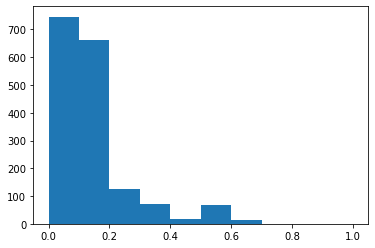

In [71]:
plt.hist(costs.flatten())

In [72]:
slabel_list = ['acceptance']
tlabel_list = ['accepted contribution']
costs, wd = maponto.wd_between_labels(slabel_list, tlabel_list, embs_model)
wd

1.0

In [73]:
costs

array([[1.]], dtype=float32)

(array([746., 663., 126.,  73.,  19.,  69.,  13.,   1.,   0.,   1.]),
 array([0.        , 0.18508396, 0.3701679 , 0.5552519 , 0.7403358 ,
        0.9254198 , 1.1105038 , 1.2955878 , 1.4806716 , 1.6657556 ,
        1.8508396 ], dtype=float32),
 <BarContainer object of 10 artists>)

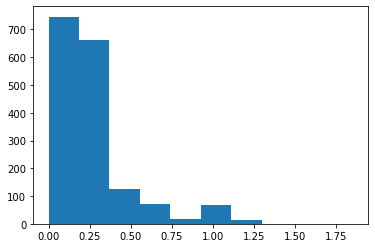

In [74]:
plt.hist(costs_raw.flatten())

In [75]:
costs_raw.shape

(29, 59)

In [82]:
costs_raw.mean()

0.27467924

In [153]:
np.percentile(costs_raw.flatten(), 10)

0.10151010751724243

In [150]:
slabel_list = ['acceptance']
tlabel_list = ['accepted contribution']
costs, wd = maponto.wd_between_labels_raw(slabel_list, tlabel_list, embs_model)
wd

0.0669039785861969

In [79]:
costs

array([[0.1558201]], dtype=float32)

# Computing WD from a Given Source to Associated Target Candidates

In [106]:
ot_align_rest.head()

,source,source_label,target,target_label
0,http://cmt#Acceptance,Acceptance,http://conference#Conference_www,Conference_www
1,http://cmt#Acceptance,Acceptance,http://conference#Contribution_1th-author,Contribution_1th-author
2,http://cmt#Acceptance,Acceptance,http://conference#Contribution_co-author,Contribution_co-author
3,http://cmt#Acceptance,Acceptance,http://conference#Early_paid_applicant,Early_paid_applicant
4,http://cmt#Acceptance,Acceptance,http://conference#Extended_abstract,Extended_abstract


In [107]:
ot_align_rest.shape

(160, 4)

In [108]:
source_rest = ot_align_rest.source.unique()
source_rest

array(['http://cmt#Acceptance', 'http://cmt#Administrator',
       'http://cmt#AssociatedChair', 'http://cmt#AuthorNotReviewer',
       'http://cmt#Bid', 'http://cmt#ConferenceChair',
       'http://cmt#ConferenceMember', 'http://cmt#Decision',
       'http://cmt#ExternalReviewer', 'http://cmt#Meta-Review',
       'http://cmt#Meta-Reviewer', 'http://cmt#PaperFullVersion',
       'http://cmt#ProgramCommitteeChair', 'http://cmt#Rejection',
       'http://cmt#SubjectArea', 'http://cmt#User'], dtype=object)

In [81]:
target_rest = ot_align_rest.target.unique()
target_rest

array(['http://conference#Conference_www',
       'http://conference#Contribution_1th-author',
       'http://conference#Contribution_co-author',
       'http://conference#Early_paid_applicant',
       'http://conference#Extended_abstract',
       'http://conference#Important_dates',
       'http://conference#Conference_contributor',
       'http://conference#Written_contribution',
       'http://conference#Submitted_contribution',
       'http://conference#Accepted_contribution',
       'http://conference#Conference_volume',
       'http://conference#Invited_speaker',
       'http://conference#Organization',
       'http://conference#Track-workshop_chair',
       'http://conference#Conference_proceedings',
       'http://conference#Information_for_participants',
       'http://conference#Publisher', 'http://conference#Regular_author',
       'http://conference#Conference_fees', 'http://conference#Chair',
       'http://conference#Conference_participant',
       'http://conference#Acti

In [84]:
target_candids = ot_align_rest[ot_align_rest.source == source_rest[0]].target
target_candids

0             http://conference#Conference_www
1    http://conference#Contribution_1th-author
2     http://conference#Contribution_co-author
3       http://conference#Early_paid_applicant
4          http://conference#Extended_abstract
5            http://conference#Important_dates
6     http://conference#Conference_contributor
7       http://conference#Written_contribution
8     http://conference#Submitted_contribution
9      http://conference#Accepted_contribution
Name: target, dtype: object

In [85]:
maponto.query_related_information(source_rest[0], source_graph)

,relation,related,what
0,rdfs:subClassOf,http://cmt#Decision,child
1,owl:disjointWith,http://cmt#Rejection,disjoint


In [86]:
maponto.query_related_information(target_candids[9], target_graph)

,relation,related,what
0,rdfs:subClassOf,http://conference#Reviewed_contribution,child
1,superClassOf,http://conference#Camera_ready_contribution,parent
2,owl:disjointWith,http://conference#Rejected_contribution,disjoint


In [87]:
target_candids

0             http://conference#Conference_www
1    http://conference#Contribution_1th-author
2     http://conference#Contribution_co-author
3       http://conference#Early_paid_applicant
4          http://conference#Extended_abstract
5            http://conference#Important_dates
6     http://conference#Conference_contributor
7       http://conference#Written_contribution
8     http://conference#Submitted_contribution
9      http://conference#Accepted_contribution
Name: target, dtype: object

In [127]:
sclndLabel = slabel_clnd_uris[slabel_clnd_uris.uri == source_rest[0]].clndLabel.tolist()[0]

In [133]:
ssyn_ls = mapneighbor.get_syn_phrases(sclndLabel)

In [131]:
tclndLabel = tlabel_clnd_uris[tlabel_clnd_uris.uri == target_candids[9]].clndLabel.tolist()[0]

In [134]:
tsyn_ls = mapneighbor.get_syn_phrases(tclndLabel)

In [135]:
costs, wd = maponto.wd_between_labels_raw(ssyn_ls, tsyn_ls, embs_model)
wd

0.20904402304440733

In [54]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [51]:
source_uri = 'http://cmt#Acceptance'
sclndLabel = slabel_clnd_uris[slabel_clnd_uris.uri == source_uri].clndLabel.tolist()[0]

s_t_wds = defaultdict(float)

target_candids = ot_align_rest[ot_align_rest.source == source_uri].target.tolist()
for target in target_candids:
    tclndLabel = tlabel_clnd_uris[tlabel_clnd_uris.uri == target].clndLabel.tolist()[0]
    
    s_t_wds[target] = otmapper.wd_between_names(sclndLabel, tclndLabel, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

[('http://conference#Accepted_contribution', 0.0669039785861969),
 ('http://conference#Submitted_contribution', 0.09254240244626999),
 ('http://conference#Written_contribution', 0.10941967368125916),
 ('http://conference#Conference_contributor', 0.12178383767604828),
 ('http://conference#Extended_abstract', 0.127512589097023),
 ('http://conference#Early_paid_applicant', 0.15728327631950378),
 ('http://conference#Important_dates', 0.19253113865852356),
 ('http://conference#Contribution_co-author', 0.34122514724731445),
 ('http://conference#Conference_www', 0.3554666340351105),
 ('http://conference#Contribution_1th-author', 0.9637170433998108)]

In [53]:
source_uri = 'http://cmt#Acceptance'
srelated = maponto.query_related_information(source_uri, source_graph)

s_t_wds = defaultdict(float)

target_candids = ot_align_rest[ot_align_rest.source == source_uri].target.tolist()
for target in target_candids:
    trelated = maponto.query_related_information(target, target_graph)
    s_t_wds[target] = otmapper.wd_between_superclasses(srelated, trelated, 
                                              slabel_clnd_uris, tlabel_clnd_uris, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

INFO:root:WD_between_superclasses=0.13227401673793793: ['decision'] and ['conference document']
INFO:root:WD_between_superclasses=0.18491524457931519: ['decision'] and ['regular author']
INFO:root:WD_between_superclasses=0.18491524457931519: ['decision'] and ['regular author']
INFO:root:WD_between_superclasses=0.23932407796382904: ['decision'] and ['paid applicant']
INFO:root:WD_between_superclasses=0.14267656207084656: ['decision'] and ['regular contribution']
INFO:root:WD_between_superclasses: ['decision'] or [] is empty
INFO:root:WD_between_superclasses=0.21767620742321014: ['decision'] and ['person']
INFO:root:WD_between_superclasses=0.11760097742080688: ['decision'] and ['conference contribution']
INFO:root:WD_between_superclasses=0.13851407170295715: ['decision'] and ['written contribution']
INFO:root:WD_between_superclasses=0.13088330626487732: ['decision'] and ['reviewed contribution']


[('http://conference#Important_dates', -1),
 ('http://conference#Written_contribution', 0.11760097742080688),
 ('http://conference#Accepted_contribution', 0.13088330626487732),
 ('http://conference#Conference_www', 0.13227401673793793),
 ('http://conference#Submitted_contribution', 0.13851407170295715),
 ('http://conference#Extended_abstract', 0.14267656207084656),
 ('http://conference#Contribution_1th-author', 0.18491524457931519),
 ('http://conference#Contribution_co-author', 0.18491524457931519),
 ('http://conference#Conference_contributor', 0.21767620742321014),
 ('http://conference#Early_paid_applicant', 0.23932407796382904)]

In [21]:
wd_between_superclasses(srelated, trelated, slabel_clnd_uris, tlabel_clnd_uris)

INFO:root:WD_between_superclasses=0.13088330626487732: ['decision'] and ['reviewed contribution']


0.13088330626487732

In [55]:
source_uri = 'http://cmt#Acceptance'
srelated = maponto.query_related_information(source_uri, source_graph)

s_t_wds = defaultdict(float)

target_candids = ot_align_rest[ot_align_rest.source == source_uri].target.tolist()
for target in target_candids:
    trelated = maponto.query_related_information(target, target_graph)
    s_t_wds[target] = otmapper.wd_between_subclasses(srelated, trelated, 
                                              slabel_clnd_uris, tlabel_clnd_uris, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_subclasses: [] or ['abstract'] is empty
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_subclasses: [] or ['regular author', 'active conference participant', 'invited speaker'] is empty
INFO:root:WD_between_subclasses: [] or ['submitted contribution', 'regular contribution'] is empty
INFO:root:WD_between_subclasses: [] or ['reviewed contribution'] is empty
INFO:root:WD_between_subclasses: [] or ['camera ready contribution'] is empty


[('http://conference#Conference_www', -1),
 ('http://conference#Contribution_1th-author', -1),
 ('http://conference#Contribution_co-author', -1),
 ('http://conference#Early_paid_applicant', -1),
 ('http://conference#Extended_abstract', -1),
 ('http://conference#Important_dates', -1),
 ('http://conference#Conference_contributor', -1),
 ('http://conference#Written_contribution', -1),
 ('http://conference#Submitted_contribution', -1),
 ('http://conference#Accepted_contribution', -1)]

In [56]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [57]:
source_uri = 'http://cmt#Acceptance'
srelated = maponto.query_related_information(source_uri, source_graph)

s_t_wds = defaultdict(float)

target_candids = ot_align_rest[ot_align_rest.source == source_uri].target.tolist()
for target in target_candids:
    trelated = maponto.query_related_information(target, target_graph)
    s_t_wds[target] = otmapper.wd_between_disjoint(srelated, trelated, 
                                              slabel_clnd_uris, tlabel_clnd_uris, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_disjoint=0.36496245861053467: ['rejection'] and ['contribution co author']
INFO:root:WD_between_disjoint=1.0060805082321167: ['rejection'] and ['contribution 1 th author']
INFO:root:WD_between_disjoint=0.22382822632789612: ['rejection'] and ['late paid applicant']
INFO:root:WD_between_disjoint=0.38172608613967896: ['rejection'] and ['paper']
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_disjoint=0.07515572756528854: ['rejection'] and ['rejected contribution']


[('http://conference#Conference_www', -1),
 ('http://conference#Important_dates', -1),
 ('http://conference#Conference_contributor', -1),
 ('http://conference#Written_contribution', -1),
 ('http://conference#Submitted_contribution', -1),
 ('http://conference#Accepted_contribution', 0.07515572756528854),
 ('http://conference#Early_paid_applicant', 0.22382822632789612),
 ('http://conference#Contribution_1th-author', 0.36496245861053467),
 ('http://conference#Extended_abstract', 0.38172608613967896),
 ('http://conference#Contribution_co-author', 1.0060805082321167)]

In [61]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [60]:
source_uri = 'http://cmt#Chairman'
srelated = maponto.query_related_information(source_uri, source_graph)
print(srelated)

s_t_wds = defaultdict(float)

target_uri = 'http://conference#Conference_contribution'
trelated = maponto.query_related_information(target_uri, target_graph)
print(trelated)

s_t_wds[target_uri] = otmapper.wd_between_equivalents(srelated, trelated, 
                                              slabel_clnd_uris, tlabel_clnd_uris, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

              relation                           related        what
0      rdfs:subClassOf                 http://cmt#Person       child
1  owl:equivalentClass        http://cmt#AssociatedChair  equivalent
2  owl:equivalentClass        http://cmt#ConferenceChair  equivalent
3  owl:equivalentClass  http://cmt#ProgramCommitteeChair  equivalent


INFO:root:WD_between_equivalent=0.18420547793308892: ['associated chair', 'conference chair', 'program committee chair'] and ['written contribution', 'presentation', 'regular contribution', 'poster', 'invited talk']


                               relation  \
0                       rdfs:subClassOf   
1                          superClassOf   
2                          superClassOf   
3                          superClassOf   
4     http://conference#is_submitted_at   
5   http://conference#has_contributions   
6                   owl:equivalentClass   
7                   owl:equivalentClass   
8                   owl:equivalentClass   
9                   owl:equivalentClass   
10                  owl:equivalentClass   

                                   related        what  
0    http://conference#Conference_document       child  
1   http://conference#Written_contribution      parent  
2                 http://conference#Poster      parent  
3           http://conference#Presentation      parent  
4      http://conference#Conference_volume      domain  
5      http://conference#Conference_volume       range  
6   http://conference#Written_contribution  equivalent  
7           http://conferen

[('http://conference#Conference_contribution', 0.18420547793308892)]

In [50]:
# test append and extend
l1 = [1, 2, 3]
l2 = [4, 5]
l1.append(l2)
print(l1)
l1.extend(l2)
print(l1)

[1, 2, 3, [4, 5]]
[1, 2, 3, [4, 5], 4, 5]


In [62]:
source_uri = 'http://cmt#Meta-Reviewer'
srelated = maponto.query_related_information(source_uri, source_graph)
print(srelated)

s_t_wds = defaultdict(float)

target_uri = 'http://cmt#ProgramCommitteeMember'
trelated = maponto.query_related_information(target_uri, source_graph)
print(trelated)

s_t_wds[target_uri] = otmapper.wd_between_comments(srelated, trelated, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

                         relation  \
0                 rdfs:subClassOf   
1  http://cmt#readByMeta-Reviewer   
3                    rdfs:comment   

                                             related     what  
0                                http://cmt#Reviewer    child  
1                                   http://cmt#Paper    range  
3  A special type of Reviewer.  There can be any ...  comment  


INFO:root:WD_between_comments=0.33798213710642266: ['special', 'type', 'reviewer', 'number', 'reviewers', 'given', 'paper', 'one', 'meta', 'reviewer', 'meta', 'reviewer', 'go', 'reviews', 'submitted', 'paper', 'submit', 'review', 'questions', 'meta', 'reviewer', 'different', 'normal', 'reviewer', 'role', 'ensure', 'reviews', 'good', 'consistent', 'decision', 'use', 'meta', 'reviewers', 'optional', 'must', 'set', 'paper', 'assignment', 'occurs'] and ['program', 'committee', 'consists', 'members', 'conference', 'except', 'authors', 'also', 'reviewers']


                                relation  \
0                        rdfs:subClassOf   
1                        rdfs:subClassOf   
2                           superClassOf   
3    http://cmt#memberOfProgramCommittee   
4                     http://cmt#addedBy   
5                   http://cmt#maxPapers   
6   http://cmt#hasProgramCommitteeMember   
7                http://cmt#setMaxPapers   
8   http://cmt#addProgramCommitteeMember   
9                           rdfs:comment   
10                      owl:disjointWith   

                                              related             what  
0                                   http://cmt#Person            child  
1                         http://cmt#ConferenceMember            child  
2                    http://cmt#ProgramCommitteeChair           parent  
3                         http://cmt#ProgramCommittee           domain  
4                            http://cmt#Administrator           domain  
5                http://www.w3.or

[('http://cmt#ProgramCommitteeMember', 0.33798213710642266)]

In [68]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [64]:
source_uri = 'http://cmt#Person'
srelated = maponto.query_related_information(source_uri, source_graph)
print(srelated)

s_t_wds = defaultdict(float)

target_uri = 'http://conference#Person'
trelated = maponto.query_related_information(target_uri, target_graph)
print(trelated)

s_t_wds[target_uri] = otmapper.wd_between_datatypes(srelated, trelated, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

                            relation                                  related  \
0                       superClassOf        http://cmt#ProgramCommitteeMember   
1                       superClassOf              http://cmt#ConferenceMember   
2                       superClassOf              http://cmt#ExternalReviewer   
3                       superClassOf                      http://cmt#Chairman   
4                       superClassOf                          http://cmt#User   
5   http://cmt#hasConflictOfInterest                      http://cmt#Document   
6                   http://cmt#email  http://www.w3.org/2001/XMLSchema#string   
7                    http://cmt#name  http://www.w3.org/2001/XMLSchema#string   
8                   owl:disjointWith                    http://cmt#Preference   
9                   owl:disjointWith              http://cmt#ProgramCommittee   
10                  owl:disjointWith                           http://cmt#Bid   
11                  owl:disj

INFO:root:WD_between_datatypes=0.12166944642861682: ['email', 'name'] and ['email', 'first name', 'last name']


                                relation  \
0                           superClassOf   
1                           superClassOf   
2                           superClassOf   
3                           superClassOf   
4                           superClassOf   
5                           superClassOf   
6          http://conference#contributes   
7         http://conference#has_an_email   
8   http://conference#has_the_first_name   
9    http://conference#has_the_last_name   
10         http://conference#has_authors   
11         http://conference#has_authors   

                                     related             what  
0   http://conference#Conference_participant           parent  
1     http://conference#Conference_applicant           parent  
2         http://conference#Committee_member           parent  
3   http://conference#Conference_contributor           parent  
4                 http://conference#Reviewer           parent  
5     http://conference#Track-workshop_chai

[('http://conference#Person', 0.12166944642861682)]

In [65]:
source_uri = 'http://cmt#Paper'
srelated = maponto.query_related_information(source_uri, source_graph)
#print(srelated)
otmapper.get_objectproperty_labels(srelated)

['decision',
 'read reviewer',
 'read meta reviewer',
 'co author',
 'bid',
 'assigned reviewer',
 'subject area',
 'author',
 'accepted administrator',
 'rejected administrator',
 'co write paper co author',
 'reject paper administrator',
 'read paper reviewer',
 'assigned reviewer',
 'submit paper author',
 'accept paper administrator',
 'write paper author']

In [66]:
source_uri = 'http://cmt#Person'
srelated = maponto.query_related_information(source_uri, source_graph)
print(srelated)

s_t_wds = defaultdict(float)

target_uri = 'http://conference#Person'
trelated = maponto.query_related_information(target_uri, target_graph)
print(trelated)

s_t_wds[target_uri] = otmapper.wd_between_objectproperties(srelated, trelated, embs_model)
sorted(s_t_wds.items(), key=lambda kv: kv[1])

                            relation                                  related  \
0                       superClassOf        http://cmt#ProgramCommitteeMember   
1                       superClassOf              http://cmt#ConferenceMember   
2                       superClassOf              http://cmt#ExternalReviewer   
3                       superClassOf                      http://cmt#Chairman   
4                       superClassOf                          http://cmt#User   
5   http://cmt#hasConflictOfInterest                      http://cmt#Document   
6                   http://cmt#email  http://www.w3.org/2001/XMLSchema#string   
7                    http://cmt#name  http://www.w3.org/2001/XMLSchema#string   
8                   owl:disjointWith                    http://cmt#Preference   
9                   owl:disjointWith              http://cmt#ProgramCommittee   
10                  owl:disjointWith                           http://cmt#Bid   
11                  owl:disj

INFO:root:WD_between_objectproperties=0.09333815425634384: ['conflict interest document'] and ['contributes conference document', 'authors review']


                                relation  \
0                           superClassOf   
1                           superClassOf   
2                           superClassOf   
3                           superClassOf   
4                           superClassOf   
5                           superClassOf   
6          http://conference#contributes   
7         http://conference#has_an_email   
8   http://conference#has_the_first_name   
9    http://conference#has_the_last_name   
10         http://conference#has_authors   
11         http://conference#has_authors   

                                     related             what  
0   http://conference#Conference_participant           parent  
1     http://conference#Conference_applicant           parent  
2         http://conference#Committee_member           parent  
3   http://conference#Conference_contributor           parent  
4                 http://conference#Reviewer           parent  
5     http://conference#Track-workshop_chai

[('http://conference#Person', 0.09333815425634384)]

In [69]:
otmapper.compute_wds_uri_targets(slabel_clnd_uris, source_graph, tlabel_clnd_uris, target_graph, 
                        ot_align_rest, 'http://cmt#Acceptance', embs_model)

INFO:root:============http://cmt#Acceptance==========
INFO:root:WD_between_superclasses=0.13227401673793793: ['decision'] and ['conference document']
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_equivalent: [] or [] is empty
INFO:root:WD_between_comments: [] or [] is empty
INFO:root:WD_between_datatypes: [] or ['url'] is empty
INFO:root:WD_between_objectproperties: [] or [] is empty
INFO:root:compute_wds_uri_targets(): average wd: 0.2438703253865242
INFO:root:============http://cmt#Acceptance==========
INFO:root:WD_between_superclasses=0.18491524457931519: ['decision'] and ['regular author']
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_disjoint=0.36496245861053467: ['rejection'] and ['contribution co author']
INFO:root:WD_between_equivalent: [] or [] is empty
INFO:root:WD_between_comments: [] or [] is empty
INFO:root:WD_between_datatypes: [] or [] is empty
INFO:root:WD_betw

('http://cmt#Acceptance',
 [('http://conference#Accepted_contribution', 0.09098100413878758),
  ('http://conference#Written_contribution', 0.11351032555103302),
  ('http://conference#Submitted_contribution', 0.11552823707461357),
  ('http://conference#Conference_contributor', 0.1697300225496292),
  ('http://conference#Important_dates', 0.19253113865852356),
  ('http://conference#Early_paid_applicant', 0.20681186020374298),
  ('http://conference#Extended_abstract', 0.21730507910251617),
  ('http://conference#Conference_www', 0.2438703253865242),
  ('http://conference#Contribution_1th-author', 0.5045315821965536),
  ('http://conference#Contribution_co-author', 0.5107403000195821)])

# Computing WD between Each Pair of Source and Target Candidates

In [113]:
ot_align_rest.head()

,source,source_label,target,target_label
0,http://cmt#Acceptance,Acceptance,http://conference#Conference_www,Conference_www
1,http://cmt#Acceptance,Acceptance,http://conference#Contribution_1th-author,Contribution_1th-author
2,http://cmt#Acceptance,Acceptance,http://conference#Contribution_co-author,Contribution_co-author
3,http://cmt#Acceptance,Acceptance,http://conference#Early_paid_applicant,Early_paid_applicant
4,http://cmt#Acceptance,Acceptance,http://conference#Extended_abstract,Extended_abstract


In [114]:
ot_align_rest.shape

(160, 4)

In [115]:
source_rest = ot_align_rest.source.unique()
source_rest

array(['http://cmt#Acceptance', 'http://cmt#Administrator',
       'http://cmt#AssociatedChair', 'http://cmt#AuthorNotReviewer',
       'http://cmt#Bid', 'http://cmt#ConferenceChair',
       'http://cmt#ConferenceMember', 'http://cmt#Decision',
       'http://cmt#ExternalReviewer', 'http://cmt#Meta-Review',
       'http://cmt#Meta-Reviewer', 'http://cmt#PaperFullVersion',
       'http://cmt#ProgramCommitteeChair', 'http://cmt#Rejection',
       'http://cmt#SubjectArea', 'http://cmt#User'], dtype=object)

In [116]:
target_candids = ot_align_rest[ot_align_rest.source == source_rest[0]].target
target_candids

0             http://conference#Conference_www
1    http://conference#Contribution_1th-author
2     http://conference#Contribution_co-author
3       http://conference#Early_paid_applicant
4          http://conference#Extended_abstract
5            http://conference#Important_dates
6     http://conference#Conference_contributor
7       http://conference#Written_contribution
8     http://conference#Submitted_contribution
9      http://conference#Accepted_contribution
Name: target, dtype: object

In [74]:
importlib.reload(maponto)
importlib.reload(otmapper)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [71]:
otmapper.generate_mapping_threshold(slabel_clnd_uris, tlabel_clnd_uris, 5, embs_model)

0.08389917761087418

In [158]:
slabel_clnd_uris[slabel_clnd_uris.uri == 'http://cmt#Person'].label.values[0]

'Person'

In [75]:
%%time
from_candidates_5percent = otmapper.generate_mappings_from_candidates(slabel_clnd_uris, source_graph, tlabel_clnd_uris, 
                                      target_graph, ot_align_rest, 5, embs_model)

INFO:root:============http://cmt#Acceptance==========
INFO:root:WD_between_superclasses=0.13227401673793793: ['decision'] and ['conference document']
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_equivalent: [] or [] is empty
INFO:root:WD_between_comments: [] or [] is empty
INFO:root:WD_between_datatypes: [] or ['url'] is empty
INFO:root:WD_between_objectproperties: [] or [] is empty
INFO:root:compute_wds_uri_targets(): average wd: 0.2438703253865242
INFO:root:============http://cmt#Acceptance==========
INFO:root:WD_between_superclasses=0.18491524457931519: ['decision'] and ['regular author']
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_disjoint=0.36496245861053467: ['rejection'] and ['contribution co author']
INFO:root:WD_between_equivalent: [] or [] is empty
INFO:root:WD_between_comments: [] or [] is empty
INFO:root:WD_between_datatypes: [] or [] is empty
INFO:root:WD_betw

CPU times: user 1min 58s, sys: 1.42 s, total: 1min 59s
Wall time: 1min 37s


In [76]:
%%time
from_candidates_10percent = otmapper.generate_mappings_from_candidates(slabel_clnd_uris, source_graph, tlabel_clnd_uris, 
                                      target_graph, ot_align_rest, 10, embs_model)

INFO:root:============http://cmt#Acceptance==========
INFO:root:WD_between_superclasses=0.13227401673793793: ['decision'] and ['conference document']
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_disjoint: ['rejection'] or [] is empty
INFO:root:WD_between_equivalent: [] or [] is empty
INFO:root:WD_between_comments: [] or [] is empty
INFO:root:WD_between_datatypes: [] or ['url'] is empty
INFO:root:WD_between_objectproperties: [] or [] is empty
INFO:root:compute_wds_uri_targets(): average wd: 0.2438703253865242
INFO:root:============http://cmt#Acceptance==========
INFO:root:WD_between_superclasses=0.18491524457931519: ['decision'] and ['regular author']
INFO:root:WD_between_subclasses: [] or [] is empty
INFO:root:WD_between_disjoint=0.36496245861053467: ['rejection'] and ['contribution co author']
INFO:root:WD_between_equivalent: [] or [] is empty
INFO:root:WD_between_comments: [] or [] is empty
INFO:root:WD_between_datatypes: [] or [] is empty
INFO:root:WD_betw

CPU times: user 2min, sys: 1.5 s, total: 2min 2s
Wall time: 1min 39s


In [41]:
from_candidates_10percent

,source,source_label,target,target_label
0,http://cmt#Acceptance,Acceptance,http://conference#Accepted_contribution,Accepted_contribution
1,http://cmt#Administrator,Administrator,http://conference#Organization,Organization
2,http://cmt#AssociatedChair,AssociatedChair,http://conference#Written_contribution,Written_contribution
3,http://cmt#AuthorNotReviewer,AuthorNotReviewer,http://conference#Publisher,Publisher
4,http://cmt#ConferenceChair,ConferenceChair,http://conference#Chair,Chair
5,http://cmt#ConferenceMember,ConferenceMember,http://conference#Conference_contributor,Conference_contributor
6,http://cmt#ProgramCommitteeChair,ProgramCommitteeChair,http://conference#Written_contribution,Written_contribution
7,http://cmt#Rejection,Rejection,http://conference#Rejected_contribution,Rejected_contribution


# Computing Non-Uniform Distributions for Optimal Transport

In [62]:
# computing a non-uniform distribution for a set of points based on 
# the given shortest distances to another set of points
def non_uniform_dist(costs, mu):
    '''
        input:  costs: a nxm matrix (narray) of distances from a set of n points to a set of 
                     m points
                mu: a smoothing value for eliminating zero distances
        output: a probability distribution for the n points 
    '''
    ds = costs.min(axis=1)
    ds_mu_inv = 1 / (ds + mu)
    p = ds_mu_inv / ds_mu_inv.sum()
    
    return p

In [75]:
non_uniform_dist(costs_raw, 0.001)

array([0.00231711, 0.00241503, 0.00247603, 0.00193484, 0.00372992,
       0.00016881, 0.00141767, 0.00228777, 0.15733197, 0.0028891 ,
       0.00506387, 0.00141446, 0.00421695, 0.00243745, 0.00101241,
       0.00097564, 0.15731321, 0.00210829, 0.00137659, 0.15733665,
       0.0023978 , 0.15734135, 0.00380235, 0.0080735 , 0.00206605,
       0.15733197, 0.15734135, 0.0010368 , 0.00038517], dtype=float32)

In [79]:
non_uniform_dist(costs_raw.T, 0.001)

array([0.00198334, 0.0021798 , 0.00285958, 0.00129305, 0.001157  ,
       0.00127772, 0.00148714, 0.00114905, 0.00370184, 0.00759505,
       0.14800811, 0.00555014, 0.0029339 , 0.00493661, 0.00416569,
       0.00396704, 0.00070824, 0.00173801, 0.0050106 , 0.00542785,
       0.00203145, 0.00057609, 0.00016859, 0.00215219, 0.00111826,
       0.00146326, 0.00094227, 0.00192346, 0.00142679, 0.00069605,
       0.00088151, 0.00235917, 0.00122287, 0.00332918, 0.00083969,
       0.14799047, 0.00219841, 0.14801252, 0.00061245, 0.00202627,
       0.14801693, 0.00150298, 0.00177212, 0.00220361, 0.0016635 ,
       0.00194361, 0.14800811, 0.00204427, 0.0022557 , 0.00158809,
       0.14801693, 0.00249975, 0.00171406, 0.00058755, 0.00054443,
       0.00287878, 0.00075575, 0.00135404, 0.00154898], dtype=float32)

## Test on Conference

In [ ]:
source_url = "../data/conference/conference-v1/cmt-conference/source.rdf"
target_url = "../data/conference/conference-v1/cmt-conference/target.rdf"
output_url = '../data/results/cmt_conference_alignments.rdf'
refs_url = "../data/conference/conference-v1/cmt-conference/reference.rdf"

In [25]:
preds_align = maponto.match_label_embeddings_OT_raw_nonUniform(slabel_clnd_uris, tlabel_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 10, 0.001, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (29, 59)
INFO:root:Computing Optimal Transport Plan Non-uniform Distribution...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [22]:
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer


In [26]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 9
Total number of predicted is 290
Precision is 0.03103448275862069
Recall is 0.6
F1-Measure is 0.05901639344262296


In [23]:
preds_align = maponto.match_label_embeddings_OT(slabel_clnd_uris, tlabel_clnd_uris, embs_model, \
                        maponto.make_mappings_nn, None, None)
maponto.evaluate(preds_align, refs_url)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (29, 59)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...


Total number of references is 15
Total correctly predicted alignments is 8
Total number of predicted is 23
Precision is 0.34782608695652173
Recall is 0.5333333333333333
F1-Measure is 0.42105263157894735


In [ ]:
preds_align

,source,source_label,target,target_label
0,http://cmt#Acceptance,Acceptance,http://conference#Accepted_contribution,Accepted_contribution
1,http://cmt#Administrator,Administrator,http://conference#Organization,Organization
2,http://cmt#Author,Author,http://conference#Regular_author,Regular_author
3,http://cmt#Bid,Bid,http://conference#Invited_talk,Invited_talk
4,http://cmt#Chairman,Chairman,http://conference#Organizer,Organizer
5,http://cmt#Co-author,Co-author,http://conference#Co-chair,Co-chair
6,http://cmt#Conference,Conference,http://conference#Conference,Conference
7,http://cmt#ConferenceMember,ConferenceMember,http://conference#Conference_participant,Conference_participant
8,http://cmt#Document,Document,http://conference#Conference_document,Conference_document
9,http://cmt#ExternalReviewer,ExternalReviewer,http://conference#Passive_conference_participant,Passive_conference_participant
